<a href="https://colab.research.google.com/github/octavianosilva/data_science/blob/main/Lidando_com_a_Alta_Dimensionalidade_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa de Capacitação Data Marketplace 2022: Lidando com a Alta Dimensionalidade de Dados

<center><img alt='Logo Data'  src='https://datamarketplace.com.br/wp-content/uploads/2020/04/logo-data-marketplace-500x85-1.png'></center>


Como uma das tarefas propostas dentro do Programa de Capacitação 2022 da empresa Data Marketplace, aplicaremos um algoritmo de Machine Learning voltado para formação de agrupamentos em um dataset selecionado que contém desafios referentes à alta dimensionalidade de dados.

A alta dimensionalidade dos dados é um ponto bastante importante de nos atentarmos quando estamos desenvolvendo um projeto de Machine Learning, pois modelos matemáticos sofrem bastante influência dos aumentos ou reduções das dimensões dos dados, impactando diretamente no seu desempenho.

Essa alta dimensionalidade de dados, se não tratada, pode nos levar a um problema mais sério e obscuro, conhecido como a **Maldição da Dimensionalidade**. Apesar de ser um nome bem chamativo, essa "*maldição*" foi um termo introduzido por Bellman, referindo-se ao problema causado pelo aumento exponencial no volume de dados com a adição de novas dimensões no espaço matemático.

<center><img alt='Exeplo da Dimensionalidade'  src='https://aiaspirant.com/wp-content/uploads/2019/09/curse-of-dimensionality.png'></center>

Fonte da Imagem: https://aiaspirant.com/curse-of-dimensionality/ .

Na prática, quer dizer que: para um determinado número de amostras em um banco de dados, existe um número máximo de características que o modelo consegue lidar, assim degradando seu desempenho a cada nova característica introduzida. Esse problema é bastante interessante de se atentar, pois sempre temos em mente que quanto mais informações nossos modelos tiverem, melhores serão seus desempenhos, o que é totalmente contrariado por esse fenômeno da dimensionalidade.

Como foi dito, o objetivo deste projeto é realizar agrupamentos de dados no banco de dados selecionado e apresentar testes e seus respectivos resultados para cada tratamento para reduzir alta dimensionalidade dos dados.

## Importando os Dados e as Bibliotecas

O banco de dados selecionado para este projeto se refere às partidas de jogos de Futebol Europeu realizados nas temporadas entre 2008 e 2016, que pode ser encontrado publicamente no Kaggle neste [link](https://www.kaggle.com/hugomathien/soccer). 

In [ ]:
# Pacote que contém um grupo de bibliotecas - execute "lazy_imports()" para saber quais.
!pip install pyforest -q
import pyforest

# Importando o método SimpleImputer para preencher valores ausentes
from sklearn.impute import SimpleImputer

# Importando o datetime para converter entradas de datas do tipo textual
from datetime import datetime 

# Importando o modelo de agrupamento K-Means
from sklearn.cluster import KMeans

# Importando a visualização da Análise de Silhueta
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

# Importando as bibliotecas para validação e treinamento do modelo
!pip install scikit-plot -q
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, f1_score, precision_score, confusion_matrix, classification_report, multilabel_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Importando a solução para classificação de múltiplas variáveis alvos
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier

# Importando a técnica PCA
from sklearn.decomposition import PCA

# Ignorar os alertas de atualizações
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Replicabilidade
np.random.seed(54)

# Executando o TQDM para termos visualizações de progressos de execução em barras das células
from tqdm.notebook import tqdm as tqdm
tqdm.pandas()

# Importando o dataset do Kaggle (importação segmentada, pois o dataset está no formato sqlite)
df_country = pd.read_csv('country.csv')
df_league = pd.read_csv('league.csv')
df_match = pd.read_csv('match.csv')
df_player = pd.read_csv('player.csv')
df_player_attributes = pd.read_csv('player_attributes.csv')
df_team = pd.read_csv('team.csv')
df_team_attributes = pd.read_csv('team_attributes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Análise Exploratória

Antes de iniciarmos qualquer desenvolvimento de código para um projeto de dados, é necessário explorar a base importada, para termos uma ideia de como está a qualidade desses dados.

Vamos começar observado o tamanho dos dataset importados:

### Obtendo o tamanho dos datasets importados

In [ ]:
## Obtendo o tamanho de cada dataset importado ##

# Exibindo o tamanho do dataset 'country'
print('O dataset "country" carregado possui {} entradas e {} colunas.'.format(df_country.shape[0], df_country.shape[1]))

# Exibindo o tamanho do dataset 'league'
print('O dataset "league" carregado possui {} entradas e {} colunas.'.format(df_league.shape[0], df_league.shape[1]))

# Exibindo o tamanho do dataset 'match'
print('O dataset "match" carregado possui {} entradas e {} colunas.'.format(df_match.shape[0], df_match.shape[1]))

# Exibindo o tamanho do dataset 'player'
print('O dataset "player" carregado possui {} entradas e {} colunas.'.format(df_player.shape[0], df_player.shape[1]))

# Exibindo o tamanho do dataset 'player_attributes'
print('O dataset "player_attributes" carregado possui {} entradas e {} colunas.'.format(df_player_attributes.shape[0], df_player_attributes.shape[1]))

# Exibindo o tamanho do dataset 'team'
print('O dataset "team" carregado possui {} entradas e {} colunas.'.format(df_team.shape[0], df_team.shape[1]))

# Exibindo o tamanho do dataset 'team_attributes'
print('O dataset "team_attributes" carregado possui {} entradas e {} colunas.'.format(df_team_attributes.shape[0], df_team_attributes.shape[1]))

O dataset "country" carregado possui 11 entradas e 2 colunas.
O dataset "league" carregado possui 11 entradas e 3 colunas.
O dataset "match" carregado possui 25979 entradas e 115 colunas.
O dataset "player" carregado possui 11060 entradas e 7 colunas.
O dataset "player_attributes" carregado possui 183978 entradas e 42 colunas.
O dataset "team" carregado possui 599 entradas e 5 colunas.
O dataset "team_attributes" carregado possui 1458 entradas e 25 colunas.


Agora vamos observar as cinco primeiras entradas de cada um desses datasets.

### Observando as primeiras entradas dos datasets

In [ ]:
# Exibindo as cinco primeiras entradas do dataset 'country'
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [ ]:
# Exibindo as cinco primeiras entradas do dataset 'league'
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [ ]:
# Exibindo as cinco primeiras entradas do dataset 'match'
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [ ]:
# Exibindo as cinco primeiras entradas do dataset 'player'
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [ ]:
# Exibindo as cinco primeiras entradas do dataset 'player_attributes'
df_player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
# Exibindo as cinco primeiras entradas do dataset 'team'
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673,KRC Genk,GEN
1,2,9993,675,Beerschot AC,BAC
2,3,10000,15005,SV Zulte-Waregem,ZUL
3,4,9994,2007,Sporting Lokeren,LOK
4,5,9984,1750,KSV Cercle Brugge,CEB


In [ ]:
# Exibindo as cinco primeiras entradas do dataset 'team_attributes'
df_team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


Agora que vimos as primeiras entradas dos Dataframes de cada dataset importado, vamos registrar um dicionário das variáveis de cada Dataframe, assim facilitando o entendimento de cada uma delas.

### Dicionário das variáveis de cada dataset

1. DataFrame *Country*: contém os países dos times europeus.
* `id`: ID do time;

* `name`: Nome do País.

2. DataFrame *League*: contém as ligas dos times europeus.
* `id`: ID do time;

* `country_id`: ID do País;

* `name`: Nome da Liga.

3. DataFrame *Match*: contém os dados das partidas jogadas.
* `id`: ID da partida; 

* `country_id`: ID do país;

* `league_id`: ID da liga;

* `season`: Temporada;

* `stage`: Estágio;

* `date`: Data;

* `match_api_id`: ID da partida na base original;

* `home_team_api_id`: ID do time jogando em casa na base original;

* `away_team_api_id`: ID do time jogando fora de casa na base original;

* `home_team_goal`: Gol do time jogando em casa;

* `away_team_goal`: Gol do time jogando fora de casa;

* `home_player_XN`: Posição no eixo X do jogador N do time jogando na casa;

* `away_player_XN`: Posição no eixo X do jogador N do time jogando fora de  casa;

* `home_player_YN`: Posição no eixo Y do jogador N do time jogando na casa;

* `away_player_YN`: Posição no eixo Y do jogador N do time jogando fora de  casa;

* `home_player_N`: ID do jogador N do time jogando em casa;

* `away_player_N`: ID do jogador N do time jogando fora de casa;

* `goal`: Informações sobre o gol na partida;

* `shoton`: Informações sobre o chute dentro da área do gol na partida;

* `shotoff`: Informações sobre o chute para fora da área do gol na partida;

* `foulcommit`: Informações sobre as faltas cometidas na partida;

* `card`: Informações sobre os cartões de faltas levantados na partida;

* `cross`: Informações sobre os cruzamentos na partida;

* `corner`: Informações sobre os chutes em escantêio na partida;

* `possession`: Informações sobre as posses de bolas na partida;

* `B365H`: Probabilidade de vitória em casa obtido pelo Bet365;

* `B365D`: Probabilidade de empate obtido pelo Bet365;

* `B365A`: Probabilidade de vitória do time jogando fora de casa, obtido pelo Bet365;

* `BWH`: Probabilidade de vitória em casa obtido pelo Bet&Win;

* `BWD`: Probabilidade de empate obtido pelo Bet&Win;

* `BWA`: Probabilidade de vitória do time jogando fora de casa, obtido pelo Bet&Win;

* `IWH`: Probabilidade de vitória em casa obtido pelo Interwetten;

* `IWD`: Probabilidade de empate obtido pelo Interwetten;

* `IWA`: Probabilidade de vitória do time jogando fora de casa, obtido pelo Interwetten;

* `LBH`: Probabilidade de vitória em casa obtido pelo Ladbrokes;

* `LBD`: Probabilidade de empate obtido pelo Ladbrokes;

* `LBA`: Probabilidade de vitória do time jogando fora de casa, obtido pelo Ladbrokes;

* `PSH`: Probabilidade de vitória em casa obtido pelo Pinnacle;

* `PSD`: Probabilidade de empate obtido pelo Pinnacle;

* `PSA`: Probabilidade de vitória do time jogando fora de casa, obtido pelo Pinnacle;

* `WHH`: Probabilidade de vitória em casa obtido pelo William Hill;

* `WHD`: Probabilidade de empate obtido pelo William Hill;

* `WHA`: Probabilidade de vitória do time jogando fora de casa, obtido pelo William Hill;

* `SJH`: Probabilidade de vitória em casa obtido pelo Stan James;

* `SJD`: Probabilidade de empate obtido pelo Stan James;

* `SJA`: Probabilidade de vitória do time jogando fora de casa, obtido pelo Stan James;

* `VCH`: Probabilidade de vitória em casa obtido pelo VC Bet;

* `VCD`: Probabilidade de empate obtido pelo VC Bet;

* `VCA`: Probabilidade de vitória do time jogando fora de casa, obtido pelo VC Bet;

* `GBH`: Probabilidade de vitória em casa obtido pelo Gamebookers;

* `GBD`: Probabilidade de empate obtido pelo Gamebookers;

* `GBA`: Probabilidade de vitória do time jogando fora de casa, obtido pelo Gamebookers;

* `BSH`: Probabilidade de vitória em casa obtido pelo Blue Square;

* `BSD`: Probabilidade de empate obtido pelo Blue Square;

* `BSA`: Probabilidade de vitória do time jogando fora de casa, obtido pelo Blue Square;

4. DataFrame *Player*: contém as informações dos jogadores.
* `id`: ID do jogador;

* `player_api_id`: ID do jogador na base original;

* `player_name`: Nome do jogador;

* `player_fifa_api_id`: ID do jogador no FIFA;

* `birthday`: Data de nascimento do jogador;

* `height`: Altura do jogador em centímetros;

* `weight`: Peso do jogador em libras.

5. DataFrame *Player Attributes*: contém os atributos dos jogadores com base no jogo de video game FIFA.
* `id`: ID do jogador;

* `player_fifa_api_id`: ID do jogador no FIFA;

* `player_api_id`: ID do jogador na base original;

* `date`: Data;

* `overall_rating`: Avaliação geral do jogador;

* `potential`: Potencial do jogador;

* `preferred_foot`: Perna preferida pelo jogador;

* `attacking_work_rate`: Taxa de ataque do jogador;

* `defensive_work_rate`: Taxa de defesa do jogador;

* `crossing`: Pontuação de cruzamento do jogador;

* `finishing`: Pontuação de finalização do jogador;

* `heading_accuracy`: Precisão de cabeceamento de bola do jogador;

* `short_passing`: Pontuação passe curto do jogador;

* `volleys`: Pontuação de voleios ao gol do jogador;

* `dribbling`: Pontuação de drible do jogador;

* `curve`: Pontuação de curvatura do jogador;

* `free_kick_accuracy`: Precisão de chute livre do jogador;

* `long_passing`: Pontuação de passe longo do jogador;

* `ball_control`: Pontuação do controle de bola do jogador;

* `acceleration`: Pontuação de aceleração do jogador;

* `sprint_speed`: Pontuação da velocidade de corrida do jogador;

* `agility`: Pontuação de agilidade do jogador;

* `reactions`: Pontuação da reação do jogador;

* `balance`: Pontuação de balanço do jogador;

* `shot_power`: Pontuação da força de chute do jogador;

* `jumping`: Pontuação da força de pulo do jogador;

* `stamina`: Pontuação de estamina do jogador;

* `strength`: Pontuação de força do jogador;

* `long_shots`: Pontuação de chutes em profundidade do jogador;

* `aggression`: Pontuação de agressividade do jogador;

* `interceptions`: Pontuação de interceptações de bola do jogador;

* `positioning`: Pontuação de posicionamento do jogador;

* `vision`: Pontuação de visão de jogo do jogador;

* `penalties`: Pontuação de bater pênalti pelo jogador;

* `marking`: Pontuação de marcação do jogador;

* `standing_tackle`: Pontuação de roubo de bola do jogador em pé;

* `sliding_tackle`: Pontuação de roubo de bola do jogador escorregando;

* `gk_diving`:

* `gk_handling`:

* `gk_kicking`:

* `gk_positioning`:

* `gk_reflexes`:

6. DataFrame *Team*: contém os dados dos times.
				
* `id`: ID do time;

* `team_api_id`: ID do time na base original;

* `team_fifa_api_id`: ID do time no FIFA;

* `team_long_name`: Nome do time;

* `team_short_name`: Nome resumido do time;

7. DataFrame *Team Attributes*: contém os atributos dos times com base no jogo de video game FIFA.																				
* `id`: ID do time;

* `team_fifa_api_id`: ID do time no FIFA;

* `team_api_id`: ID do time na base original;

* `date`: Data;

* `buildUpPlaySpeed`: Pontuação de velocidade do time;

* `buildUpPlaySpeedClass`: Classe do time no quesito velocidade;

* `buildUpPlayDribbling`: Pontuação de drible do time;

* `buildUpPlayDribblingClass`: Classe do time no quesito drible;

* `buildUpPlayPassing`: Pontuação de passe de bola do time;

* `buildUpPlayPassingClass`: Classe do time no quesito passe de bola;

* `buildUpPlayPositioningClass`: Classe do time no quesito posicionamento dos jogadores;

* `chanceCreationPassing`: Chance de criação de passe de bola;

* `chanceCreationPassingClass`: Classe do time no quesito chance de criação de passe de bola;

* `chanceCreationCrossing`: Chance de criação de cruzamentos de bola;

* `chanceCreationCrossingClass`: Classe do time no quesito chance de criação de cruzamentos de bola;

* `chanceCreationShooting`: Chance de criação de chutes ao gol;

* `chanceCreationShootingClass`: Classe do time no quesito chance de criação de chutes ao gol;

* `chanceCreationPositioningClass`: Chance de criação de posicionamentos;

* `defencePressure`: Pontuação de defesa contra pressão adversária;

* `defencePressureClass`: Classe do time no quesito defesa contra pressão adversária;

* `defenceAggression`: Pontuação de defesa contra agressividade adversária;

* `defenceAggressionClass`: Classe do time no quesito defesa contra agressividade adversária;

* `defenceTeamWidth`: Largura da defesa do time;

* `defenceTeamWidthClass`: Classe do time no quesito largura da defesa;

* `defenceDefenderLineClass`: Classe do time no quesito linha de defesa;


Vamos dar seguimento nas análises agora que temos uma descrição das variáveis de cada DataFrame, agora visualizando o tipo dessas variáveis.

### Observando o tipo de cada variável nos datasets

Para termos uma melhor visualização das análises que estamos fazendo, vamos criar um DataFrame para elas e no fim uní-las em um único DataFrame, dessa forma facilitando a observação delas quando necessário:

In [ ]:
## Observando o tipo das variáveis do dataset 'country' ##

# Obtendo o nome das variáveis do DataFrame
list_columns_country = df_country.columns

# Criando um DataFrame para receber os tipos
df_country_types = pd.DataFrame(index= list_columns_country, columns=['Tipo'])

# Obtendo os tipos de cada variável
for i in list_columns_country:
    
    # Alocando os tipos em uma variável
    var_type_country = df_country[i].dtypes
    df_country_types['Tipo'].loc[df_country_types.index == i] = var_type_country

# Checando o DataFrame criado
df_country_types

<IPython.core.display.Javascript object>

,Tipo
id,int64
name,object


In [ ]:
## Observando o tipo das variáveis do dataset 'league' ##

# Obtendo o nome das variáveis do DataFrame
list_columns_league = df_league.columns

# Criando um DataFrame para receber os tipos
df_league_types = pd.DataFrame(index= list_columns_league, columns=['Tipo'])

# Obtendo os tipos de cada variável
for i in list_columns_league:
    
    # Alocando os tipos em uma variável
    var_type_league = df_league[i].dtypes
    df_league_types['Tipo'].loc[df_league_types.index == i] = var_type_league

# Checando o DataFrame criado
df_league_types

<IPython.core.display.Javascript object>

,Tipo
id,int64
country_id,int64
name,object


In [ ]:
## Observando o tipo das variáveis do dataset 'match' ##

# Obtendo o nome das variáveis do DataFrame
list_columns_match = df_match.columns

# Criando um DataFrame para receber os tipos
df_match_types = pd.DataFrame(index= list_columns_match, columns=['Tipo'])

# Obtendo os tipos de cada variável
for i in list_columns_match:
    
    # Alocando os tipos em uma variável
    var_type_match = df_match[i].dtypes
    df_match_types['Tipo'].loc[df_match_types.index == i] = var_type_match

# Checando o DataFrame criado
df_match_types

<IPython.core.display.Javascript object>

,Tipo
id,int64
country_id,int64
league_id,int64
season,object
stage,int64
...,...
GBD,float64
GBA,float64
BSH,float64
BSD,float64


In [ ]:
## Observando o tipo das variáveis do dataset 'player' ##

# Obtendo o nome das variáveis do DataFrame
list_columns_player = df_player.columns

# Criando um DataFrame para receber os tipos
df_player_types = pd.DataFrame(index= list_columns_player, columns=['Tipo'])

# Obtendo os tipos de cada variável
for i in list_columns_player:
    
    # Alocando os tipos em uma variável
    var_type_player = df_player[i].dtypes
    df_player_types['Tipo'].loc[df_player_types.index == i] = var_type_player

# Checando o DataFrame criado
df_player_types

<IPython.core.display.Javascript object>

,Tipo
id,int64
player_api_id,int64
player_name,object
player_fifa_api_id,int64
birthday,object
height,float64
weight,int64


In [ ]:
## Observando o tipo das variáveis do dataset 'player_attributes' ##

# Obtendo o nome das variáveis do DataFrame
list_columns_player_attributes = df_player_attributes.columns

# Criando um DataFrame para receber os tipos
df_player_attributes_types = pd.DataFrame(index= list_columns_player_attributes, columns=['Tipo'])

# Obtendo os tipos de cada variável
for i in list_columns_player_attributes:
    
    # Alocando os tipos em uma variável
    var_type_player_attributes = df_player_attributes[i].dtypes
    df_player_attributes_types['Tipo'].loc[df_player_attributes_types.index == i] = var_type_player_attributes

# Checando o DataFrame criado
df_player_attributes_types

<IPython.core.display.Javascript object>

,Tipo
id,int64
player_fifa_api_id,int64
player_api_id,int64
date,object
overall_rating,float64
potential,float64
preferred_foot,object
attacking_work_rate,object
defensive_work_rate,object
crossing,float64


In [ ]:
## Observando o tipo das variáveis do dataset 'team' ##

# Obtendo o nome das variáveis do DataFrame
list_columns_team = df_team.columns

# Criando um DataFrame para receber os tipos
df_team_types = pd.DataFrame(index= list_columns_team, columns=['Tipo'])

# Obtendo os tipos de cada variável
for i in list_columns_team:
    
    # Alocando os tipos em uma variável
    var_type_team = df_team[i].dtypes
    df_team_types['Tipo'].loc[df_team_types.index == i] = var_type_team

# Checando o DataFrame criado
df_team_types

<IPython.core.display.Javascript object>

,Tipo
id,object
team_api_id,object
team_fifa_api_id,object
team_long_name,object
team_short_name,object


In [ ]:
## Observando o tipo das variáveis do dataset 'team_attributes' ##

# Obtendo o nome das variáveis do DataFrame
list_columns_team_attributes = df_team_attributes.columns

# Criando um DataFrame para receber os tipos
df_team_attributes_types = pd.DataFrame(index= list_columns_team_attributes, columns=['Tipo'])

# Obtendo os tipos de cada variável
for i in list_columns_team_attributes:
    
    # Alocando os tipos em uma variável
    var_type_team_attributes = df_team_attributes[i].dtypes
    df_team_attributes_types['Tipo'].loc[df_team_attributes_types.index == i] = var_type_team_attributes

# Checando o DataFrame criado
df_team_attributes_types

<IPython.core.display.Javascript object>

,Tipo
id,int64
team_fifa_api_id,int64
team_api_id,int64
date,object
buildUpPlaySpeed,int64
buildUpPlaySpeedClass,object
buildUpPlayDribbling,float64
buildUpPlayDribblingClass,object
buildUpPlayPassing,int64
buildUpPlayPassingClass,object


Observando os tipos das variáveis, vemos que os datasets possuem tanto dados numéricos como textuais, e como vamos desenvolver um modelo de Machine Learning, será necessário tratar as variáveis que são textuais, uma vez que eles não conseguem lidar com essas entradas, somente as numéricas.

Outra etapa importante de aplicar em um projeto de dados, é a análise dos dados ausentes em cada variável dos datasets.

### Observando a ocorrência de dados ausentes nos datasets

Obter a quantidade de dados ausentes das variáveis é bastante importante, uma vez que a ausência não acrescenta nenhuma informação e dependendo da sua proporção, pode apenas aumentar a dimensionalidade dos dados. 

Assim como fizemos na observação dos tipos das variáveis, vamos criar um DataFrame para os dados ausentes e suas proporções nos datasets.

In [ ]:
## Obtendo a quantidade e a proporção de dados ausentes das variáveis do dataset 'country' ##

# Criando um DataFrame para receber os resultados
df_nulls_country = pd.DataFrame(index= list_columns_country, columns=['Nulos', 'Nulos(%)'])

# Obtendo o resultado de cada coluna
for i in list_columns_country:
    
    # calculando a quantidade de entradas não nulas
    var_null_country = df_country[i].isnull().sum()
    df_nulls_country['Nulos'].loc[df_nulls_country.index == i] = var_null_country
    
    # Criando uma nova coluna com o resultado da proporção dos dados ausentes ou nulos na Table
    var_pp_null_country = (var_null_country / df_country.shape[0])*100
    df_nulls_country['Nulos(%)'].loc[df_nulls_country.index == i] = var_pp_null_country

# Checando o DataFrame criado
df_nulls_country

<IPython.core.display.Javascript object>

,Nulos,Nulos(%)
id,0,0.0
name,0,0.0


In [ ]:
## Obtendo a quantidade e a proporção de dados ausentes das variáveis do dataset 'league' ##

# Criando um DataFrame para receber os resultados
df_nulls_league = pd.DataFrame(index= list_columns_league, columns=['Nulos', 'Nulos(%)'])

# Obtendo o resultado de cada coluna
for i in list_columns_league:
    
    # calculando a quantidade de entradas não nulas
    var_null_league = df_league[i].isnull().sum()
    df_nulls_league['Nulos'].loc[df_nulls_league.index == i] = var_null_league
    
    # Criando uma nova coluna com o resultado da proporção dos dados ausentes ou nulos na Table
    var_pp_null_league = (var_null_league / df_league.shape[0])*100
    df_nulls_league['Nulos(%)'].loc[df_nulls_league.index == i] = var_pp_null_league

# Checando o DataFrame criado
df_nulls_league

<IPython.core.display.Javascript object>

,Nulos,Nulos(%)
id,0,0.0
country_id,0,0.0
name,0,0.0


In [ ]:
## Obtendo a quantidade e a proporção de dados ausentes das variáveis do dataset 'match' ##

# Criando um DataFrame para receber os resultados
df_nulls_match = pd.DataFrame(index= list_columns_match, columns=['Nulos', 'Nulos(%)'])

# Obtendo o resultado de cada coluna
for i in list_columns_match:
    
    # calculando a quantidade de entradas não nulas
    var_null_match = df_match[i].isnull().sum()
    df_nulls_match['Nulos'].loc[df_nulls_match.index == i] = var_null_match
    
    # Criando uma nova coluna com o resultado da proporção dos dados ausentes ou nulos na Table
    var_pp_null_match = (var_null_match / df_match.shape[0])*100
    df_nulls_match['Nulos(%)'].loc[df_nulls_match.index == i] = var_pp_null_match

# Checando o DataFrame criado
df_nulls_match

<IPython.core.display.Javascript object>

,Nulos,Nulos(%)
id,0,0.0
country_id,0,0.0
league_id,0,0.0
season,0,0.0
stage,0,0.0
...,...,...
GBD,11817,45.486739
GBA,11817,45.486739
BSH,11818,45.490589
BSD,11818,45.490589


In [ ]:
## Obtendo a quantidade e a proporção de dados ausentes das variáveis do dataset 'player' ##

# Criando um DataFrame para receber os resultados
df_nulls_player = pd.DataFrame(index= list_columns_player, columns=['Nulos', 'Nulos(%)'])

# Obtendo o resultado de cada coluna
for i in list_columns_player:
    
    # calculando a quantidade de entradas não nulas
    var_null_player = df_player[i].isnull().sum()
    df_nulls_player['Nulos'].loc[df_nulls_player.index == i] = var_null_player
    
    # Criando uma nova coluna com o resultado da proporção dos dados ausentes ou nulos na Table
    var_pp_null_player = (var_null_player / df_player.shape[0])*100
    df_nulls_player['Nulos(%)'].loc[df_nulls_player.index == i] = var_pp_null_player

# Checando o DataFrame criado
df_nulls_player

<IPython.core.display.Javascript object>

,Nulos,Nulos(%)
id,0,0.0
player_api_id,0,0.0
player_name,0,0.0
player_fifa_api_id,0,0.0
birthday,0,0.0
height,0,0.0
weight,0,0.0


In [ ]:
## Obtendo a quantidade e a proporção de dados ausentes das variáveis do dataset 'player_attributes' ##

# Criando um DataFrame para receber os resultados
df_nulls_player_attributes = pd.DataFrame(index= list_columns_player_attributes, columns=['Nulos', 'Nulos(%)'])

# Obtendo o resultado de cada coluna
for i in list_columns_player_attributes:
    
    # calculando a quantidade de entradas não nulas
    var_null_player_attributes = df_player_attributes[i].isnull().sum()
    df_nulls_player_attributes['Nulos'].loc[df_nulls_player_attributes.index == i] = var_null_player_attributes
    
    # Criando uma nova coluna com o resultado da proporção dos dados ausentes ou nulos na Table
    var_pp_null_player_attributes = (var_null_player_attributes / df_player_attributes.shape[0])*100
    df_nulls_player_attributes['Nulos(%)'].loc[df_nulls_player_attributes.index == i] = var_pp_null_player_attributes

# Checando o DataFrame criado
df_nulls_player_attributes

<IPython.core.display.Javascript object>

,Nulos,Nulos(%)
id,0,0.0
player_fifa_api_id,0,0.0
player_api_id,0,0.0
date,0,0.0
overall_rating,836,0.454402
potential,836,0.454402
preferred_foot,836,0.454402
attacking_work_rate,3230,1.755645
defensive_work_rate,836,0.454402
crossing,836,0.454402


In [ ]:
## Obtendo a quantidade e a proporção de dados ausentes das variáveis do dataset 'team' ##

# Criando um DataFrame para receber os resultados
df_nulls_team = pd.DataFrame(index= list_columns_team, columns=['Nulos', 'Nulos(%)'])

# Obtendo o resultado de cada coluna
for i in list_columns_team:
    
    # calculando a quantidade de entradas não nulas
    var_null_team = df_team[i].isnull().sum()
    df_nulls_team['Nulos'].loc[df_nulls_team.index == i] = var_null_team
    
    # Criando uma nova coluna com o resultado da proporção dos dados ausentes ou nulos na Table
    var_pp_null_team = (var_null_team / df_team.shape[0])*100
    df_nulls_team['Nulos(%)'].loc[df_nulls_team.index == i] = var_pp_null_team

# Checando o DataFrame criado
df_nulls_team

<IPython.core.display.Javascript object>

,Nulos,Nulos(%)
id,0,0.0
team_api_id,0,0.0
team_fifa_api_id,22,3.672788
team_long_name,0,0.0
team_short_name,0,0.0


In [ ]:
## Obtendo a quantidade e a proporção de dados ausentes das variáveis do dataset 'team_attributes' ##

# Criando um DataFrame para receber os resultados
df_nulls_team_attributes = pd.DataFrame(index= list_columns_team_attributes, columns=['Nulos', 'Nulos(%)'])

# Obtendo o resultado de cada coluna
for i in list_columns_team_attributes:
    
    # calculando a quantidade de entradas não nulas
    var_null_team_attributes = df_team_attributes[i].isnull().sum()
    df_nulls_team_attributes['Nulos'].loc[df_nulls_team_attributes.index == i] = var_null_team_attributes
    
    # Criando uma nova coluna com o resultado da proporção dos dados ausentes ou nulos na Table
    var_pp_null_team_attributes = (var_null_team_attributes / df_team_attributes.shape[0])*100
    df_nulls_team_attributes['Nulos(%)'].loc[df_nulls_team_attributes.index == i] = var_pp_null_team_attributes

# Checando o DataFrame criado
df_nulls_team_attributes

<IPython.core.display.Javascript object>

,Nulos,Nulos(%)
id,0,0.0
team_fifa_api_id,0,0.0
team_api_id,0,0.0
date,0,0.0
buildUpPlaySpeed,0,0.0
buildUpPlaySpeedClass,0,0.0
buildUpPlayDribbling,969,66.460905
buildUpPlayDribblingClass,0,0.0
buildUpPlayPassing,0,0.0
buildUpPlayPassingClass,0,0.0


Observando os DataFrames de valores nulos ou ausentes de cada dataset importado, vemos que alguns possuem poucos dados ausentes e outros possuem muitos, mas vamos deixar entrar em detalhes sobre os dados ausentes mais a frente, quando unirmos os DataFrames das análises.

Agora vamos realizar o mesmo processo, porém para a quantidade de valores distintos de cada dataset.

### Observando a quantidade de valores distintos de cada variável nos datasets

Essa etapa é bastante importante para percerbermos a dimensionalidade dos dados importados, nos atentando a quantidade de valores únicos daquelas variáveis que são do tipo `object`, que como foi dito, não são lidas pelos modelos de Machine Learning.

In [ ]:
## Obtendo a quantidade de valores distintos das variáveis do dataset 'country' ##

# Criando um DataFrame para receber os resultados
df_uniques_country = pd.DataFrame(index= list_columns_country, columns=['Valores Distintos'])

# Obtendo o resultado de cada coluna
for i in list_columns_country:

  # calculando a quantidade de valores distintos
  var_uniques_country = df_country[i].nunique()
  df_uniques_country['Valores Distintos'].loc[df_uniques_country.index == i] = var_uniques_country

# Checando o DataFrame criado
df_uniques_country

<IPython.core.display.Javascript object>

,Valores Distintos
id,11
name,11


In [ ]:
## Obtendo a quantidade de valores distintos das variáveis do dataset 'league' ##

# Criando um DataFrame para receber os resultados
df_uniques_league = pd.DataFrame(index= list_columns_league, columns=['Valores Distintos'])

# Obtendo o resultado de cada coluna
for i in list_columns_league:
    
  # calculando a quantidade de valores distintos
  var_uniques_league = df_league[i].nunique()
  df_uniques_league['Valores Distintos'].loc[df_uniques_league.index == i] = var_uniques_league

# Checando o DataFrame criado
df_uniques_league

<IPython.core.display.Javascript object>

,Valores Distintos
id,11
country_id,11
name,11


In [ ]:
## Obtendo a quantidade de valores distintos das variáveis do dataset 'match' ##

# Criando um DataFrame para receber os resultados
df_uniques_match = pd.DataFrame(index= list_columns_match, columns=['Valores Distintos'])

# Obtendo o resultado de cada coluna
for i in list_columns_match:

  # calculando a quantidade de valores distintos
  var_uniques_match = df_match[i].nunique()
  df_uniques_match['Valores Distintos'].loc[df_uniques_match.index == i] = var_uniques_match

# Checando o DataFrame criado
df_uniques_match

<IPython.core.display.Javascript object>

,Valores Distintos
id,25979
country_id,11
league_id,11
season,8
stage,38
...,...
GBD,84
GBA,172
BSH,101
BSD,59


In [ ]:
## Obtendo a quantidade de valores distintos das variáveis do dataset 'player' ##

# Criando um DataFrame para receber os resultados
df_uniques_player = pd.DataFrame(index= list_columns_player, columns=['Valores Distintos'])

# Obtendo o resultado de cada coluna
for i in list_columns_player:

  # calculando a quantidade de valores distintos
  var_uniques_player = df_player[i].nunique()
  df_uniques_player['Valores Distintos'].loc[df_uniques_player.index == i] = var_uniques_player

# Checando o DataFrame criado
df_uniques_player

<IPython.core.display.Javascript object>

,Valores Distintos
id,11060
player_api_id,11060
player_name,10848
player_fifa_api_id,11060
birthday,5762
height,20
weight,50


In [ ]:
## Obtendo a quantidade de valores distintos das variáveis do dataset 'player_attributes' ##

# Criando um DataFrame para receber os resultados
df_uniques_player_attributes = pd.DataFrame(index= list_columns_player_attributes, columns=['Valores Distintos'])

# Obtendo o resultado de cada coluna
for i in list_columns_player_attributes:

  # calculando a quantidade de valores distintos
  var_uniques_player_attributes = df_player_attributes[i].nunique()
  df_uniques_player_attributes['Valores Distintos'].loc[df_uniques_player_attributes.index == i] = var_uniques_player_attributes

# Checando o DataFrame criado
df_uniques_player_attributes

<IPython.core.display.Javascript object>

,Valores Distintos
id,183978
player_fifa_api_id,11062
player_api_id,11060
date,197
overall_rating,61
potential,56
preferred_foot,2
attacking_work_rate,8
defensive_work_rate,19
crossing,95


In [ ]:
## Obtendo a quantidade de valores distintos das variáveis do dataset 'team' ##

# Criando um DataFrame para receber os resultados
df_uniques_team = pd.DataFrame(index= list_columns_team, columns=['Valores Distintos'])

# Obtendo o resultado de cada coluna
for i in list_columns_team:

  # calculando a quantidade de valores distintos
  var_uniques_team = df_team[i].nunique()
  df_uniques_team['Valores Distintos'].loc[df_uniques_team.index == i] = var_uniques_team

# Checando o DataFrame criado
df_uniques_team

<IPython.core.display.Javascript object>

,Valores Distintos
id,300
team_api_id,300
team_fifa_api_id,286
team_long_name,297
team_short_name,260


In [ ]:
## Obtendo a quantidade de valores distintos das variáveis do dataset 'team_attributes' ##

# Criando um DataFrame para receber os resultados
df_uniques_team_attributes = pd.DataFrame(index= list_columns_team_attributes, columns=['Valores Distintos'])

# Obtendo o resultado de cada coluna
for i in list_columns_team_attributes:

  # calculando a quantidade de valores distintos
  var_uniques_team_attributes = df_team_attributes[i].nunique()
  df_uniques_team_attributes['Valores Distintos'].loc[df_uniques_team_attributes.index == i] = var_uniques_team_attributes

# Checando o DataFrame criado
df_uniques_team_attributes

<IPython.core.display.Javascript object>

,Valores Distintos
id,1458
team_fifa_api_id,285
team_api_id,288
date,6
buildUpPlaySpeed,57
buildUpPlaySpeedClass,3
buildUpPlayDribbling,49
buildUpPlayDribblingClass,3
buildUpPlayPassing,58
buildUpPlayPassingClass,3


Agora que temos o tipo das variáveis, a quantidade de dados ausentes e a quantidade de valores distintos separados, vamos obter o descritivo estatístico do dataset, mas ao invés de usarmos o método `describe()`, vamos seguir o processo de criar um DataFrame para receber o descritivo de cada coluna dos datasets.

### Obtendo o resumo estatístico das variáveis de cada dataset

O resumo estatístico é um grande aliado para vermos a distribuição das variáveis numéricas, informando várias métricas importantes e também possibilitando a detecção de valores discrepantes presentes nas variáveis, que possuem uma grande influência nos modelos de Machine Learning.

In [ ]:
## Obtendo o resumo estatístico das variáveis do dataset 'country' ##

# Criando um DataFrame para receber os resultados do descritivo
df_describe_country = pd.DataFrame(index= list_columns_country, columns=['Total de Entradas', 'Entradas Não Nulas', 'Média', 'Desvio Padrão', 'Valor Mínimo', '1° Quartil', 'Mediana', '3° Quartil', 'Valor Máximo'])

# Obtendo o resultado de cada operação matemática para cada coluna
for i in list_columns_country:
    
    # obtendo o total de entradas das variáveis
    var_total_entries_country = df_country.shape[0]
    df_describe_country['Total de Entradas'].loc[df_describe_country.index == i] = var_total_entries_country
    
    # calculando a quantidade de entradas não nulas
    var_count_country = df_country[i].count()
    df_describe_country['Entradas Não Nulas'].loc[df_describe_country.index == i] = var_count_country
    
    # realizando as operações matemáticas apenas para as variáveis numéricas
    if (df_country[i].dtypes == 'int64') or (df_country[i].dtypes == 'float64'): 
        
        # calculando a média dos valores de cada coluna
        var_mean_country = round(df_country[i].mean())
        df_describe_country['Média'].loc[df_describe_country.index == i] = var_mean_country
        
        # calculando o desvio padrão dos valores de cada coluna
        var_std_country = round(df_country[i].std())
        df_describe_country['Desvio Padrão'].loc[df_describe_country.index == i] = var_std_country
        
        # calculando o valor mínimo dos valores de cada coluna
        var_min_country = df_country[i].min()
        df_describe_country['Valor Mínimo'].loc[df_describe_country.index == i] = var_min_country
        
        # calculando o primeiro quartil dos valores de cada coluna
        var_25_country = round(df_country[i].quantile(0.25))
        df_describe_country['1° Quartil'].loc[df_describe_country.index == i] = var_25_country
        
        # calculando a mediana dos valores de cada coluna
        var_50_country = round(df_country[i].quantile(0.50))
        df_describe_country['Mediana'].loc[df_describe_country.index == i] = var_50_country
        
        # calculando o terceiro quartil dos valores de cada coluna
        var_75_country = round(df_country[i].quantile(0.75))
        df_describe_country['3° Quartil'].loc[df_describe_country.index == i] = var_75_country
        
        # calculando o valor máximo dos valores de cada coluna
        var_max_country = df_country[i].max()
        df_describe_country['Valor Máximo'].loc[df_describe_country.index == i] = var_max_country

# Checando o DataFrame criado
df_describe_country

<IPython.core.display.Javascript object>

,Total de Entradas,Entradas Não Nulas,Média,Desvio Padrão,Valor Mínimo,1° Quartil,Mediana,3° Quartil,Valor Máximo
id,11,11,12452,8215,1,6289,13274,18668,24558
name,11,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Obtendo o resumo estatístico das variáveis do dataset 'league' ##

# Criando um DataFrame para receber os resultados do descritivo
df_describe_league = pd.DataFrame(index= list_columns_league, columns=['Total de Entradas', 'Entradas Não Nulas', 'Média', 'Desvio Padrão', 'Valor Mínimo', '1° Quartil', 'Mediana', '3° Quartil', 'Valor Máximo'])

# Obtendo o resultado de cada operação matemática para cada coluna
for i in list_columns_league:
    
    # obtendo o total de entradas das variáveis
    var_total_entries_league = df_league.shape[0]
    df_describe_league['Total de Entradas'].loc[df_describe_league.index == i] = var_total_entries_league
    
    # calculando a quantidade de entradas não nulas
    var_count_league = df_league[i].count()
    df_describe_league['Entradas Não Nulas'].loc[df_describe_league.index == i] = var_count_league
    
    # realizando as operações matemáticas apenas para as variáveis numéricas
    if (df_league[i].dtypes == 'int64') or (df_league[i].dtypes == 'float64'): 
        
        # calculando a média dos valores de cada coluna
        var_mean_league = round(df_league[i].mean())
        df_describe_league['Média'].loc[df_describe_league.index == i] = var_mean_league
        
        # calculando o desvio padrão dos valores de cada coluna
        var_std_league = round(df_league[i].std())
        df_describe_league['Desvio Padrão'].loc[df_describe_league.index == i] = var_std_league
        
        # calculando o valor mínimo dos valores de cada coluna
        var_min_league = df_league[i].min()
        df_describe_league['Valor Mínimo'].loc[df_describe_league.index == i] = var_min_league
        
        # calculando o primeiro quartil dos valores de cada coluna
        var_25_league = round(df_league[i].quantile(0.25))
        df_describe_league['1° Quartil'].loc[df_describe_league.index == i] = var_25_league
        
        # calculando a mediana dos valores de cada coluna
        var_50_league= round(df_league[i].quantile(0.50))
        df_describe_league['Mediana'].loc[df_describe_league.index == i] = var_50_league
        
        # calculando o terceiro quartil dos valores de cada coluna
        var_75_league = round(df_league[i].quantile(0.75))
        df_describe_league['3° Quartil'].loc[df_describe_league.index == i] = var_75_league
        
        # calculando o valor máximo dos valores de cada coluna
        var_max_league = df_league[i].max()
        df_describe_league['Valor Máximo'].loc[df_describe_league.index == i] = var_max_league

# Checando o DataFrame criado
df_describe_league

<IPython.core.display.Javascript object>

,Total de Entradas,Entradas Não Nulas,Média,Desvio Padrão,Valor Mínimo,1° Quartil,Mediana,3° Quartil,Valor Máximo
id,11,11,12452,8215,1,6289,13274,18668,24558
country_id,11,11,12452,8215,1,6289,13274,18668,24558
name,11,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Obtendo o resumo estatístico das variáveis do dataset 'match' ##

# Criando um DataFrame para receber os resultados do descritivo
df_describe_match = pd.DataFrame(index= list_columns_match, columns=['Total de Entradas', 'Entradas Não Nulas', 'Média', 'Desvio Padrão', 'Valor Mínimo', '1° Quartil', 'Mediana', '3° Quartil', 'Valor Máximo'])

# Obtendo o resultado de cada operação matemática para cada coluna
for i in list_columns_match:
    
    # obtendo o total de entradas das variáveis
    var_total_entries_match = df_match.shape[0]
    df_describe_match['Total de Entradas'].loc[df_describe_match.index == i] = var_total_entries_match
    
    # calculando a quantidade de entradas não nulas
    var_count_match = df_match[i].count()
    df_describe_match['Entradas Não Nulas'].loc[df_describe_match.index == i] = var_count_match
    
    # realizando as operações matemáticas apenas para as variáveis numéricas
    if (df_match[i].dtypes == 'int64') or (df_match[i].dtypes == 'float64'): 
        
        # calculando a média dos valores de cada coluna
        var_mean_match = round(df_match[i].mean())
        df_describe_match['Média'].loc[df_describe_match.index == i] = var_mean_match
        
        # calculando o desvio padrão dos valores de cada coluna
        var_std_match = round(df_match[i].std())
        df_describe_match['Desvio Padrão'].loc[df_describe_match.index == i] = var_std_match
        
        # calculando o valor mínimo dos valores de cada coluna
        var_min_match = df_match[i].min()
        df_describe_match['Valor Mínimo'].loc[df_describe_match.index == i] = var_min_match
        
        # calculando o primeiro quartil dos valores de cada coluna
        var_25_match = round(df_match[i].quantile(0.25))
        df_describe_match['1° Quartil'].loc[df_describe_match.index == i] = var_25_match
        
        # calculando a mediana dos valores de cada coluna
        var_50_match= round(df_match[i].quantile(0.50))
        df_describe_match['Mediana'].loc[df_describe_match.index == i] = var_50_match
        
        # calculando o terceiro quartil dos valores de cada coluna
        var_75_match = round(df_match[i].quantile(0.75))
        df_describe_match['3° Quartil'].loc[df_describe_match.index == i] = var_75_match
        
        # calculando o valor máximo dos valores de cada coluna
        var_max_match = df_match[i].max()
        df_describe_match['Valor Máximo'].loc[df_describe_match.index == i] = var_max_match

# Checando o DataFrame criado
df_describe_match

<IPython.core.display.Javascript object>

,Total de Entradas,Entradas Não Nulas,Média,Desvio Padrão,Valor Mínimo,1° Quartil,Mediana,3° Quartil,Valor Máximo
id,25979,25979,12990,7500,1,6496,12990,19484,25979
country_id,25979,25979,11739,7554,1,4769,10257,17642,24558
league_id,25979,25979,11739,7554,1,4769,10257,17642,24558
season,25979,25979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stage,25979,25979,18,10,1,9,18,27,38
...,...,...,...,...,...,...,...,...,...
GBD,25979,14162,4,1,1.45,3,3,4,11.0
GBA,25979,14162,4,3,1.12,2,3,5,34.0
BSH,25979,14161,2,2,1.04,2,2,3,17.0
BSD,25979,14161,4,1,1.33,3,3,4,13.0


In [ ]:
## Obtendo o resumo estatístico das variáveis do dataset 'player' ##

# Criando um DataFrame para receber os resultados do descritivo
df_describe_player = pd.DataFrame(index= list_columns_player, columns=['Total de Entradas', 'Entradas Não Nulas', 'Média', 'Desvio Padrão', 'Valor Mínimo', '1° Quartil', 'Mediana', '3° Quartil', 'Valor Máximo'])

# Obtendo o resultado de cada operação matemática para cada coluna
for i in list_columns_player:
    
    # obtendo o total de entradas das variáveis
    var_total_entries_player = df_player.shape[0]
    df_describe_player['Total de Entradas'].loc[df_describe_player.index == i] = var_total_entries_player
    
    # calculando a quantidade de entradas não nulas
    var_count_player = df_player[i].count()
    df_describe_player['Entradas Não Nulas'].loc[df_describe_player.index == i] = var_count_player
    
    # realizando as operações matemáticas apenas para as variáveis numéricas
    if (df_player[i].dtypes == 'int64') or (df_player[i].dtypes == 'float64'): 
        
        # calculando a média dos valores de cada coluna
        var_mean_player = round(df_player[i].mean())
        df_describe_player['Média'].loc[df_describe_player.index == i] = var_mean_player
        
        # calculando o desvio padrão dos valores de cada coluna
        var_std_player = round(df_player[i].std())
        df_describe_player['Desvio Padrão'].loc[df_describe_player.index == i] = var_std_player
        
        # calculando o valor mínimo dos valores de cada coluna
        var_min_player = df_player[i].min()
        df_describe_player['Valor Mínimo'].loc[df_describe_player.index == i] = var_min_player
        
        # calculando o primeiro quartil dos valores de cada coluna
        var_25_player = round(df_player[i].quantile(0.25))
        df_describe_player['1° Quartil'].loc[df_describe_player.index == i] = var_25_player
        
        # calculando a mediana dos valores de cada coluna
        var_50_player= round(df_player[i].quantile(0.50))
        df_describe_player['Mediana'].loc[df_describe_player.index == i] = var_50_player
        
        # calculando o terceiro quartil dos valores de cada coluna
        var_75_player = round(df_player[i].quantile(0.75))
        df_describe_player['3° Quartil'].loc[df_describe_player.index == i] = var_75_player
        
        # calculando o valor máximo dos valores de cada coluna
        var_max_player = df_player[i].max()
        df_describe_player['Valor Máximo'].loc[df_describe_player.index == i] = var_max_player

# Checando o DataFrame criado
df_describe_player

<IPython.core.display.Javascript object>

,Total de Entradas,Entradas Não Nulas,Média,Desvio Padrão,Valor Mínimo,1° Quartil,Mediana,3° Quartil,Valor Máximo
id,11060,11060,5538,3198,1,2768,5536,8306,11075
player_api_id,11060,11060,156582,160714,2625,35556,96620,212470,750584
player_name,11060,11060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_fifa_api_id,11060,11060,165665,58650,2,151890,184671,203883,234141
birthday,11060,11060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,11060,11060,182,6,157.48,178,183,185,208.28
weight,11060,11060,168,15,117,159,168,179,243


In [ ]:
## Obtendo o resumo estatístico das variáveis do dataset 'player_attributes' ##

# Criando um DataFrame para receber os resultados do descritivo
df_describe_player_attributes = pd.DataFrame(index= list_columns_player_attributes, columns=['Total de Entradas', 'Entradas Não Nulas', 'Média', 'Desvio Padrão', 'Valor Mínimo', '1° Quartil', 'Mediana', '3° Quartil', 'Valor Máximo'])

# Obtendo o resultado de cada operação matemática para cada coluna
for i in list_columns_player_attributes:
    
    # obtendo o total de entradas das variáveis
    var_total_entries_player_attributes = df_player_attributes.shape[0]
    df_describe_player_attributes['Total de Entradas'].loc[df_describe_player_attributes.index == i] = var_total_entries_player_attributes
    
    # calculando a quantidade de entradas não nulas
    var_count_player_attributes = df_player_attributes[i].count()
    df_describe_player_attributes['Entradas Não Nulas'].loc[df_describe_player_attributes.index == i] = var_count_player_attributes
    
    # realizando as operações matemáticas apenas para as variáveis numéricas
    if (df_player_attributes[i].dtypes == 'int64') or (df_player_attributes[i].dtypes == 'float64'): 
        
        # calculando a média dos valores de cada coluna
        var_mean_player_attributes = round(df_player_attributes[i].mean())
        df_describe_player_attributes['Média'].loc[df_describe_player_attributes.index == i] = var_mean_player_attributes
        
        # calculando o desvio padrão dos valores de cada coluna
        var_std_player_attributes = round(df_player_attributes[i].std())
        df_describe_player_attributes['Desvio Padrão'].loc[df_describe_player_attributes.index == i] = var_std_player_attributes
        
        # calculando o valor mínimo dos valores de cada coluna
        var_min_player_attributes = df_player_attributes[i].min()
        df_describe_player_attributes['Valor Mínimo'].loc[df_describe_player_attributes.index == i] = var_min_player_attributes
        
        # calculando o primeiro quartil dos valores de cada coluna
        var_25_player_attributes = round(df_player_attributes[i].quantile(0.25))
        df_describe_player_attributes['1° Quartil'].loc[df_describe_player_attributes.index == i] = var_25_player_attributes
        
        # calculando a mediana dos valores de cada coluna
        var_50_player_attributes = round(df_player_attributes[i].quantile(0.50))
        df_describe_player_attributes['Mediana'].loc[df_describe_player_attributes.index == i] = var_50_player_attributes
        
        # calculando o terceiro quartil dos valores de cada coluna
        var_75_player_attributes = round(df_player_attributes[i].quantile(0.75))
        df_describe_player_attributes['3° Quartil'].loc[df_describe_player_attributes.index == i] = var_75_player_attributes
        
        # calculando o valor máximo dos valores de cada coluna
        var_max_player_attributes = df_player_attributes[i].max()
        df_describe_player_attributes['Valor Máximo'].loc[df_describe_player_attributes.index == i] = var_max_player_attributes

# Checando o DataFrame criado
df_describe_player_attributes

<IPython.core.display.Javascript object>

,Total de Entradas,Entradas Não Nulas,Média,Desvio Padrão,Valor Mínimo,1° Quartil,Mediana,3° Quartil,Valor Máximo
id,183978,183978,91990,53110,1,45995,91990,137984,183978
player_fifa_api_id,183978,183978,165672,53851,2,155798,183488,199848,234141
player_api_id,183978,183978,135901,136928,2625,34763,77741,191080,750584
date,183978,183978,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall_rating,183978,183142,69,7,33.0,64,69,73,94.0
potential,183978,183142,73,7,39.0,69,74,78,97.0
preferred_foot,183978,183142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attacking_work_rate,183978,180748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
defensive_work_rate,183978,183142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crossing,183978,183142,55,17,1.0,45,59,68,95.0


In [ ]:
## Obtendo o resumo estatístico das variáveis do dataset 'team' ##

# Criando um DataFrame para receber os resultados do descritivo
df_describe_team = pd.DataFrame(index= list_columns_team, columns=['Total de Entradas', 'Entradas Não Nulas', 'Média', 'Desvio Padrão', 'Valor Mínimo', '1° Quartil', 'Mediana', '3° Quartil', 'Valor Máximo'])

# Obtendo o resultado de cada operação matemática para cada coluna
for i in list_columns_team:
    
    # obtendo o total de entradas das variáveis
    var_total_entries_team = df_team.shape[0]
    df_describe_team['Total de Entradas'].loc[df_describe_team.index == i] = var_total_entries_team
    
    # calculando a quantidade de entradas não nulas
    var_count_team = df_team[i].count()
    df_describe_team['Entradas Não Nulas'].loc[df_describe_team.index == i] = var_count_team
    
    # realizando as operações matemáticas apenas para as variáveis numéricas
    if (df_team[i].dtypes == 'int64') or (df_team[i].dtypes == 'float64'): 
        
        # calculando a média dos valores de cada coluna
        var_mean_team = round(df_team[i].mean())
        df_describe_team['Média'].loc[df_describe_team.index == i] = var_mean_team
        
        # calculando o desvio padrão dos valores de cada coluna
        var_std_team = round(df_team[i].std())
        df_describe_team['Desvio Padrão'].loc[df_describe_team.index == i] = var_std_team
        
        # calculando o valor mínimo dos valores de cada coluna
        var_min_team = df_team[i].min()
        df_describe_team['Valor Mínimo'].loc[df_describe_team.index == i] = var_min_team
        
        # calculando o primeiro quartil dos valores de cada coluna
        var_25_team = round(df_team[i].quantile(0.25))
        df_describe_team['1° Quartil'].loc[df_describe_team.index == i] = var_25_team
        
        # calculando a mediana dos valores de cada coluna
        var_50_team= round(df_team[i].quantile(0.50))
        df_describe_team['Mediana'].loc[df_describe_team.index == i] = var_50_team
        
        # calculando o terceiro quartil dos valores de cada coluna
        var_75_team = round(df_team[i].quantile(0.75))
        df_describe_team['3° Quartil'].loc[df_describe_team.index == i] = var_75_team
        
        # calculando o valor máximo dos valores de cada coluna
        var_max_team = df_team[i].max()
        df_describe_team['Valor Máximo'].loc[df_describe_team.index == i] = var_max_team

# Checando o DataFrame criado
df_describe_team

<IPython.core.display.Javascript object>

,Total de Entradas,Entradas Não Nulas,Média,Desvio Padrão,Valor Mínimo,1° Quartil,Mediana,3° Quartil,Valor Máximo
id,599,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team_api_id,599,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team_fifa_api_id,599,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team_long_name,599,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team_short_name,599,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Obtendo o resumo estatístico das variáveis do dataset 'team_attributes' ##

# Criando um DataFrame para receber os resultados do descritivo
df_describe_team_attributes = pd.DataFrame(index= list_columns_team_attributes, columns=['Total de Entradas', 'Entradas Não Nulas', 'Média', 'Desvio Padrão', 'Valor Mínimo', '1° Quartil', 'Mediana', '3° Quartil', 'Valor Máximo'])

# Obtendo o resultado de cada operação matemática para cada coluna
for i in list_columns_team_attributes:
    
    # obtendo o total de entradas das variáveis
    var_total_entries_team_attributes = df_team_attributes.shape[0]
    df_describe_team_attributes['Total de Entradas'].loc[df_describe_team_attributes.index == i] = var_total_entries_team_attributes
    
    # calculando a quantidade de entradas não nulas
    var_count_team_attributes = df_team_attributes[i].count()
    df_describe_team_attributes['Entradas Não Nulas'].loc[df_describe_team_attributes.index == i] = var_count_team_attributes
    
    # realizando as operações matemáticas apenas para as variáveis numéricas
    if (df_team_attributes[i].dtypes == 'int64') or (df_team_attributes[i].dtypes == 'float64'): 
        
        # calculando a média dos valores de cada coluna
        var_mean_team_attributes = round(df_team_attributes[i].mean())
        df_describe_team_attributes['Média'].loc[df_describe_team_attributes.index == i] = var_mean_team_attributes
        
        # calculando o desvio padrão dos valores de cada coluna
        var_std_team_attributes = round(df_team_attributes[i].std())
        df_describe_team_attributes['Desvio Padrão'].loc[df_describe_team_attributes.index == i] = var_std_team_attributes
        
        # calculando o valor mínimo dos valores de cada coluna
        var_min_team_attributes = df_team_attributes[i].min()
        df_describe_team_attributes['Valor Mínimo'].loc[df_describe_team_attributes.index == i] = var_min_team_attributes
        
        # calculando o primeiro quartil dos valores de cada coluna
        var_25_team_attributes = round(df_team_attributes[i].quantile(0.25))
        df_describe_team_attributes['1° Quartil'].loc[df_describe_team_attributes.index == i] = var_25_team_attributes
        
        # calculando a mediana dos valores de cada coluna
        var_50_team_attributes = round(df_team_attributes[i].quantile(0.50))
        df_describe_team_attributes['Mediana'].loc[df_describe_team_attributes.index == i] = var_50_team_attributes
        
        # calculando o terceiro quartil dos valores de cada coluna
        var_75_team_attributes = round(df_team_attributes[i].quantile(0.75))
        df_describe_team_attributes['3° Quartil'].loc[df_describe_team_attributes.index == i] = var_75_team_attributes
        
        # calculando o valor máximo dos valores de cada coluna
        var_max_team_attributes = df_team_attributes[i].max()
        df_describe_team_attributes['Valor Máximo'].loc[df_describe_team_attributes.index == i] = var_max_team_attributes

# Checando o DataFrame criado
df_describe_team_attributes

<IPython.core.display.Javascript object>

,Total de Entradas,Entradas Não Nulas,Média,Desvio Padrão,Valor Mínimo,1° Quartil,Mediana,3° Quartil,Valor Máximo
id,1458,1458,730,421,1,365,730,1094,1458
team_fifa_api_id,1458,1458,17707,39180,1,110,485,1900,112513
team_api_id,1458,1458,9996,13265,1601,8458,8674,9904,274581
date,1458,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildUpPlaySpeed,1458,1458,52,12,20,45,52,62,80
buildUpPlaySpeedClass,1458,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildUpPlayDribbling,1458,489,49,10,24.0,42,49,55,77.0
buildUpPlayDribblingClass,1458,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildUpPlayPassing,1458,1458,48,11,20,40,50,55,80
buildUpPlayPassingClass,1458,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Agora que também temos o descritivo estatístico, analisando-os não é possível detectar os valores discrepantes visualmente, portanto vamos usar o método do `IQR SCORE` que calcula os limites inferiores e superiores com base nos quartis.

Também vamos criar DataFrames para essa etapa de identificação de outliers.

### Obtendo a ocorrência de outliers nas variáveis de cada dataset

Esses dados discrepantes serão referênciados a partir de agora como 'outliers', que é o termo mais comum usado para esses valores.

Para identificar essas outliers, devemos instanciar primeiramente a função do `IQR SCORE`:

In [ ]:
# Definindo a função para o limite superior
def limite_sup(x):
  # Calculando o IQR Score
  q1 = x.quantile(.25) # Primeiro Quartil(25%)
  q3 = x.quantile(.75) # Terceiro Quartil(75%)
  IQR_Score = q3 - q1

  # Definindo os limites superiores
  superior = q3 + 1.5 * IQR_Score
 
  return superior

# Definindo a função para o limite inferior
def limite_inf(x):
  # Calculando o IQR Score
  q1 = x.quantile(.25) # Primeiro Quartil(25%)
  q3 = x.quantile(.75) # Terceiro Quartil(75%)
  IQR_Score = q3 - q1

  # Definindo os limites inferiores
  inferior = q1 - 1.5 * IQR_Score
 
  return inferior

Agora que as funções para calcular os limites foram instanciadas, vamos criar os DataFrames de cada dataset com os resultados das ocorrências de outliers:

In [ ]:
## Obtendo a quantidade de outliers e suas proporções nas variáveis do dataset 'country' ##

# Criando um DataFrame para receber a quantidade de outliers em cada variável
df_outliers_country = pd.DataFrame(index= list_columns_country, columns=['Outliers', 'Outliers(%)'])

# Obtendo a quantidade de outliers de cada variável
for i in list_columns_country:
    
    # Obtendo as outliers das variáveis numéricas
    if (df_country[i].dtypes == 'int64') or (df_country[i].dtypes == 'float64'): 
        
        # calculando a quantidade de entradas consideradas outliers pelo IQR Score
        var_outliers_country = (len(df_country[df_country[i] > limite_sup(df_country[i])])) + (len(df_country[df_country[i] < limite_inf(df_country[i])]))
        df_outliers_country['Outliers'].loc[df_outliers_country.index == i] = var_outliers_country
        
        # calculando a proporção da quantidade de outliers em cada variável
        var_pp_outliers_country = (df_outliers_country['Outliers'] / df_country.shape[0])*100
        df_outliers_country['Outliers(%)'].loc[df_outliers_country.index == i] = var_pp_outliers_country

# Checando o DataFrame criado
df_outliers_country

<IPython.core.display.Javascript object>

,Outliers,Outliers(%)
id,0,0.0
name,NaN,NaN


In [ ]:
## Obtendo a quantidade de outliers e suas proporções nas variáveis do dataset 'league' ##

# Criando um DataFrame para receber a quantidade de outliers em cada variável
df_outliers_league = pd.DataFrame(index= list_columns_league, columns=['Outliers', 'Outliers(%)'])

# Obtendo a quantidade de outliers de cada variável
for i in list_columns_league:
    
    # Obtendo as outliers das variáveis numéricas
    if (df_league[i].dtypes == 'int64') or (df_league[i].dtypes == 'float64'): 
        
        # calculando a quantidade de entradas consideradas outliers pelo IQR Score
        var_outliers_league = (len(df_league[df_league[i] > limite_sup(df_league[i])])) + (len(df_league[df_league[i] < limite_inf(df_league[i])]))
        df_outliers_league['Outliers'].loc[df_outliers_league.index == i] = var_outliers_league
        
        # calculando a proporção da quantidade de outliers em cada variável
        var_pp_outliers_league = (df_outliers_league['Outliers'] / df_league.shape[0])*100
        df_outliers_league['Outliers(%)'].loc[df_outliers_league.index == i] = var_pp_outliers_league

# Checando o DataFrame criado
df_outliers_league

<IPython.core.display.Javascript object>

,Outliers,Outliers(%)
id,0,0.0
country_id,0,0.0
name,NaN,NaN


In [ ]:
## Obtendo a quantidade de outliers e suas proporções nas variáveis do dataset 'match' ##

# Criando um DataFrame para receber a quantidade de outliers em cada variável
df_outliers_match = pd.DataFrame(index= list_columns_match, columns=['Outliers', 'Outliers(%)'])

# Obtendo a quantidade de outliers de cada variável
for i in list_columns_match:
    
    # Obtendo as outliers das variáveis numéricas
    if (df_match[i].dtypes == 'int64') or (df_match[i].dtypes == 'float64'): 
        
        # calculando a quantidade de entradas consideradas outliers pelo IQR Score
        var_outliers_match = (len(df_match[df_match[i] > limite_sup(df_match[i])])) + (len(df_match[df_match[i] < limite_inf(df_match[i])]))
        df_outliers_match['Outliers'].loc[df_outliers_match.index == i] = var_outliers_match
        
        # calculando a proporção da quantidade de outliers em cada variável
        var_pp_outliers_match = (df_outliers_match['Outliers'] / df_match.shape[0])*100
        df_outliers_match['Outliers(%)'].loc[df_outliers_match.index == i] = var_pp_outliers_match

# Checando o DataFrame criado
df_outliers_match

<IPython.core.display.Javascript object>

,Outliers,Outliers(%)
id,0,0.0
country_id,0,0.0
league_id,0,0.0
season,NaN,NaN
stage,0,0.0
...,...,...
GBD,1446,5.566034
GBA,1242,4.780784
BSH,1368,5.265792
BSD,1402,5.396667


In [ ]:
## Obtendo a quantidade de outliers e suas proporções nas variáveis do dataset 'player' ##

# Criando um DataFrame para receber a quantidade de outliers em cada variável
df_outliers_player = pd.DataFrame(index= list_columns_player, columns=['Outliers', 'Outliers(%)'])

# Obtendo a quantidade de outliers de cada variável
for i in list_columns_player:
    
    # Obtendo as outliers das variáveis numéricas
    if (df_player[i].dtypes == 'int64') or (df_player[i].dtypes == 'float64'): 
        
        # calculando a quantidade de entradas consideradas outliers pelo IQR Score
        var_outliers_player = (len(df_player[df_player[i] > limite_sup(df_player[i])])) + (len(df_player[df_player[i] < limite_inf(df_player[i])]))
        df_outliers_player['Outliers'].loc[df_outliers_player.index == i] = var_outliers_player
        
        # calculando a proporção da quantidade de outliers em cada variável
        var_pp_outliers_player = (df_outliers_player['Outliers'] / df_player.shape[0])*100
        df_outliers_player['Outliers(%)'].loc[df_outliers_player.index == i] = var_pp_outliers_player

# Checando o DataFrame criado
df_outliers_player

<IPython.core.display.Javascript object>

,Outliers,Outliers(%)
id,0,0.0
player_api_id,735,6.64557
player_name,NaN,NaN
player_fifa_api_id,1327,11.998192
birthday,NaN,NaN
height,156,1.410488
weight,61,0.551537


In [ ]:
## Obtendo a quantidade de outliers e suas proporções nas variáveis do dataset 'player_attributes' ##

# Criando um DataFrame para receber a quantidade de outliers em cada variável
df_outliers_player_attributes = pd.DataFrame(index= list_columns_player_attributes, columns=['Outliers', 'Outliers(%)'])

# Obtendo a quantidade de outliers de cada variável
for i in list_columns_player_attributes:
    
    # Obtendo as outliers das variáveis numéricas
    if (df_player_attributes[i].dtypes == 'int64') or (df_player_attributes[i].dtypes == 'float64'): 
        
        # calculando a quantidade de entradas consideradas outliers pelo IQR Score
        var_outliers_player_attributes = (len(df_player_attributes[df_player_attributes[i] > limite_sup(df_player_attributes[i])])) + (len(df_player_attributes[df_player_attributes[i] < limite_inf(df_player_attributes[i])]))
        df_outliers_player_attributes['Outliers'].loc[df_outliers_player_attributes.index == i] = var_outliers_player_attributes
        
        # calculando a proporção da quantidade de outliers em cada variável
        var_pp_outliers_player_attributes = (df_outliers_player_attributes['Outliers'] / df_player_attributes.shape[0])*100
        df_outliers_player_attributes['Outliers(%)'].loc[df_outliers_player_attributes.index == i] = var_pp_outliers_player_attributes

# Checando o DataFrame criado
df_outliers_player_attributes

<IPython.core.display.Javascript object>

,Outliers,Outliers(%)
id,0,0.0
player_fifa_api_id,19225,10.449619
player_api_id,11208,6.092033
date,NaN,NaN
overall_rating,2383,1.295264
potential,850,0.462012
preferred_foot,NaN,NaN
attacking_work_rate,NaN,NaN
defensive_work_rate,NaN,NaN
crossing,1389,0.754982


In [ ]:
## Obtendo a quantidade de outliers e suas proporções nas variáveis do dataset 'team' ##

# Criando um DataFrame para receber a quantidade de outliers em cada variável
df_outliers_team = pd.DataFrame(index= list_columns_team, columns=['Outliers', 'Outliers(%)'])

# Obtendo a quantidade de outliers de cada variável
for i in list_columns_team:
    
    # Obtendo as outliers das variáveis numéricas
    if (df_team[i].dtypes == 'int64') or (df_team[i].dtypes == 'float64'): 
        
        # calculando a quantidade de entradas consideradas outliers pelo IQR Score
        var_outliers_team = (len(df_team[df_team[i] > limite_sup(df_team[i])])) + (len(df_team[df_team[i] < limite_inf(df_team[i])]))
        df_outliers_team['Outliers'].loc[df_outliers_team.index == i] = var_outliers_team
        
        # calculando a proporção da quantidade de outliers em cada variável
        var_pp_outliers_team = (df_outliers_team['Outliers'] / df_team.shape[0])*100
        df_outliers_team['Outliers(%)'].loc[df_outliers_team.index == i] = var_pp_outliers_team

# Checando o DataFrame criado
df_outliers_team

<IPython.core.display.Javascript object>

,Outliers,Outliers(%)
id,NaN,NaN
team_api_id,NaN,NaN
team_fifa_api_id,NaN,NaN
team_long_name,NaN,NaN
team_short_name,NaN,NaN


In [ ]:
## Obtendo a quantidade de outliers e suas proporções nas variáveis do dataset 'team_attributes' ##

# Criando um DataFrame para receber a quantidade de outliers em cada variável
df_outliers_team_attributes = pd.DataFrame(index= list_columns_team_attributes, columns=['Outliers', 'Outliers(%)'])

# Obtendo a quantidade de outliers de cada variável
for i in list_columns_team_attributes:
    
    # Obtendo as outliers das variáveis numéricas
    if (df_team_attributes[i].dtypes == 'int64') or (df_team_attributes[i].dtypes == 'float64'): 
        
        # calculando a quantidade de entradas consideradas outliers pelo IQR Score
        var_outliers_team_attributes = (len(df_team_attributes[df_team_attributes[i] > limite_sup(df_team_attributes[i])])) + (len(df_team_attributes[df_team_attributes[i] < limite_inf(df_team_attributes[i])]))
        df_outliers_team_attributes['Outliers'].loc[df_outliers_team_attributes.index == i] = var_outliers_team_attributes
        
        # calculando a proporção da quantidade de outliers em cada variável
        var_pp_outliers_team_attributes = (df_outliers_team_attributes['Outliers'] / df_team_attributes.shape[0])*100
        df_outliers_team_attributes['Outliers(%)'].loc[df_outliers_team_attributes.index == i] = var_pp_outliers_team_attributes

# Checando o DataFrame criado
df_outliers_team_attributes

<IPython.core.display.Javascript object>

,Outliers,Outliers(%)
id,0,0.0
team_fifa_api_id,249,17.078189
team_api_id,58,3.978052
date,NaN,NaN
buildUpPlaySpeed,0,0.0
buildUpPlaySpeedClass,NaN,NaN
buildUpPlayDribbling,1,0.068587
buildUpPlayDribblingClass,NaN,NaN
buildUpPlayPassing,2,0.137174
buildUpPlayPassingClass,NaN,NaN


Agora que temos todos as observações registradas em DataFrames, é hora de uní-las para cada dataset.

### Unindo os DataFrames com as etapas da Análises Exploratórias de cada dataset

Para unir os DataFrames de cada dataset, vamos utilizar o método `join()`:

In [ ]:
## Realizando a união dos DataFrames do dataset 'country' ##

# Unindo os DataFrames com as Análises Exploratórias do dataset
df_eda_country = df_country_types.join(df_nulls_country).join(df_uniques_country).join(df_describe_country).join(df_outliers_country)

# Organizando a ordem das variáveis para melhor interpretação
order_columns_country = ['Tipo','Valores Distintos','Total de Entradas','Entradas Não Nulas','Valor Mínimo','Valor Máximo','Média','Desvio Padrão','1° Quartil','Mediana','3° Quartil',
                         'Nulos','Nulos(%)','Outliers','Outliers(%)']

# Reindexando o DataFrame com a nova ordem das variáveis
df_eda_country = df_eda_country.reindex(columns= order_columns_country)

# Checando o DataFrame unido
df_eda_country

,Tipo,Valores Distintos,Total de Entradas,Entradas Não Nulas,Valor Mínimo,Valor Máximo,Média,Desvio Padrão,1° Quartil,Mediana,3° Quartil,Nulos,Nulos(%),Outliers,Outliers(%)
id,int64,11,11,11,1,24558,12452,8215,6289,13274,18668,0,0.0,0,0.0
name,object,11,11,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN


In [ ]:
## Realizando a união dos DataFrames do dataset 'league' ##

# Unindo os DataFrames com as Análises Exploratórias do dataset
df_eda_league = df_league_types.join(df_nulls_league).join(df_uniques_league).join(df_describe_league).join(df_outliers_league)

# Organizando a ordem das variáveis para melhor interpretação
order_columns_league = ['Tipo','Valores Distintos','Total de Entradas','Entradas Não Nulas','Valor Mínimo','Valor Máximo','Média','Desvio Padrão','1° Quartil','Mediana','3° Quartil',
                         'Nulos','Nulos(%)','Outliers','Outliers(%)']

# Reindexando o DataFrame com a nova ordem das variáveis
df_eda_league = df_eda_league.reindex(columns= order_columns_league)

# Checando o DataFrame unido
df_eda_league

,Tipo,Valores Distintos,Total de Entradas,Entradas Não Nulas,Valor Mínimo,Valor Máximo,Média,Desvio Padrão,1° Quartil,Mediana,3° Quartil,Nulos,Nulos(%),Outliers,Outliers(%)
id,int64,11,11,11,1,24558,12452,8215,6289,13274,18668,0,0.0,0,0.0
country_id,int64,11,11,11,1,24558,12452,8215,6289,13274,18668,0,0.0,0,0.0
name,object,11,11,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN


In [ ]:
## Realizando a união dos DataFrames do dataset 'match' ##

# Unindo os DataFrames com as Análises Exploratórias do dataset
df_eda_match = df_match_types.join(df_nulls_match).join(df_uniques_match).join(df_describe_match).join(df_outliers_match)

# Organizando a ordem das variáveis para melhor interpretação
order_columns_match = ['Tipo','Valores Distintos','Total de Entradas','Entradas Não Nulas','Valor Mínimo','Valor Máximo','Média','Desvio Padrão','1° Quartil','Mediana','3° Quartil',
                         'Nulos','Nulos(%)','Outliers','Outliers(%)']

# Reindexando o DataFrame com a nova ordem das variáveis
df_eda_match = df_eda_match.reindex(columns= order_columns_match)

# Checando o DataFrame unido
df_eda_match

,Tipo,Valores Distintos,Total de Entradas,Entradas Não Nulas,Valor Mínimo,Valor Máximo,Média,Desvio Padrão,1° Quartil,Mediana,3° Quartil,Nulos,Nulos(%),Outliers,Outliers(%)
id,int64,25979,25979,25979,1,25979,12990,7500,6496,12990,19484,0,0.0,0,0.0
country_id,int64,11,25979,25979,1,24558,11739,7554,4769,10257,17642,0,0.0,0,0.0
league_id,int64,11,25979,25979,1,24558,11739,7554,4769,10257,17642,0,0.0,0,0.0
season,object,8,25979,25979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
stage,int64,38,25979,25979,1,38,18,10,9,18,27,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GBD,float64,84,25979,14162,1.45,11.0,4,1,3,3,4,11817,45.486739,1446,5.566034
GBA,float64,172,25979,14162,1.12,34.0,4,3,2,3,5,11817,45.486739,1242,4.780784
BSH,float64,101,25979,14161,1.04,17.0,2,2,2,2,3,11818,45.490589,1368,5.265792
BSD,float64,59,25979,14161,1.33,13.0,4,1,3,3,4,11818,45.490589,1402,5.396667


In [ ]:
## Realizando a união dos DataFrames do dataset 'player' ##

# Unindo os DataFrames com as Análises Exploratórias do dataset
df_eda_player = df_player_types.join(df_nulls_player).join(df_uniques_player).join(df_describe_player).join(df_outliers_player)

# Organizando a ordem das variáveis para melhor interpretação
order_columns_player = ['Tipo','Valores Distintos','Total de Entradas','Entradas Não Nulas','Valor Mínimo','Valor Máximo','Média','Desvio Padrão','1° Quartil','Mediana','3° Quartil',
                         'Nulos','Nulos(%)','Outliers','Outliers(%)']

# Reindexando o DataFrame com a nova ordem das variáveis
df_eda_player = df_eda_player.reindex(columns= order_columns_player)

# Checando o DataFrame unido
df_eda_player

,Tipo,Valores Distintos,Total de Entradas,Entradas Não Nulas,Valor Mínimo,Valor Máximo,Média,Desvio Padrão,1° Quartil,Mediana,3° Quartil,Nulos,Nulos(%),Outliers,Outliers(%)
id,int64,11060,11060,11060,1,11075,5538,3198,2768,5536,8306,0,0.0,0,0.0
player_api_id,int64,11060,11060,11060,2625,750584,156582,160714,35556,96620,212470,0,0.0,735,6.64557
player_name,object,10848,11060,11060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
player_fifa_api_id,int64,11060,11060,11060,2,234141,165665,58650,151890,184671,203883,0,0.0,1327,11.998192
birthday,object,5762,11060,11060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
height,float64,20,11060,11060,157.48,208.28,182,6,178,183,185,0,0.0,156,1.410488
weight,int64,50,11060,11060,117,243,168,15,159,168,179,0,0.0,61,0.551537


In [ ]:
## Realizando a união dos DataFrames do dataset 'player_attributes' ##

# Unindo os DataFrames com as Análises Exploratórias do dataset
df_eda_player_attributes = df_player_attributes_types.join(df_nulls_player_attributes).join(df_uniques_player_attributes).join(df_describe_player_attributes).join(df_outliers_player_attributes)

# Organizando a ordem das variáveis para melhor interpretação
order_columns_player_attributes = ['Tipo','Valores Distintos','Total de Entradas','Entradas Não Nulas','Valor Mínimo','Valor Máximo','Média','Desvio Padrão','1° Quartil','Mediana','3° Quartil',
                         'Nulos','Nulos(%)','Outliers','Outliers(%)']

# Reindexando o DataFrame com a nova ordem das variáveis
df_eda_player_attributes = df_eda_player_attributes.reindex(columns= order_columns_player_attributes)

# Checando o DataFrame unido
df_eda_player_attributes

,Tipo,Valores Distintos,Total de Entradas,Entradas Não Nulas,Valor Mínimo,Valor Máximo,Média,Desvio Padrão,1° Quartil,Mediana,3° Quartil,Nulos,Nulos(%),Outliers,Outliers(%)
id,int64,183978,183978,183978,1,183978,91990,53110,45995,91990,137984,0,0.0,0,0.0
player_fifa_api_id,int64,11062,183978,183978,2,234141,165672,53851,155798,183488,199848,0,0.0,19225,10.449619
player_api_id,int64,11060,183978,183978,2625,750584,135901,136928,34763,77741,191080,0,0.0,11208,6.092033
date,object,197,183978,183978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
overall_rating,float64,61,183978,183142,33.0,94.0,69,7,64,69,73,836,0.454402,2383,1.295264
potential,float64,56,183978,183142,39.0,97.0,73,7,69,74,78,836,0.454402,850,0.462012
preferred_foot,object,2,183978,183142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,836,0.454402,NaN,NaN
attacking_work_rate,object,8,183978,180748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3230,1.755645,NaN,NaN
defensive_work_rate,object,19,183978,183142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,836,0.454402,NaN,NaN
crossing,float64,95,183978,183142,1.0,95.0,55,17,45,59,68,836,0.454402,1389,0.754982


In [ ]:
## Realizando a união dos DataFrames do dataset 'team' ##

# Unindo os DataFrames com as Análises Exploratórias do dataset
df_eda_team = df_team_types.join(df_nulls_team).join(df_uniques_team).join(df_describe_team).join(df_outliers_team)

# Organizando a ordem das variáveis para melhor interpretação
order_columns_team = ['Tipo','Valores Distintos','Total de Entradas','Entradas Não Nulas','Valor Mínimo','Valor Máximo','Média','Desvio Padrão','1° Quartil','Mediana','3° Quartil',
                         'Nulos','Nulos(%)','Outliers','Outliers(%)']

# Reindexando o DataFrame com a nova ordem das variáveis
df_eda_team = df_eda_team.reindex(columns= order_columns_team)

# Checando o DataFrame unido
df_eda_team

,Tipo,Valores Distintos,Total de Entradas,Entradas Não Nulas,Valor Mínimo,Valor Máximo,Média,Desvio Padrão,1° Quartil,Mediana,3° Quartil,Nulos,Nulos(%),Outliers,Outliers(%)
id,object,300,599,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
team_api_id,object,300,599,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
team_fifa_api_id,object,286,599,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,3.672788,NaN,NaN
team_long_name,object,297,599,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
team_short_name,object,260,599,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN


In [ ]:
## Realizando a união dos DataFrames do dataset 'team_attributes' ##

# Unindo os DataFrames com as Análises Exploratórias do dataset
df_eda_team_attributes = df_team_attributes_types.join(df_nulls_team_attributes).join(df_uniques_team_attributes).join(df_describe_team_attributes).join(df_outliers_team_attributes)

# Organizando a ordem das variáveis para melhor interpretação
order_columns_team_attributes = ['Tipo','Valores Distintos','Total de Entradas','Entradas Não Nulas','Valor Mínimo','Valor Máximo','Média','Desvio Padrão','1° Quartil','Mediana','3° Quartil',
                         'Nulos','Nulos(%)','Outliers','Outliers(%)']

# Reindexando o DataFrame com a nova ordem das variáveis
df_eda_team_attributes = df_eda_team_attributes.reindex(columns= order_columns_team_attributes)

# Checando o DataFrame unido
df_eda_team_attributes

,Tipo,Valores Distintos,Total de Entradas,Entradas Não Nulas,Valor Mínimo,Valor Máximo,Média,Desvio Padrão,1° Quartil,Mediana,3° Quartil,Nulos,Nulos(%),Outliers,Outliers(%)
id,int64,1458,1458,1458,1,1458,730,421,365,730,1094,0,0.0,0,0.0
team_fifa_api_id,int64,285,1458,1458,1,112513,17707,39180,110,485,1900,0,0.0,249,17.078189
team_api_id,int64,288,1458,1458,1601,274581,9996,13265,8458,8674,9904,0,0.0,58,3.978052
date,object,6,1458,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
buildUpPlaySpeed,int64,57,1458,1458,20,80,52,12,45,52,62,0,0.0,0,0.0
buildUpPlaySpeedClass,object,3,1458,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
buildUpPlayDribbling,float64,49,1458,489,24.0,77.0,49,10,42,49,55,969,66.460905,1,0.068587
buildUpPlayDribblingClass,object,3,1458,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
buildUpPlayPassing,int64,58,1458,1458,20,80,48,11,40,50,55,0,0.0,2,0.137174
buildUpPlayPassingClass,object,3,1458,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN


Ao passarmos por cada um dos DataFrames acima, vimos que iremos precisar tratar os dados desses datasets, como:

* As variáveis de identificações (com sufixo 'id') não possuem utilidade prática para os modelos de Machine Learning, então podem ser removidas como uma forma de reduzir a quantidade de dimensões dos dados para o modelo;

* Algumas variáveis possuem dados ausentes que precisam ser tratados de alguma forma;

* Também temos a ocorrência de outliers que precisam ser tratadas para a alimentação do modelo;

* E o ponto mais importante para o projeto, é que temos variáveis categóricas com alta cardinalidade, ou seja, uma grande quantidade de valores únicos, que quando forem convertidos para uma forma no qual o modelo consiga interpretá-los, fará com que caiamos na **Maldição da Dimensionalidade** descrita na apresentação do projeto.

## Tratamento dos dados ausentes e as outliers

Nesta etapa, vamos realizar os tratamentos dos dados para prepará-lo para o modelo de Machine Learning.

Para não alterarmos os datasets originais nessa etapa de tratamento, vamos criar cópias:

In [ ]:
## Copiando os DataFrames para o tratamento ##

# Copiando o dataset 'country'
df_country_clean = df_country.copy()

# Copiando o dataset 'league'
df_league_clean = df_league.copy()

# Copiando o dataset 'match'
df_match_clean = df_match.copy()

# Copiando o dataset 'player'
df_player_clean = df_player.copy()

# Copiando o dataset 'player_attributes'
df_player_attributes_clean = df_player_attributes.copy()

# Copiando o dataset 'team'
df_team_clean = df_team.copy()

# Copiando o dataset 'team_attributes'
df_team_attributes_clean = df_team_attributes.copy()

### Tratando o dataset 'match'

Vamos checar novamente o DataFrame com as etapas da EDA realizada nesse dataset:

In [ ]:
# Exibindo o DataFrame
df_eda_match

,Tipo,Valores Distintos,Total de Entradas,Entradas Não Nulas,Valor Mínimo,Valor Máximo,Média,Desvio Padrão,1° Quartil,Mediana,3° Quartil,Nulos,Nulos(%),Outliers,Outliers(%)
id,int64,25979,25979,25979,1,25979,12990,7500,6496,12990,19484,0,0.0,0,0.0
country_id,int64,11,25979,25979,1,24558,11739,7554,4769,10257,17642,0,0.0,0,0.0
league_id,int64,11,25979,25979,1,24558,11739,7554,4769,10257,17642,0,0.0,0,0.0
season,object,8,25979,25979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
stage,int64,38,25979,25979,1,38,18,10,9,18,27,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GBD,float64,84,25979,14162,1.45,11.0,4,1,3,3,4,11817,45.486739,1446,5.566034
GBA,float64,172,25979,14162,1.12,34.0,4,3,2,3,5,11817,45.486739,1242,4.780784
BSH,float64,101,25979,14161,1.04,17.0,2,2,2,2,3,11818,45.490589,1368,5.265792
BSD,float64,59,25979,14161,1.33,13.0,4,1,3,3,4,11818,45.490589,1402,5.396667


Para tratar os valores nulos vamos realizar o método de imputação, pois como temos algumas variáveis com mais de 40% de nulos, removê-los seria uma grande perda de informação no dataset e para a alimentação do modelo.

Como temos outliers presentes no dataset, vamos realizar a imputação nas variáveis numéricas utilizando o valor da mediana de cada coluna, que é uma métrica menos influenciada por elas, diferentemente da métrica 'Média'.


In [ ]:
## Realizando a imputação dos valores nulos pelo valor da mediana das colunas nas variáveis numéricas ##

# Obtendo uma lista das variáveis numéricas
num_var_match = df_match_clean.select_dtypes(exclude='object').columns

# Criando uma lista para remover as variáveis IDs das numéricas
list_ids_remove = ['id','country_id','league_id','match_api_id','home_team_api_id','away_team_api_id']

# Obtendo a lista das variáveis numéricas limpa
num_var_match_clean = list(set(num_var_match) - set(list_ids_remove))

imputer_num_match = SimpleImputer(missing_values=np.nan, strategy='median')
imputer_num_match = imputer_num_match.fit(df_match_clean.loc[:,num_var_match_clean])
df_match_clean.loc[:,num_var_match_clean] = imputer_num_match.transform(df_match_clean.loc[:,num_var_match_clean])

<IPython.core.display.Javascript object>

Vamos olhar a ausência nas variáveis do tipo `object`:

In [ ]:
# Checando as variáveis do tipo 'object'
df_eda_match[['Valores Distintos','Nulos(%)']].loc[df_eda_match['Tipo'] == 'object']

,Valores Distintos,Nulos(%)
season,8,0.0
date,1694,0.0
goal,13225,45.27503
shoton,8464,45.27503
shotoff,8464,45.27503
foulcommit,8466,45.27503
card,13777,45.27503
cross,8466,45.27503
corner,8465,45.27503
possession,8420,45.27503


Vamos observar o conteúdo das variáveis textuais que possuem dados nulos ou ausentes:

In [ ]:
# Checando as primeiras entradas das variáveis do tipo 'object' que possuem dados nulos ou ausentes
df_match[['goal','shoton','shotoff','foulcommit','card','cross','corner','possession']].loc[~df_match['goal'].isnull()].head()

,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
1728,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...
1729,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...
1730,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...
1731,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...
1732,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>51</comment><event...


Como podemos ver, elas não aparentam possuir informações relevantes, e pelo fato de serem variáveis textuais, teríamos que transformá-las em numéricas para que o modelo possa interpretá-las.

Essas variáveis possuem mais de 8 mil valores distintos, então somente com a transformação de uma delas já é o suficiente para nos jogar a **Maldição da Dimensionalidade**, portanto não iremos utilizá-las para alimentar nosso modelo, sendo assim desnecessário tratarmos delas.

Agora vamos seguir para o tratamento das outliers, começando com a observação da maior proporção delas:

In [ ]:
# Checando a variável que possui a maior proporção de outliers
df_eda_match.loc[df_eda_match['Outliers(%)'] == df_eda_match['Outliers(%)'].max()]

,Tipo,Valores Distintos,Total de Entradas,Entradas Não Nulas,Valor Mínimo,Valor Máximo,Média,Desvio Padrão,1° Quartil,Mediana,3° Quartil,Nulos,Nulos(%),Outliers,Outliers(%)
home_player_Y9,float64,6,25979,24147,1.0,10.0,8,1,7,8,8,1832,7.05185,4773,18.372532


Remover 18% de dados, também seria uma perda considerável, mas como já temos as funções do método `IQR SCORE` instanciadas, vamos utilizar também o método de imputação para tratar das outliers.

Nesse caso, iremos substituir todos os valores acima do limite superior e abaixo do inferior por seus respectivos limites:

In [ ]:
# Obtendo uma lista dos nomes das colunas numéricas
list_columns_match_numeric = df_match_clean.select_dtypes(exclude='object').columns

# Dropando as colunas ID que estão como numéricas e não são quantitativas
list_columns_match_numeric_clean = list(set(list_columns_match_numeric) - set(list_ids_remove))

# Substituir as outliers das variáveis numéricas pelos limites superiores e inferiores
for i in list_columns_match_numeric:

  df_match_clean[i] = np.where(df_match_clean[i] > limite_sup(df_match_clean[i]), limite_sup(df_match_clean[i]), df_match_clean[i])
  df_match_clean[i] = np.where(df_match_clean[i] < limite_inf(df_match_clean[i]), limite_inf(df_match_clean[i]), df_match_clean[i])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Agora que realizamos os tratamentos, vamos seguir para o próximo dataset que possui alguma ocorrência de dados nulos ou outliers, que no caso é o dataset 'player'.

### Tratando o dataset 'player'

Vamos checar novamente o DataFrame com as etapas da EDA realizada nesse dataset:

In [ ]:
# Exibindo o DataFrame
df_eda_player

,Tipo,Valores Distintos,Total de Entradas,Entradas Não Nulas,Valor Mínimo,Valor Máximo,Média,Desvio Padrão,1° Quartil,Mediana,3° Quartil,Nulos,Nulos(%),Outliers,Outliers(%)
id,int64,11060,11060,11060,1,11075,5538,3198,2768,5536,8306,0,0.0,0,0.0
player_api_id,int64,11060,11060,11060,2625,750584,156582,160714,35556,96620,212470,0,0.0,735,6.64557
player_name,object,10848,11060,11060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
player_fifa_api_id,int64,11060,11060,11060,2,234141,165665,58650,151890,184671,203883,0,0.0,1327,11.998192
birthday,object,5762,11060,11060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
height,float64,20,11060,11060,157.48,208.28,182,6,178,183,185,0,0.0,156,1.410488
weight,int64,50,11060,11060,117,243,168,15,159,168,179,0,0.0,61,0.551537


Como não temos valores ausentes ou nulos neste dataset, vamos seguir para as outliers.

Assim como no dataset 'match', temos variáveis de identificação com sufixos 'id' que não são quantitativas, então temos que retirá-las da lista de colunas numéricas.

Como temos poucas outliers, a maior quantidade equivale somente a 1.4% dos dados, vamos mantê-las.

Agora vamos para o próximo dataset que precisa de tratamento, que é 'player_attributes'. 

### Tratando o dataset 'player_attributes'

Vamos checar novamente o DataFrame com as etapas da EDA realizada nesse dataset:

In [ ]:
# Exibindo o DataFrame
df_eda_player_attributes

,Tipo,Valores Distintos,Total de Entradas,Entradas Não Nulas,Valor Mínimo,Valor Máximo,Média,Desvio Padrão,1° Quartil,Mediana,3° Quartil,Nulos,Nulos(%),Outliers,Outliers(%)
id,int64,183978,183978,183978,1,183978,91990,53110,45995,91990,137984,0,0.0,0,0.0
player_fifa_api_id,int64,11062,183978,183978,2,234141,165672,53851,155798,183488,199848,0,0.0,19225,10.449619
player_api_id,int64,11060,183978,183978,2625,750584,135901,136928,34763,77741,191080,0,0.0,11208,6.092033
date,object,197,183978,183978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
overall_rating,float64,61,183978,183142,33.0,94.0,69,7,64,69,73,836,0.454402,2383,1.295264
potential,float64,56,183978,183142,39.0,97.0,73,7,69,74,78,836,0.454402,850,0.462012
preferred_foot,object,2,183978,183142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,836,0.454402,NaN,NaN
attacking_work_rate,object,8,183978,180748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3230,1.755645,NaN,NaN
defensive_work_rate,object,19,183978,183142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,836,0.454402,NaN,NaN
crossing,float64,95,183978,183142,1.0,95.0,55,17,45,59,68,836,0.454402,1389,0.754982


Nesse dataset, temos valores nulos ou ausentes tanto para as variáveis numéricas quanto para as textuais, então temos que tratá-las separadamente.

Para as numéricas, vamos realizar a imputação dos valores da mediana da variável, para evitar as influências das outliers na métrica 'média'.

Já para as textuais, vamos preencher essa ausência pelas entradas mais frequentes da variável.

In [ ]:
## Substituindo os valores nas variáveis numéricas ##

# Obtendo uma lista das variáveis numéricas
num_var_player_attributes = df_player_attributes_clean.select_dtypes(exclude='object').columns

# Criando uma lista para remover as variáveis IDs das numéricas
list_ids_remove = ['id','player_fifa_api_id','player_api_id','date']

# Obtendo a lista das variáveis numéricas limpa
num_var_player_attributes_clean = list(set(num_var_player_attributes) - set(list_ids_remove))

imputer_num_player_attributes = SimpleImputer(missing_values=np.nan, strategy='median')
imputer_num_player_attributes = imputer_num_player_attributes.fit(df_player_attributes_clean.loc[:,num_var_player_attributes_clean])
df_player_attributes_clean.loc[:,num_var_player_attributes_clean] = imputer_num_player_attributes.transform(df_player_attributes_clean.loc[:,num_var_player_attributes_clean])


## Substituir os valores nas variáveis categóricas ##
cat_var_player_attributes = df_player_attributes_clean.select_dtypes(include='object').columns

# Obtendo a lista das variáveis categóricas limpa
cat_var_player_attributes_clean = list(set(cat_var_player_attributes) - set(list_ids_remove))

imputer_cat_player_attributes = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_cat_player_attributes = imputer_cat_player_attributes.fit(df_player_attributes_clean.loc[:,cat_var_player_attributes_clean])
df_player_attributes_clean.loc[:,cat_var_player_attributes_clean] = imputer_cat_player_attributes.transform(df_player_attributes_clean.loc[:,cat_var_player_attributes_clean])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Agora vamos para o tratamento das outliers, que como temos variáveis com mais de 20% na sua proporção ao dataset, vamos realizar a mesma abordagem de imputação utilizada anteriormente:

In [ ]:
# Obtendo uma lista dos nomes das colunas numéricas
list_columns_player_attributes_numeric = df_player_attributes_clean.select_dtypes(exclude='object').columns

# Dropando as colunas ID que estão como numéricas e não são quantitativas
list_columns_player_attributes_numeric_clean = list(set(list_columns_player_attributes_numeric) - set(list_ids_remove))

# Substituir as outliers das variáveis numéricas pelos limites superiores e inferiores
for i in list_columns_player_attributes_numeric:

  df_player_attributes_clean[i] = np.where(df_player_attributes_clean[i] > limite_sup(df_player_attributes_clean[i]), limite_sup(df_player_attributes_clean[i]), df_player_attributes_clean[i])
  df_player_attributes_clean[i] = np.where(df_player_attributes_clean[i] < limite_inf(df_player_attributes_clean[i]), limite_inf(df_player_attributes_clean[i]), df_player_attributes_clean[i])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Agora vamos para o dataset 'team'.

### Tratando o dataset 'team'

Vamos checar novamente o DataFrame com as etapas da EDA realizada nesse dataset:

In [ ]:
# Exibindo o DataFrame
df_eda_team

,Tipo,Valores Distintos,Total de Entradas,Entradas Não Nulas,Valor Mínimo,Valor Máximo,Média,Desvio Padrão,1° Quartil,Mediana,3° Quartil,Nulos,Nulos(%),Outliers,Outliers(%)
id,object,300,599,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
team_api_id,object,300,599,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
team_fifa_api_id,object,286,599,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,3.672788,NaN,NaN
team_long_name,object,297,599,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
team_short_name,object,260,599,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN


Nesse dataset, temos uma variável com valores nulos ou ausentes, porém como é uma variável de identificação ID, não vamos mexer nelas para não dar conflito quando formos cruzar os dados entre os datasets.

Como não temos outliers nesse dataset, vamos para o próximo que é 'team_attributes'.

### Tratando o dataset 'team_attributes'

Vamos checar novamente o DataFrame com as etapas da EDA realizada nesse dataset:

In [ ]:
# Exibindo o DataFrame
df_eda_team_attributes

,Tipo,Valores Distintos,Total de Entradas,Entradas Não Nulas,Valor Mínimo,Valor Máximo,Média,Desvio Padrão,1° Quartil,Mediana,3° Quartil,Nulos,Nulos(%),Outliers,Outliers(%)
id,int64,1458,1458,1458,1,1458,730,421,365,730,1094,0,0.0,0,0.0
team_fifa_api_id,int64,285,1458,1458,1,112513,17707,39180,110,485,1900,0,0.0,249,17.078189
team_api_id,int64,288,1458,1458,1601,274581,9996,13265,8458,8674,9904,0,0.0,58,3.978052
date,object,6,1458,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
buildUpPlaySpeed,int64,57,1458,1458,20,80,52,12,45,52,62,0,0.0,0,0.0
buildUpPlaySpeedClass,object,3,1458,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
buildUpPlayDribbling,float64,49,1458,489,24.0,77.0,49,10,42,49,55,969,66.460905,1,0.068587
buildUpPlayDribblingClass,object,3,1458,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
buildUpPlayPassing,int64,58,1458,1458,20,80,48,11,40,50,55,0,0.0,2,0.137174
buildUpPlayPassingClass,object,3,1458,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN


Como temos uma variável com mais de 65% de dados nulos ou ausentes, não é viável removê-la, nesse caso vamos realizar a imputação nas variáveis numéricas com os valores da mediana e para as textuais, os valores mais frequentes:

In [ ]:
## Substituindo os valores nas variáveis numéricas ##

# Obtendo uma lista das variáveis numéricas
num_var_team_attributes = df_team_attributes_clean.select_dtypes(exclude='object').columns

# Criando uma lista para remover as variáveis IDs das numéricas
list_ids_remove = ['id','team_fifa_api_id','team_api_id','date']

# Obtendo a lista das variáveis numéricas limpa
num_var_team_attributes_clean = list(set(num_var_team_attributes) - set(list_ids_remove))

imputer_num_team_attributes = SimpleImputer(missing_values=np.nan, strategy='median')
imputer_num_team_attributes = imputer_num_team_attributes.fit(df_team_attributes_clean.loc[:,num_var_team_attributes_clean])
df_team_attributes_clean.loc[:,num_var_team_attributes_clean] = imputer_num_team_attributes.transform(df_team_attributes_clean.loc[:,num_var_team_attributes_clean])


## Substituir os valores nas variáveis categóricas ##
cat_var_team_attributes = df_team_attributes_clean.select_dtypes(include='object').columns

# Obtendo a lista das variáveis categóricas limpa
cat_var_team_attributes_clean = list(set(cat_var_team_attributes) - set(list_ids_remove))

imputer_cat_team_attributes = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_cat_team_attributes = imputer_cat_team_attributes.fit(df_team_attributes_clean.loc[:,cat_var_team_attributes_clean])
df_team_attributes_clean.loc[:,cat_var_team_attributes_clean] = imputer_cat_team_attributes.transform(df_team_attributes_clean.loc[:,cat_var_team_attributes_clean])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Já para as outliers, como a maior quantidade delas representa apenas 3.77%, vamos mantê-las.

Agora que temos os datasets tratados, vamos avançar para a etapa de preparação dos dados para o modelo.

## Preparação dos dados para o modelo

Nessa etapa iremos preparar os dados para a alimentação do modelo, onde realizaremos o Feature Engineering, a redução da dimensionalidade e o agrupamento dos dados.

Vamos copiar os dados tratados para essa etapa:

In [ ]:
## Copiando os dados para a nova etapa ##

# Copiando o dataset tratato de 'country'
df_country_prp = df_country_clean.copy()

# Copiando o dataset tratato de 'league'
df_league_prp = df_league_clean.copy()

# Copiando o dataset tratato de 'match'
df_match_prp = df_match_clean.copy()

# Copiando o dataset tratato de 'player'
df_player_prp = df_player_clean.copy()

# Copiando o dataset tratato de 'player_attributes'
df_player_attributes_prp = df_player_attributes_clean.copy()

# Copiando o dataset tratato de 'team'
df_team_prp = df_team_clean.copy()

# Copiando o dataset tratato de 'team_attributes'
df_team_attributes_prp = df_team_attributes_clean.copy()

Vamos começar com a etapa de Feature Engineering.

### Feature Engineering

Nessa etapa iremos criar novas variáveis para incrementar o modelo e remover aquelas que não usaremos.

Essa etapa também é importante para realizar as transformações nas variáveis textuais (do tipo `object`) para o tipo numérico, assim possibilitando a interpretação delas pelo modelo.

Vamos avaliar cada dataset e comentar se há a necessidade de criar ou remover variáveis, e se há a necessidade de transformação das que são textuais.

#### Dataset 'country'

Vamos observar novamente as primeiras entradas do DataFrame:

In [ ]:
# Checando as primeiras entradas do DataFrame
df_country_prp.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


Como o dataset `match` possui os IDs dos países, não há necessecidade de utilizarmos esse dataset na alimentação do modelo, pois estaríamos apenas aumentando o número de variáveis para o modelo, o que na verdade é o que queremos evitar nesse projeto.

#### Dataset 'league'

Vamos observar as primeiras entradas desse DataFrame:

In [ ]:
# Checando as primeiras entradas do DataFrame
df_league_prp.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


Assim como no dataset `coutry`, as informações desse dataset também já estão identificadas no dataset `match`, portanto também não usaremos esses dados na alimentação do modelo.

#### Dataset 'match'

Vamos observar as primeiras entradas desse DataFrame:

In [ ]:
# Checando as primeiras entradas do DataFrame
df_match_prp.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1.0,1.0,1.0,2008/2009,1.0,2008-08-17 00:00:00,492473.0,9987.0,9993.0,1.0,1.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,45358.0,42652.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.750,3.35,4.20,1.850,3.2,3.5,1.800,3.3,3.75,2.2,3.64,3.61,1.700,3.30,4.33,1.900,3.3,4.00,1.650,3.40,4.50,1.9,3.25,4.000,1.825,3.40,3.95
1,2.0,1.0,1.0,2008/2009,1.0,2008-08-16 00:00:00,492474.0,10000.0,9994.0,0.0,0.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,45358.0,42652.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.800,3.30,3.95,1.900,3.2,3.5,1.900,3.2,3.50,2.2,3.64,3.61,1.830,3.30,3.60,1.950,3.3,3.80,2.000,3.25,3.25,1.9,3.25,3.750,1.910,3.25,3.60
2,3.0,1.0,1.0,2008/2009,1.0,2008-08-16 00:00:00,492475.0,9984.0,8635.0,0.0,3.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,45358.0,42652.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.400,3.30,2.55,2.600,3.1,2.3,2.500,3.2,2.50,2.2,3.64,3.61,2.500,3.25,2.40,2.630,3.3,2.50,2.350,3.25,2.65,2.3,3.20,2.725,2.300,3.20,2.75
3,4.0,1.0,1.0,2008/2009,1.0,2008-08-17 00:00:00,492476.0,9991.0,9998.0,3.5,0.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,45358.0,42652.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.400,4.00,6.80,1.400,3.9,6.0,1.440,3.6,6.50,2.2,3.64,3.61,1.440,3.75,6.00,1.440,3.8,5.50,1.450,3.75,6.50,1.9,3.55,4.125,1.825,3.55,3.95
4,5.0,1.0,1.0,2008/2009,1.0,2008-08-16 00:00:00,492477.0,7947.0,9985.0,1.0,3.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,45358.0,42652.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.95,3.50,1.65,3.875,3.50,1.60,3.625,3.3,1.7,3.655,3.4,1.72,2.2,3.64,3.61,3.925,3.40,1.70,3.085,3.5,1.73,3.925,3.40,1.65,2.3,3.50,2.725,2.425,3.30,2.75


Como podemos ver acima, as variáveis `country_id` e `league_id` nos levam as informações dos outros datasets.

Como os modelos matemáticos não conseguem lidar com variáveis textuais, vamos optar por remover essas variáveis, pois levando em consideração as variáveis `goal	shoton`, `shotoff`, `foulcommit`,	`card`, `cross`,	`corner` e	`possession`, aplicar a codificação em uma delas já seria o suficiente para cair na **Maldição da Dimensionalidade**, mas foi dito anteriormente, vamos removê-las:

In [ ]:
# Removendo as variáveis com alta cardinalidade selecionadas
df_match_prp.drop(columns=['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession'],inplace=True)

# Checando se houve a remoção
df_match_prp.shape[1]

107

De 115 colunas agora temos 107, ou seja, foram removidas com sucesso.

A variável `date` está do tipo textual e não datetime, portanto precisamos fazer a transformação:

In [ ]:
# Convertendo a variável date de 'object' para 'datetime'
df_match_prp['date'] = pd.to_datetime(df_match_prp['date'], format='%Y-%m-%d %H:%M')

# Checando se houve a conversão
df_match_prp['date'].dtypes

<IPython.core.display.Javascript object>

dtype('<M8[ns]')

Uma informação que não temos no dataset, é qual time venceu a partida, portanto iremos criar essa informação.

Como temos informações sobre a quantidade de gols feitos em cada partida, vamos calcular a diferença de gols e criar uma variável que irá conter as informações:
* Time jogando em casa venceu = 1
* Empate = 2
* Time jogando fora de casa venceu = 3


In [ ]:
# Obtendo uma lista com as IDs das partidas
list_matches_ids = df_match_prp['match_api_id'].values

# Criando um novo DataFrame para os resultados das partidas
df_win_lose = pd.DataFrame(index=list_matches_ids, columns=['Match Result'])

# Preenchendo a nova variável com o resultado da partida
for i in list_matches_ids:

  var_home_gols = int(df_match_prp['home_team_goal'].loc[df_match_prp['match_api_id'] == i]) # converter os valores float para int resolve o problema da comparação booleana
  var_away_gols = int(df_match_prp['away_team_goal'].loc[df_match_prp['match_api_id'] == i]) 
  
  if var_home_gols > var_away_gols:
    df_win_lose['Match Result'].loc[df_win_lose.index == i] = 1

  if var_home_gols == var_away_gols:
    df_win_lose['Match Result'].loc[df_win_lose.index == i] = 2

  if var_home_gols < var_away_gols:
    df_win_lose['Match Result'].loc[df_win_lose.index == i] = 3

# Checando os resultado no DataFrame
df_win_lose

<IPython.core.display.Javascript object>

,Match Result
492473.0,2
492474.0,2
492475.0,3
492476.0,1
492477.0,3
...,...
1992091.0,1
1992092.0,3
1992093.0,1
1992094.0,2


Agora que temos o resultado das partidas, vamos unir o DataFrame criado no DataFrame 'Match' com o método `merge()`:

In [ ]:
# Convertendo o index do DataFrame criado para uma coluna com o nome 'match_api_id'
df_win_lose.reset_index(inplace=True)
df_win_lose.rename(columns={'index':'match_api_id'}, inplace=True)

# Unindo o DataFrame dos resultados das partidas ao dataset 'match'
df_match_prp = pd.merge(df_match_prp, df_win_lose, how = 'inner', on = 'match_api_id')

# Checando o DataFrame match
df_match_prp.head()

<IPython.core.display.Javascript object>

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Match Result
0,1.0,1.0,1.0,2008/2009,1.0,2008-08-17,492473.0,9987.0,9993.0,1.0,1.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,39892.0,41083.0,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,1.73,3.40,5.00,1.750,3.35,4.20,1.850,3.2,3.5,1.800,3.3,3.75,2.2,3.64,3.61,1.700,3.30,4.33,1.900,3.3,4.00,1.650,3.40,4.50,1.9,3.25,4.000,1.825,3.40,3.95,2
1,2.0,1.0,1.0,2008/2009,1.0,2008-08-16,492474.0,10000.0,9994.0,0.0,0.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,39892.0,41083.0,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,1.95,3.20,3.60,1.800,3.30,3.95,1.900,3.2,3.5,1.900,3.2,3.50,2.2,3.64,3.61,1.830,3.30,3.60,1.950,3.3,3.80,2.000,3.25,3.25,1.9,3.25,3.750,1.910,3.25,3.60,2
2,3.0,1.0,1.0,2008/2009,1.0,2008-08-16,492475.0,9984.0,8635.0,0.0,3.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,39892.0,41083.0,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,2.38,3.30,2.75,2.400,3.30,2.55,2.600,3.1,2.3,2.500,3.2,2.50,2.2,3.64,3.61,2.500,3.25,2.40,2.630,3.3,2.50,2.350,3.25,2.65,2.3,3.20,2.725,2.300,3.20,2.75,3
3,4.0,1.0,1.0,2008/2009,1.0,2008-08-17,492476.0,9991.0,9998.0,3.5,0.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,39892.0,41083.0,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,1.44,3.75,7.50,1.400,4.00,6.80,1.400,3.9,6.0,1.440,3.6,6.50,2.2,3.64,3.61,1.440,3.75,6.00,1.440,3.8,5.50,1.450,3.75,6.50,1.9,3.55,4.125,1.825,3.55,3.95,1
4,5.0,1.0,1.0,2008/2009,1.0,2008-08-16,492477.0,7947.0,9985.0,1.0,3.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,39892.0,41083.0,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,3.95,3.50,1.65,3.875,3.50,1.60,3.625,3.3,1.7,3.655,3.4,1.72,2.2,3.64,3.61,3.925,3.40,1.70,3.085,3.5,1.73,3.925,3.40,1.65,2.3,3.50,2.725,2.425,3.30,2.75,3


Agora que a nova variável foi criada, precisamos codificá-la, pois os valores 1,2 e 3 insinuam uma ordem, o que faria com que o modelo aplicasse pesos diferentes para cada um desses valores.

Nesse caso vamos usar o método `Dummies` para transformar essas colunas em categorias:

In [ ]:
# Aplicando o get_dummies na coluna 'Match Result'
df_match_prp = pd.get_dummies(df_match_prp, columns = ['Match Result'])

# Checando a transformação
df_match_prp.head()

<IPython.core.display.Javascript object>

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Match Result_1,Match Result_2,Match Result_3
0,1.0,1.0,1.0,2008/2009,1.0,2008-08-17,492473.0,9987.0,9993.0,1.0,1.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,1.73,3.40,5.00,1.750,3.35,4.20,1.850,3.2,3.5,1.800,3.3,3.75,2.2,3.64,3.61,1.700,3.30,4.33,1.900,3.3,4.00,1.650,3.40,4.50,1.9,3.25,4.000,1.825,3.40,3.95,0,1,0
1,2.0,1.0,1.0,2008/2009,1.0,2008-08-16,492474.0,10000.0,9994.0,0.0,0.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,1.95,3.20,3.60,1.800,3.30,3.95,1.900,3.2,3.5,1.900,3.2,3.50,2.2,3.64,3.61,1.830,3.30,3.60,1.950,3.3,3.80,2.000,3.25,3.25,1.9,3.25,3.750,1.910,3.25,3.60,0,1,0
2,3.0,1.0,1.0,2008/2009,1.0,2008-08-16,492475.0,9984.0,8635.0,0.0,3.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,2.38,3.30,2.75,2.400,3.30,2.55,2.600,3.1,2.3,2.500,3.2,2.50,2.2,3.64,3.61,2.500,3.25,2.40,2.630,3.3,2.50,2.350,3.25,2.65,2.3,3.20,2.725,2.300,3.20,2.75,0,0,1
3,4.0,1.0,1.0,2008/2009,1.0,2008-08-17,492476.0,9991.0,9998.0,3.5,0.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,1.44,3.75,7.50,1.400,4.00,6.80,1.400,3.9,6.0,1.440,3.6,6.50,2.2,3.64,3.61,1.440,3.75,6.00,1.440,3.8,5.50,1.450,3.75,6.50,1.9,3.55,4.125,1.825,3.55,3.95,1,0,0
4,5.0,1.0,1.0,2008/2009,1.0,2008-08-16,492477.0,7947.0,9985.0,1.0,3.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,3.95,3.50,1.65,3.875,3.50,1.60,3.625,3.3,1.7,3.655,3.4,1.72,2.2,3.64,3.61,3.925,3.40,1.70,3.085,3.5,1.73,3.925,3.40,1.65,2.3,3.50,2.725,2.425,3.30,2.75,0,0,1


Para ficar mais fácil de interpretar, vamos substituir os nomes dessas variáveis para um mais representativo:

In [ ]:
# Substituindo os nomes das variáveis Match Result_1, Match Result_2 e Match Result_3 por Home Win, Draw, Away Win
df_match_prp.rename(columns = {'Match Result_1': 'Home Win', 'Match Result_2': 'Draw', 'Match Result_3': 'Away Win'}, inplace = True)

# Checando as mudanças
df_match_prp.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Home Win,Draw,Away Win
0,1.0,1.0,1.0,2008/2009,1.0,2008-08-17,492473.0,9987.0,9993.0,1.0,1.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,1.73,3.40,5.00,1.750,3.35,4.20,1.850,3.2,3.5,1.800,3.3,3.75,2.2,3.64,3.61,1.700,3.30,4.33,1.900,3.3,4.00,1.650,3.40,4.50,1.9,3.25,4.000,1.825,3.40,3.95,0,1,0
1,2.0,1.0,1.0,2008/2009,1.0,2008-08-16,492474.0,10000.0,9994.0,0.0,0.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,1.95,3.20,3.60,1.800,3.30,3.95,1.900,3.2,3.5,1.900,3.2,3.50,2.2,3.64,3.61,1.830,3.30,3.60,1.950,3.3,3.80,2.000,3.25,3.25,1.9,3.25,3.750,1.910,3.25,3.60,0,1,0
2,3.0,1.0,1.0,2008/2009,1.0,2008-08-16,492475.0,9984.0,8635.0,0.0,3.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,2.38,3.30,2.75,2.400,3.30,2.55,2.600,3.1,2.3,2.500,3.2,2.50,2.2,3.64,3.61,2.500,3.25,2.40,2.630,3.3,2.50,2.350,3.25,2.65,2.3,3.20,2.725,2.300,3.20,2.75,0,0,1
3,4.0,1.0,1.0,2008/2009,1.0,2008-08-17,492476.0,9991.0,9998.0,3.5,0.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,1.44,3.75,7.50,1.400,4.00,6.80,1.400,3.9,6.0,1.440,3.6,6.50,2.2,3.64,3.61,1.440,3.75,6.00,1.440,3.8,5.50,1.450,3.75,6.50,1.9,3.55,4.125,1.825,3.55,3.95,1,0,0
4,5.0,1.0,1.0,2008/2009,1.0,2008-08-16,492477.0,7947.0,9985.0,1.0,3.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,3.95,3.50,1.65,3.875,3.50,1.60,3.625,3.3,1.7,3.655,3.4,1.72,2.2,3.64,3.61,3.925,3.40,1.70,3.085,3.5,1.73,3.925,3.40,1.65,2.3,3.50,2.725,2.425,3.30,2.75,0,0,1


**OBSERVAÇÕES DO AUTOR:** *Vale ressaltar que este processo de transformação da variável em categórica e a substituição das tags, poderiam ter sido realizadas de uma só vez na criação da variável com os resultados, porém por motivos educacionais, preferi mostrar o processo de codificação de uma variável numérica para categórica, mudando o nome das resultantes dessa codificação.*

Agora, outra adição que podemos fazer nesse dataset, é incluir a pontuação de desempenho de cada jogador da partida, já que essa informação é bem relevante para mostrar se um time tem vantagem sobre o outro.

Para isso, vamos utilizar a variável `overall_rating` que informa de forma geral o desempenho do jogador, então não iremos precisar de todas as outras métricas de desempenho dele separadamente, assim evitando o aumento desnecessário nos dados para o modelo.

Vale lembrar que temos os atributos gerais do time, mas como não temos uma métrica que resume os desempenhos como a `overall_rating` no dataset dos jogadores, levaríamos bastante tempo para definir uma métrica resumida para o desempenho do time. Por conta do tempo e da complexidade, não utilizaremos esse dataset `team_attributes`.

Como vamos usar os dados do dataset `player_attributes`, vamos olhar seus dados:

In [ ]:
# Checando as primeiras entradas do DataFrame 'player_attributes'
df_player_attributes_prp.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1.0,218353.0,425555.5,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2.0,218353.0,425555.5,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3.0,218353.0,425555.5,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4.0,218353.0,425555.5,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5.0,218353.0,425555.5,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Agora vamos criar um DataFrame para receber os desempenhos de cada jogador em campo na partida:

In [ ]:
# Criando o novo DataFrame com as colunas de 'match'
df_overall_rating_player = df_match_prp[['match_api_id']]

# Adicionando as colunas de cada jogador
df_overall_rating_player[['home_player_1_rating', 'home_player_2_rating', 'home_player_3_rating', 'home_player_4_rating', 'home_player_5_rating', 'home_player_6_rating',
                          'home_player_7_rating', 'home_player_8_rating', 'home_player_9_rating', 'home_player_10_rating', 'home_player_11_rating',
                          'away_player_1_rating', 'away_player_2_rating', 'away_player_3_rating', 'away_player_4_rating', 'away_player_5_rating', 'away_player_6_rating',
                          'away_player_7_rating', 'away_player_8_rating', 'away_player_9_rating', 'away_player_10_rating', 'away_player_11_rating']] = np.nan

# Checando o DataFrame criado
df_overall_rating_player

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3645: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


,match_api_id,home_player_1_rating,home_player_2_rating,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating,away_player_1_rating,away_player_2_rating,away_player_3_rating,away_player_4_rating,away_player_5_rating,away_player_6_rating,away_player_7_rating,away_player_8_rating,away_player_9_rating,away_player_10_rating,away_player_11_rating
0,492473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,492474.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,492475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,492476.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,492477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1992091.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,1992092.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,1992093.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,1992094.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Agora vamos substituir os `NaN` pelas medianas das pontuações de desempenho de cada jogador.

**OBSERVAÇÕES DO AUTOR:** *Por razões de conflitos com as datas nos datasets `match` e `df_player_attributes`, não será possível pegar o desempenho do jogador na data específica, portanto será usado a mediana de seus desempenho ao longo das temporadas, assim evitando um pouco de ocorrer vieses.*

In [ ]:
# Substituindo os NaNs por cada pontuação de desempenho
for i in list_matches_ids:

 # Obtendo o ID de cada jogador da partida
 var_home_player_1_id = df_match_prp['home_player_1'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_home_player_2_id = df_match_prp['home_player_2'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_home_player_3_id = df_match_prp['home_player_3'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_home_player_4_id = df_match_prp['home_player_4'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_home_player_5_id = df_match_prp['home_player_5'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_home_player_6_id = df_match_prp['home_player_6'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_home_player_7_id = df_match_prp['home_player_7'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_home_player_8_id = df_match_prp['home_player_8'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_home_player_9_id = df_match_prp['home_player_9'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_home_player_10_id = df_match_prp['home_player_10'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_home_player_11_id = df_match_prp['home_player_11'].loc[df_match_prp['match_api_id'] == i].values[0]

 var_away_player_1_id = df_match_prp['away_player_1'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_away_player_2_id = df_match_prp['away_player_2'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_away_player_3_id = df_match_prp['away_player_3'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_away_player_4_id = df_match_prp['away_player_4'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_away_player_5_id = df_match_prp['away_player_5'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_away_player_6_id = df_match_prp['away_player_6'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_away_player_7_id = df_match_prp['away_player_7'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_away_player_8_id = df_match_prp['away_player_8'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_away_player_9_id = df_match_prp['away_player_9'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_away_player_10_id = df_match_prp['away_player_10'].loc[df_match_prp['match_api_id'] == i].values[0]
 var_away_player_11_id = df_match_prp['away_player_11'].loc[df_match_prp['match_api_id'] == i].values[0]

 # Obtendo a pontuação de cada jogador
 var_overall_rating_home_player_1 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_home_player_1_id].median()
 var_overall_rating_home_player_2 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_home_player_2_id].median()
 var_overall_rating_home_player_3 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_home_player_3_id].median()
 var_overall_rating_home_player_4 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_home_player_4_id].median()
 var_overall_rating_home_player_5 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_home_player_5_id].median()
 var_overall_rating_home_player_6 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_home_player_6_id].median()
 var_overall_rating_home_player_7 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_home_player_7_id].median()
 var_overall_rating_home_player_8 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_home_player_8_id].median()
 var_overall_rating_home_player_9 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_home_player_9_id].median()
 var_overall_rating_home_player_10 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_home_player_10_id].median()
 var_overall_rating_home_player_11 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_home_player_11_id].median()

 var_overall_rating_away_player_1 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_away_player_1_id].median()
 var_overall_rating_away_player_2 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_away_player_2_id].median()
 var_overall_rating_away_player_3 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_away_player_3_id].median()
 var_overall_rating_away_player_4 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_away_player_4_id].median()
 var_overall_rating_away_player_5 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_away_player_5_id].median()
 var_overall_rating_away_player_6 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_away_player_6_id].median()
 var_overall_rating_away_player_7 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_away_player_7_id].median()
 var_overall_rating_away_player_8 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_away_player_8_id].median()
 var_overall_rating_away_player_9 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_away_player_9_id].median()
 var_overall_rating_away_player_10 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_away_player_10_id].median()
 var_overall_rating_away_player_11 = df_player_attributes_prp['overall_rating'].loc[df_player_attributes_prp['player_api_id'] == var_away_player_11_id].median()

 # Substituindo os valores NaN
 df_overall_rating_player['home_player_1_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_home_player_1
 df_overall_rating_player['home_player_2_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_home_player_2
 df_overall_rating_player['home_player_3_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_home_player_3
 df_overall_rating_player['home_player_4_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_home_player_4
 df_overall_rating_player['home_player_5_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_home_player_5
 df_overall_rating_player['home_player_6_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_home_player_6
 df_overall_rating_player['home_player_7_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_home_player_7
 df_overall_rating_player['home_player_8_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_home_player_8
 df_overall_rating_player['home_player_9_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_home_player_9
 df_overall_rating_player['home_player_10_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_home_player_10
 df_overall_rating_player['home_player_11_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_home_player_11

 df_overall_rating_player['away_player_1_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_away_player_1
 df_overall_rating_player['away_player_2_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_away_player_2
 df_overall_rating_player['away_player_3_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_away_player_3
 df_overall_rating_player['away_player_4_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_away_player_4
 df_overall_rating_player['away_player_5_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_away_player_5
 df_overall_rating_player['away_player_6_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_away_player_6
 df_overall_rating_player['away_player_7_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_away_player_7
 df_overall_rating_player['away_player_8_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_away_player_8
 df_overall_rating_player['away_player_9_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_away_player_9
 df_overall_rating_player['away_player_10_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_away_player_10
 df_overall_rating_player['away_player_11_rating'].loc[df_overall_rating_player['match_api_id'] == i] = var_overall_rating_away_player_11

# Checando o DataFrame
df_overall_rating_player

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,match_api_id,home_player_1_rating,home_player_2_rating,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating,away_player_1_rating,away_player_2_rating,away_player_3_rating,away_player_4_rating,away_player_5_rating,away_player_6_rating,away_player_7_rating,away_player_8_rating,away_player_9_rating,away_player_10_rating,away_player_11_rating
0,492473.0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,NaN,80.0,64.0,72.0,NaN,67.5
1,492474.0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,NaN,80.0,64.0,72.0,NaN,67.5
2,492475.0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,NaN,80.0,64.0,72.0,NaN,67.5
3,492476.0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,NaN,80.0,64.0,72.0,NaN,67.5
4,492477.0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,NaN,80.0,64.0,72.0,NaN,67.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1992091.0,62.0,NaN,60.0,NaN,NaN,59.0,61.0,61.0,62.0,65.5,57.0,NaN,NaN,61.0,56.0,62.0,63.0,63.0,66.0,64.5,60.0,67.0
25975,1992092.0,63.0,57.0,62.0,58.0,58.0,62.0,62.0,NaN,58.5,NaN,56.0,64.0,58.0,68.5,64.0,66.0,NaN,59.0,64.0,66.0,63.0,71.0
25976,1992093.0,65.0,57.0,63.0,NaN,63.0,77.0,67.0,67.0,NaN,70.0,69.0,69.5,63.0,63.5,72.0,62.0,62.5,67.5,NaN,69.0,NaN,68.0
25977,1992094.0,64.0,64.0,59.0,53.0,62.0,NaN,NaN,65.0,NaN,57.0,61.5,NaN,65.0,62.0,56.5,57.0,61.0,74.0,NaN,70.0,68.0,64.0


Como podemos ver após as substituições, algumas entradas ainda estão como NaN, ou seja, não foram encontrados os dados de desempenho desses jogadores.

Nesse caso vamos checar a quantidade de valores ausentes:

In [ ]:
# Checando a quantidade de dados ausentes
df_overall_rating_player.isnull().sum()

match_api_id                0
home_player_1_rating     2164
home_player_2_rating     1288
home_player_3_rating     2142
home_player_4_rating     1805
home_player_5_rating     1388
home_player_6_rating     1282
home_player_7_rating     1793
home_player_8_rating     1416
home_player_9_rating     1502
home_player_10_rating    1230
home_player_11_rating    1080
away_player_1_rating     2174
away_player_2_rating     1310
away_player_3_rating     2188
away_player_4_rating     1811
away_player_5_rating     1357
away_player_6_rating     2591
away_player_7_rating     1558
away_player_8_rating     1474
away_player_9_rating     1479
away_player_10_rating    2741
away_player_11_rating    1109
dtype: int64

Por serem quantidade um pouco consideráveis, vamos realizar a imputação nessas entradas ausentes, usando a mediana de cada variável:

In [ ]:
## Substituindo os valores NaN pela mediana de cada variável##

# Obtendo uma lista com os nomes das variáveis do DataFrame
imputer_nan = df_overall_rating_player.select_dtypes(exclude='object').columns

# Criando uma lista para remover a variável ID
remove_id_imputer = ['match_api_id']

# Obtendo a lista das variáveis sem ID
imputer_nan_clean = list(set(imputer_nan) - set(remove_id_imputer))

imputer_df_overall_rating_player = SimpleImputer(missing_values=np.nan, strategy='median')
imputer_df_overall_rating_player = imputer_df_overall_rating_player.fit(df_overall_rating_player.loc[:,imputer_nan_clean])
df_overall_rating_player.loc[:,imputer_nan_clean] = imputer_df_overall_rating_player.transform(df_overall_rating_player.loc[:,imputer_nan_clean])

# Checando o DataFrame
df_overall_rating_player

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,match_api_id,home_player_1_rating,home_player_2_rating,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating,away_player_1_rating,away_player_2_rating,away_player_3_rating,away_player_4_rating,away_player_5_rating,away_player_6_rating,away_player_7_rating,away_player_8_rating,away_player_9_rating,away_player_10_rating,away_player_11_rating
0,492473.0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5
1,492474.0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5
2,492475.0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5
3,492476.0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5
4,492477.0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1992091.0,62.0,71.0,60.0,71.0,69.0,59.0,61.0,61.0,62.0,65.5,57.0,72.5,70.5,61.0,56.0,62.0,63.0,63.0,66.0,64.5,60.0,67.0
25975,1992092.0,63.0,57.0,62.0,58.0,58.0,62.0,62.0,72.0,58.5,72.0,56.0,64.0,58.0,68.5,64.0,66.0,71.5,59.0,64.0,66.0,63.0,71.0
25976,1992093.0,65.0,57.0,63.0,71.0,63.0,77.0,67.0,67.0,72.0,70.0,69.0,69.5,63.0,63.5,72.0,62.0,62.5,67.5,71.0,69.0,72.0,68.0
25977,1992094.0,64.0,64.0,59.0,53.0,62.0,72.0,72.0,65.0,72.0,57.0,61.5,72.5,65.0,62.0,56.5,57.0,61.0,74.0,71.0,70.0,68.0,64.0


Agora que temos os dados tratados, vamos uní-la ao dataset 'match' com o método `merge()`:

In [ ]:
# Unindo o DataFrame dos desempenhos dos jogadores ao dataset 'match'
df_match_prp = pd.merge(df_match_prp, df_overall_rating_player, how = 'inner', on = 'match_api_id')

# Checando o DataFrame 'match'
df_match_prp.head()

<IPython.core.display.Javascript object>

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Home Win,Draw,Away Win,home_player_1_rating,home_player_2_rating,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating,away_player_1_rating,away_player_2_rating,away_player_3_rating,away_player_4_rating,away_player_5_rating,away_player_6_rating,away_player_7_rating,away_player_8_rating,away_player_9_rating,away_player_10_rating,away_player_11_rating
0,1.0,1.0,1.0,2008/2009,1.0,2008-08-17,492473.0,9987.0,9993.0,1.0,1.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,1.700,3.30,4.33,1.900,3.3,4.00,1.650,3.40,4.50,1.9,3.25,4.000,1.825,3.40,3.95,0,1,0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5
1,2.0,1.0,1.0,2008/2009,1.0,2008-08-16,492474.0,10000.0,9994.0,0.0,0.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,1.830,3.30,3.60,1.950,3.3,3.80,2.000,3.25,3.25,1.9,3.25,3.750,1.910,3.25,3.60,0,1,0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5
2,3.0,1.0,1.0,2008/2009,1.0,2008-08-16,492475.0,9984.0,8635.0,0.0,3.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,2.500,3.25,2.40,2.630,3.3,2.50,2.350,3.25,2.65,2.3,3.20,2.725,2.300,3.20,2.75,0,0,1,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5
3,4.0,1.0,1.0,2008/2009,1.0,2008-08-17,492476.0,9991.0,9998.0,3.5,0.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,1.440,3.75,6.00,1.440,3.8,5.50,1.450,3.75,6.50,1.9,3.55,4.125,1.825,3.55,3.95,1,0,0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5
4,5.0,1.0,1.0,2008/2009,1.0,2008-08-16,492477.0,7947.0,9985.0,1.0,3.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,...,3.925,3.40,1.70,3.085,3.5,1.73,3.925,3.40,1.65,2.3,3.50,2.725,2.425,3.30,2.75,0,0,1,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5


Como vimos o caso das entradas textuais com alta cardinalidade, iremos remover as variáveis textuais do dataset, uma vez que as mais informativas nos levarão à Maldição da Dimensionalidade:

In [ ]:
# Removendo as variáveis textuais do dataset para reduzir a dimensionalidade
df_match_prp.drop(columns=['id','country_id', 'league_id', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_player_1', 'home_player_2', 'home_player_3',
                           'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11',
                           'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8',
                           'away_player_9', 'away_player_10', 'away_player_11','date', 'season'], axis=1, inplace=True)

# Conferindo a remoção:
df_match_prp.head()

,stage,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,...,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Home Win,Draw,Away Win,home_player_1_rating,home_player_2_rating,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating,away_player_1_rating,away_player_2_rating,away_player_3_rating,away_player_4_rating,away_player_5_rating,away_player_6_rating,away_player_7_rating,away_player_8_rating,away_player_9_rating,away_player_10_rating,away_player_11_rating
0,1.0,1.0,1.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,8.0,10.0,10.0,1.0,3.0,3.0,3.0,...,1.700,3.30,4.33,1.900,3.3,4.00,1.650,3.40,4.50,1.9,3.25,4.000,1.825,3.40,3.95,0,1,0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5
1,1.0,0.0,0.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,8.0,10.0,10.0,1.0,3.0,3.0,3.0,...,1.830,3.30,3.60,1.950,3.3,3.80,2.000,3.25,3.25,1.9,3.25,3.750,1.910,3.25,3.60,0,1,0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5
2,1.0,0.0,3.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,8.0,10.0,10.0,1.0,3.0,3.0,3.0,...,2.500,3.25,2.40,2.630,3.3,2.50,2.350,3.25,2.65,2.3,3.20,2.725,2.300,3.20,2.75,0,0,1,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5
3,1.0,3.5,0.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,8.0,10.0,10.0,1.0,3.0,3.0,3.0,...,1.440,3.75,6.00,1.440,3.8,5.50,1.450,3.75,6.50,1.9,3.55,4.125,1.825,3.55,3.95,1,0,0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5
4,1.0,1.0,3.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,8.0,10.0,10.0,1.0,3.0,3.0,3.0,...,3.925,3.40,1.70,3.085,3.5,1.73,3.925,3.40,1.65,2.3,3.50,2.725,2.425,3.30,2.75,0,0,1,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5


#### Dataset 'player'

Esse dataset possui informações relevantes como: peso, altura e idade do jogador, o que poderia incrementar o dataset `match` com novas informações, porém estaríamos aumentando ainda mais a dimensionalidade dos dados, então não iremos utilizar os dados desse dataset em nosso modelo.

**OBSERVAÇÕES DO AUTOR:** *Fica de incentivo levar essas informações assim como foi levado as dos desempenhos de cada jogador para o dataset `match` que irá alimentar o modelo, assim podendo realizar testes com um dataset ainda mais complexo.*

#### Dataset 'team'

Esse dataset possui apenas os nomes dos times, portanto para o modelo não são relevantes.

#### Dataset 'team_attributes'

Como foi dito durante o processo de Feature Engeneering no dataset `match`, essa coluna possui informações relevantes, porém pela complexidade de se obter os desempenhos gerais dos times em um único valor, vamos deixá-la de lado.

**OBSERVAÇÕES DO AUTOR:** *Caso tenha interesse, incentivo fortemente que realize alguma forma de cálculo de desempenho geral através das variáveis disponíveis, para assim como foi feito com os dados dos desempenhos dos jogadores, o modelo possa ter mais características informativas e relevates para sua classificação.*

Agora que finalizamos a etapa de Feature Engineering, vamos avançar para a etapa de redução de dimensionalidade.

### Redução de Dimensionalidade

Vamos copiar o dataset que usaremos na alimentação do modelo para esta etapa:

In [ ]:
# Copiando o dataset 'match' para a etapa de redução da dimensionalidade
df_match_red = df_match_prp.copy()

A etapa de Feature Engineering por si só, já foi uma forma de reduzir a dimensionalide dos dados, pois ao contrário de usarmos todos os datasets juntos, realizamos um feature selection das variáveis que são mais relevantes em primeira análise e unimos ao dataset `match`.

Agora outra abordagem que também podemos utilizar para a redução da dimensionalidade é analisarmos a matriz de correlação das variáveis selecionadas para alimentar o modelo.

#### Matriz de Correlação

Quanto mais os valores das correlações forem próximos de 1, menos variação nós temos nos dados, o que quer dizer que se uma variável em relação a outra possuir grau 1 de correlação, então significa que elas possuem exatamente a mesma informação, no termo mais comum são 'multicolineares'. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

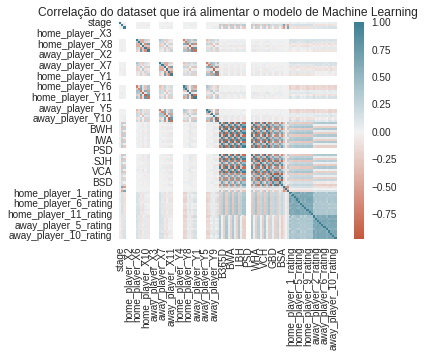

In [ ]:
# Checando a correlação entre as variáveis do dataset que irá alimentar o modelo
corr_features = df_match_red.corr()
ax = sns.heatmap(corr_features, 
                 center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)
ax.set_title('Correlação do dataset que irá alimentar o modelo de Machine Learning')

plt.show()

Olhando para essa matriz, fica bem complicado de observar as correlações altas, devido ao tamanho da figura.

Nesse caso vamos plotar as correlações de forma mais aprofundada:

In [ ]:
# Obtendo a correlação das variáveis do dataset mais detalhadamente
correlation = corr_features
correlation.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


Como é possível ver nessa matriz de correlação mais detalhada, temos valores com altos níveis de correlação, 98% em alguns casos, então vamos realizar uma limpeza dessas variáveis que possuem mais de 95% de correlação.

In [ ]:
# Criando a matriz de correlação novamente
corr_matrix = df_match_red.corr().abs()

# Selecionando o triângulo superior da matriz de correlação
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Localizando o index das variávis que possuem correlações acima de 95%
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Vamos checar quais são as variáveis que podemos remover do dataset:

In [ ]:
# Checando as variáveis que possuem correlações acima de 95%
to_drop

['BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWA',
 'LBH',
 'LBA',
 'WHH',
 'WHA',
 'SJA',
 'VCH',
 'VCD',
 'VCA',
 'GBA',
 'BSH',
 'BSA']

Vamos então remover essas variáveis:

In [ ]:
# Removendo as variáveis com alta correlação 
df_match_red.drop(df_match_red[to_drop], axis=1, inplace=True)

Dando seguimento nas abordagens de redução de dimensionalidade, também temos uma ferramenta bastante importante, que é o PCA.

#### PCA (Análise do Componente Principal)

PCA, sigla em inglês de Principal Components Analysis, é uma técnica de redução de dimensionalidade linear é utilizada para extrair informações de um espaço com muitas dimensões e projetando essas informações em um espaço reduzido.

Essa técnica procura preservar as partes essenciais dos dados, aquelas que possuem maiores variações, e remover aquelas que consideradas não essenciais, que são as com poucas variações.

Como essa técnica é bastante afetada pela escala dos dados, precisamos realizar uma padronização dos dados, nesse caso utilizando o método `Standard Scaler`.

Esse método é essencial mesmo quando não usamos a técnica PCA, uma vez que estamos desenvolvendo um modelo de Machine Learning, pois dados em escalas diferentes afetam bastante nos cálculos matemáticos realizados pelos algoritmos.

In [ ]:
# Copiando o dataset para essa técnica
df_match_pca = df_match_red.copy()

# Vamos dropar as variáveis alvos que criamos, que são as relacionadas as vitorias ou empates
df_match_pca.drop(columns=['Home Win', 'Draw', 'Away Win'], axis=1, inplace=True)

# Aplicando a padronização nos dados
df_match_pca_std = StandardScaler().fit_transform(df_match_pca)

Agora vamos instanciar a técnica PCA:

In [ ]:
# Instanciando a técnica PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(df_match_pca_std)

Podemos visualizar os componentes e suas variações em um gráfico:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

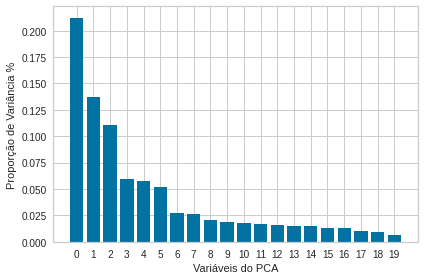

In [ ]:
# Plotando o gráfico com as variações dos componentes
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('Variáveis do PCA')
plt.ylabel('Proporção de Variância %')
plt.xticks(features)

plt.tight_layout()

Para termos uma visualização ainda mais detalhada das variações, vamos criar um DataFrame com os componentes gerados pela técnica PCA e então observar a correlação entre os dois principais componentes: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

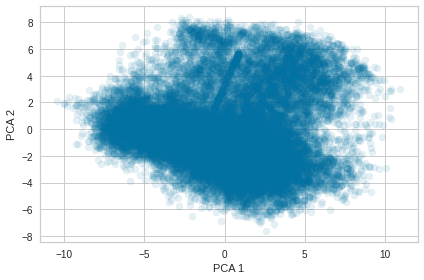

In [ ]:
# Salvando os componentes gerados pelo PCA em um DataFrame
PCA_components = pd.DataFrame(principalComponents)

# Plotando o gráfico de dispersão dos dois principais componentes
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()

Pelo plot acima, vemos um possível agrupamento se formando, o que insinua que as observações dos nosso dados podem ser agrupadas utilizando um algoritmo para essa finalidade.

Para realizar os agrupamentos e também para conseguirmos ver de forma detalhada os outros componentes que não vimos no plot, usaremos o algoritmo de aprendizado não supervisionado `K-Means`.



#### K-Means e a aplicação da Elbow Rule

Antes de aplicarmos esse modelo não supervisionado para encontrar grupos nos nossos dados, é necessário encontrar o número ótimo de grupos que nossos dados podem fornecer, e para isso existe uma técnica conhecida como **Elbow Rule**, ou **A Regra do Cotovelo**, na tradução livre.

Essa regra na verdade quer dizer que existe um ponto em específico, chamado de *dobra do cotovelo*, ou *elbow point* em inglês, em que a inércia e a variação dos dados não são mais significantes. 

Essa inércia é na verdade o valor da soma das distâncias de todos os pontos de um grupo para seu centroide, ou seja, ela informa o quão longe os pontos de dados um grupo estão do seu centro.

Como podemos ver no gráfico de barras com os componentes do PCA que plotamos anteriormente, a partir do terceiro componente, a variação de dados cai bastante e depois continua a reduzir gradativamente, portanto para o K-Means, iremos utilizar apenas os três principais componentes obtidos.

Vamos então encontrar o número ótimo de agrupamentos que podemos ter com nossos dados:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

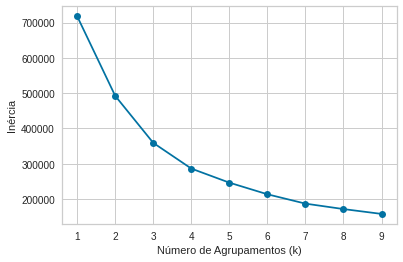

In [ ]:
# Plotando o gráfico da regra do cotovelo (Elbow Rule)

# Criando um loop para realizarmos os testes com 1 a 10 agrupamentos
ks = range(1, 10)
inertias = []

# Executando o loop dos testes
for k in ks:
    # Instanciando o modelo K-Means para o número de agrupamentos (k) específico do loop
    model = KMeans(n_clusters=k)
    
    # Adaptando o modelo para utilizar os três componentes principais
    model.fit(PCA_components.iloc[:,:3])
    
    # Adicionando o valor da inércia na lista
    inertias.append(model.inertia_)

# Plotando o gráfico com os resultados dos testes    
plt.plot(ks, inertias, '-o')
plt.xlabel('Número de Agrupamentos (k)')
plt.ylabel('Inércia')
plt.xticks(ks)
plt.show()

Como podemos perceber, o gráfico sofre uma "dobra" no modelo com 3 agrupamentos, ou seja, esse é o nosso número ótimo.

Agora que temos o número de grupos (k = 3), vamos treinar nosso modelo do K-Means e ver os agrupamentos formados utilizando as informações obtidas pela técnica PCA:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

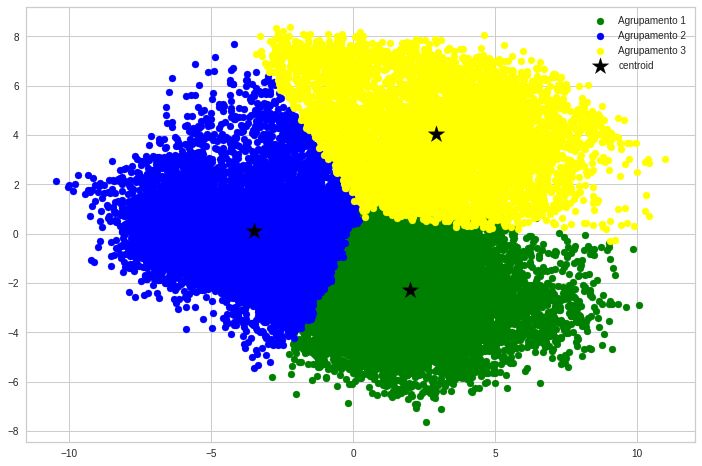

In [ ]:
# Obtendo os três principais componentes do PCA em uma matriz
X_pca = PCA_components.iloc[:,:3].to_numpy()

# Instanciando novamente o K-Means
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 54)
y_kmeans = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], c='green', label='Agrupamento 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], c='blue', label='Agrupamento 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], c='yellow', label='Agrupamento 3')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='black', label='centroid')
plt.legend()

Aproveitando que já temos o KMeans instanciado e treinado, vamos avaliar o desempenho do modelo com o método da **Silhouette Analysis**, ou **Análise de Silhueta** na tradução livre, que determina o grau de separação entre os agrupamentos formados.

Como durante a aplicação da regra do cotovelo, não tivemos uma "dobra" muito expressiva, poderíamos pegar os valores entre 3 a 5 para o número ótimo. Com essa análise de silhueta, podemos confirmar qual número de agrupamentos é realmente o melhor para os nossos dados:



<IPython.core.display.Javascript object>

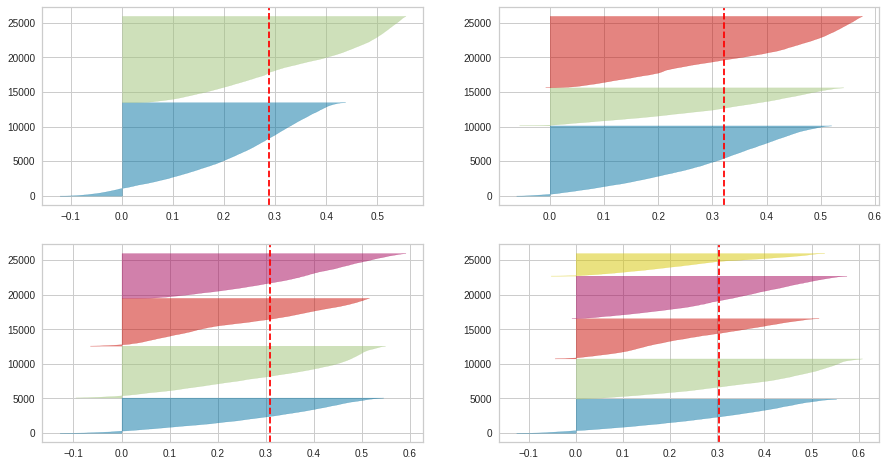

In [ ]:
# Plotando as análises de silhueta para k= 2, 3, 4 e 5
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    
    # Instanciando novamente o modelo K-Means para cada número de K
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Instanciando a análise de silhueta
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_pca)

In [ ]:
# Obtendo a pontuação específica de k = 3
score_1 = silhouette_score(X_pca, y_kmeans, metric='euclidean')
print('Pontuação da Análise de Silhueta: {:.2f}'.format(score_1))

Pontuação da Análise de Silhueta: 0.32


Pela Análise de Silhueta, quanto mais a pontuação for próxima de 1, mais denso e bem separado é o agrupamento criado, e quanto mais próximo de 0 ocorre o inverso.

Temos a maior pontuação com o número de agrupamentos igual 3, portanto foi uma boa escolha.

Agora que temos uma pontuação para o agrupamento realizado pelo K-Means com os dados reduzidos pela técnica PCA, vamos realizar os testes com os datasets mais simples, da seguinte forma:

1. Teste do desempenho de classificação dos agrupamentos com o dataset `match` cru;
2. Teste do desempenho de classificação dos agrupamentos com o dataset obtido após os tratamentos e Feature Engineering/Selection;
3. Teste do desempenho de classificação do modelo sem a técnica PCA;

4. Extra - Vamos realizar também o teste para o dataset `match` apenas limpo de outliers e dados nulos. 


Com esses 4 testes, podemos ver o quanto o desempenho do modelo K-Means é afetado por cada etapa que realizamos ao longo do projeto.

## Testes de Desempenho do K-Means

### Teste 1 - Dataset Cru

Vamos utilizar nesse teste o dataset `match` importado, sem nenhum tratamento realizado:

In [ ]:
# Copiando o dataset cru para essa etapa
df_teste_1 = df_match.select_dtypes(exclude='object').copy()

# Removendo os valores NaN
df_teste_1.dropna(inplace=True)

Agora vamos aplicar a regra do cotovelo para determinar a quantidade de agrupamentos para esses dados:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

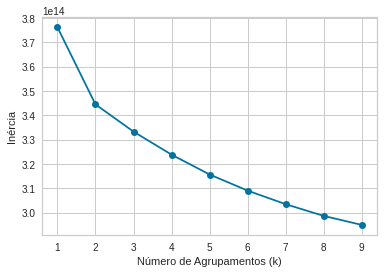

In [ ]:
# Plotando o gráfico da regra do cotovelo (Elbow Rule)

# Criando um loop para realizarmos os testes com 1 a 10 agrupamentos
ks = range(1, 10)
inertias = []

# Executando o loop dos testes
for k in ks:
    # Instanciando o modelo K-Means para o número de agrupamentos (k) específico do loop
    model = KMeans(n_clusters=k)
    
    # Adaptando o modelo para utilizar os três componentes principais
    model.fit(df_teste_1)
    
    # Adicionando o valor da inércia na lista
    inertias.append(model.inertia_)

# Plotando o gráfico com os resultados dos testes    
plt.plot(ks, inertias, '-o')
plt.xlabel('Número de Agrupamentos (k)')
plt.ylabel('Inércia')
plt.xticks(ks)
plt.show()

Pela regra do cotovelo, temos o número ótimo de 2 agrupamentos para os dados não tratados.

Vamos utilizar a análise de silhueta para os números 2 e 3 de agrupamentos:

<IPython.core.display.Javascript object>

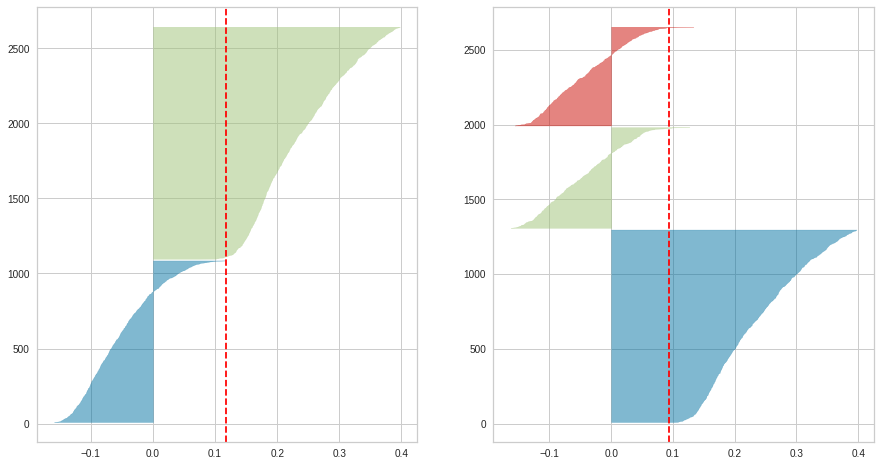

In [ ]:
# Plotando as análises de silhueta para k= 2 e 3
fig, ax = plt.subplots(1, 2, figsize=(15,8))
for i in [2, 3]:
    
    # Instanciando novamente o modelo K-Means para cada número de K
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q = i

    # Instanciando a análise de silhueta
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-2])
    visualizer.fit(df_teste_1)

Já para o dataset cru, a melhor pontuação foi para 2 agrupamentos.

In [ ]:
# Instanciando e treianando o K-Means para obter a pontuação de k = 2
km = KMeans(n_clusters=2, random_state=42)
y_kmeans_2 = km.fit_predict(df_teste_1)

# Obtendo a pontuação específica de k = 2
score_2 = silhouette_score(df_teste_1, y_kmeans_2, metric='euclidean')
print('Pontuação da Análise de Silhueta: {:.2f}'.format(score_2))

Pontuação da Análise de Silhueta: 0.12


### Teste 2 - Dataset Preparado para modelos de ML

Vamos utilizar o dataset que passou pelos tratamentos e Feature Engineering/Selection.

In [ ]:
# Copiando o dataset cru para essa etapa
df_teste_2 = df_match_prp.select_dtypes(exclude='object').copy()

Agora vamos aplicar a regra do cotovelo para esses dados:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

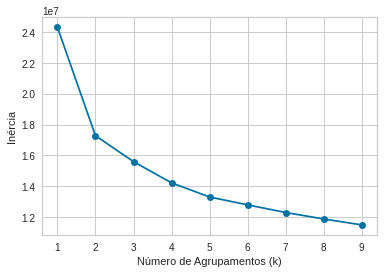

In [ ]:
# Plotando o gráfico da regra do cotovelo (Elbow Rule)

# Criando um loop para realizarmos os testes com 1 a 10 agrupamentos
ks = range(1, 10)
inertias = []

# Executando o loop dos testes
for k in ks:
    # Instanciando o modelo K-Means para o número de agrupamentos (k) específico do loop
    model = KMeans(n_clusters=k)
    
    # Adaptando o modelo para utilizar os três componentes principais
    model.fit(df_teste_2)
    
    # Adicionando o valor da inércia na lista
    inertias.append(model.inertia_)

# Plotando o gráfico com os resultados dos testes    
plt.plot(ks, inertias, '-o')
plt.xlabel('Número de Agrupamentos (k)')
plt.ylabel('Inércia')
plt.xticks(ks)
plt.show()

Pela regra do cotovelo podemos dizer que o ponto ótimo é 2 agrupamentos, mas vamos confirmar com a análise de silhueta:

<IPython.core.display.Javascript object>

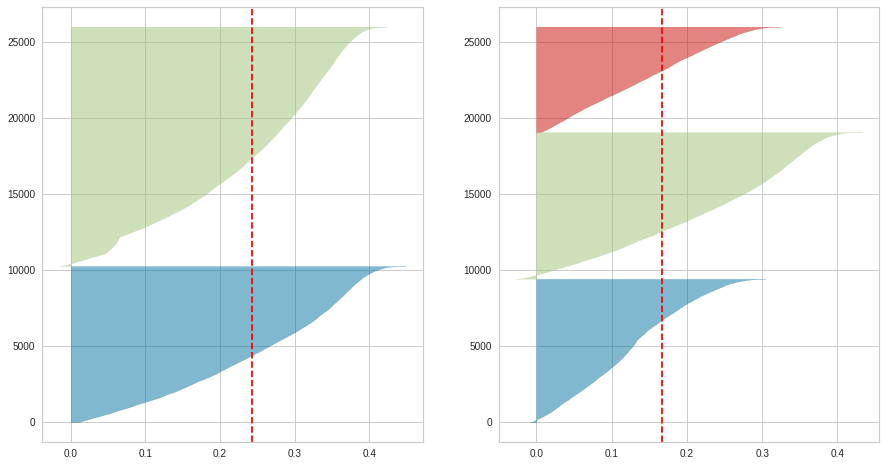

In [ ]:
# Plotando as análises de silhueta para k= 2 e 3
fig, ax = plt.subplots(1, 2, figsize=(15,8))
for i in [2, 3]:
    
    # Instanciando novamente o modelo K-Means para cada número de K
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q = i

    # Instanciando a análise de silhueta
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-2])
    visualizer.fit(df_teste_2)

Para os dados apenas tratados, temos que o número de agrupamentos ótimo é realmente de k = 2.

In [ ]:
# Instanciando e treianando o K-Means para obter a pontuação de k = 2
km = KMeans(n_clusters=2, random_state=42)
y_kmeans_3 = km.fit_predict(df_teste_2)

# Obtendo a pontuação específica de k = 2
score_3 = silhouette_score(df_teste_2, y_kmeans_3, metric='euclidean')
print('Pontuação da Análise de Silhueta: {:.2f}'.format(score_3))

Pontuação da Análise de Silhueta: 0.24


### Teste 3 - Dataset Sem PCA

Vamos utilizar o dataset que passou pelos tratamentos e Feature Engineering/Selection e pela remoção das variáveis com alta correlação:

In [ ]:
# Copiando o dataset para esse teste
df_teste_3 = df_match_red.select_dtypes(exclude='object').copy()

Aplicando a regra do cotovelo:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

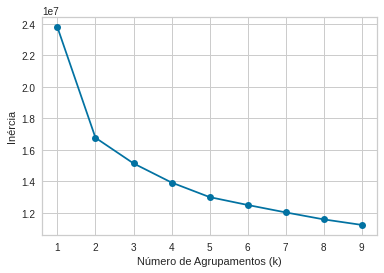

In [ ]:
# Plotando o gráfico da regra do cotovelo (Elbow Rule)

# Criando um loop para realizarmos os testes com 1 a 10 agrupamentos
ks = range(1, 10)
inertias = []

# Executando o loop dos testes
for k in ks:
    # Instanciando o modelo K-Means para o número de agrupamentos (k) específico do loop
    model = KMeans(n_clusters=k)
    
    # Adaptando o modelo para utilizar os três componentes principais
    model.fit(df_teste_3)
    
    # Adicionando o valor da inércia na lista
    inertias.append(model.inertia_)

# Plotando o gráfico com os resultados dos testes    
plt.plot(ks, inertias, '-o')
plt.xlabel('Número de Agrupamentos (k)')
plt.ylabel('Inércia')
plt.xticks(ks)
plt.show()

Pela regra do cotovelo para o dataset em questão, o ponto ótimo seria 2 agrupamentos, porém vamos aplicar a análise de silhueta para confirmar:

<IPython.core.display.Javascript object>

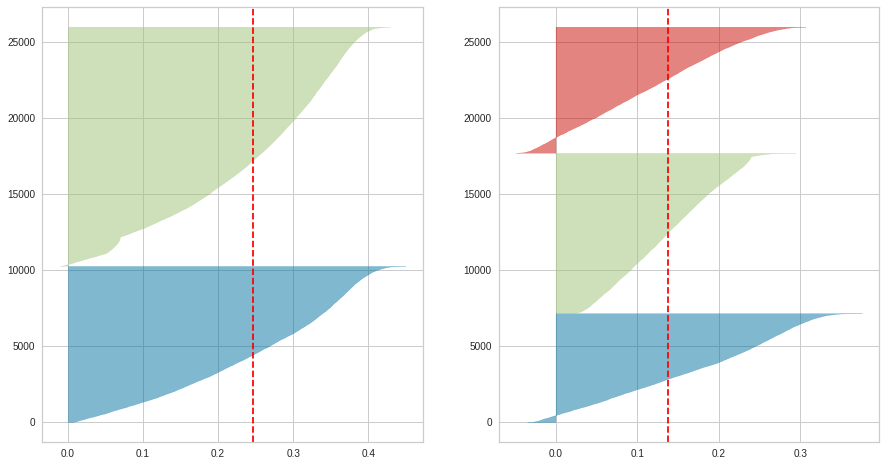

In [ ]:
# Plotando as análises de silhueta para k= 2 e 3
fig, ax = plt.subplots(1, 2, figsize=(15,8))
for i in [2, 3]:
    
    # Instanciando novamente o modelo K-Means para cada número de K
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q = i

    # Instanciando a análise de silhueta
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-2])
    visualizer.fit(df_teste_3)

Para o dataset sem a técnica de PCA, tivemos que o número ótimo de agrupamentos é de k = 2.

In [ ]:
# Instanciando e treianando o K-Means para obter a pontuação de k = 2
km = KMeans(n_clusters=2, random_state=42)
y_kmeans_4 = km.fit_predict(df_teste_3)

# Obtendo a pontuação específica de k = 2
score_4 = silhouette_score(df_teste_3, y_kmeans_4, metric='euclidean')
print('Pontuação da Análise de Silhueta: {:.2f}'.format(score_4))

Pontuação da Análise de Silhueta: 0.25


Agora vamos para o último teste, utilizando os dados apenas limpos das outliers e com os dados ausentes ou nulos preenchidos no dataset `match`.

### Teste 4 - Dataset match_clean

**OBSERVAÇÕES DO AUTOR:** *Durante um teste de código, descobri esse insight bastante interessante, que mostra que nem sempre a redução é o melhor caminho para termos agrupamentos mais densos e bem separados.*

Vamos usar o dataset que possui apenas os dados limpos de dados nulos ou ausentes e de outliers:

In [ ]:
# Copiando o dataset para esse teste
df_teste_4 = df_match_clean.select_dtypes(exclude='object').copy()

Vamos aplicar a regra do cotovelo:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

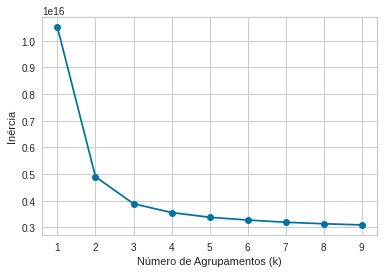

In [ ]:
# Plotando o gráfico da regra do cotovelo (Elbow Rule)

# Criando um loop para realizarmos os testes com 1 a 10 agrupamentos
ks = range(1, 10)
inertias = []

# Executando o loop dos testes
for k in ks:
    # Instanciando o modelo K-Means para o número de agrupamentos (k) específico do loop
    model = KMeans(n_clusters=k)
    
    # Adaptando o modelo para utilizar os três componentes principais
    model.fit(df_teste_4)
    
    # Adicionando o valor da inércia na lista
    inertias.append(model.inertia_)

# Plotando o gráfico com os resultados dos testes    
plt.plot(ks, inertias, '-o')
plt.xlabel('Número de Agrupamentos (k)')
plt.ylabel('Inércia')
plt.xticks(ks)
plt.show()

Pela regra do cotovelo temos o número ótimo de agrupamentos em 2, mas vamos confirmar com a análise de silhueta:

<IPython.core.display.Javascript object>

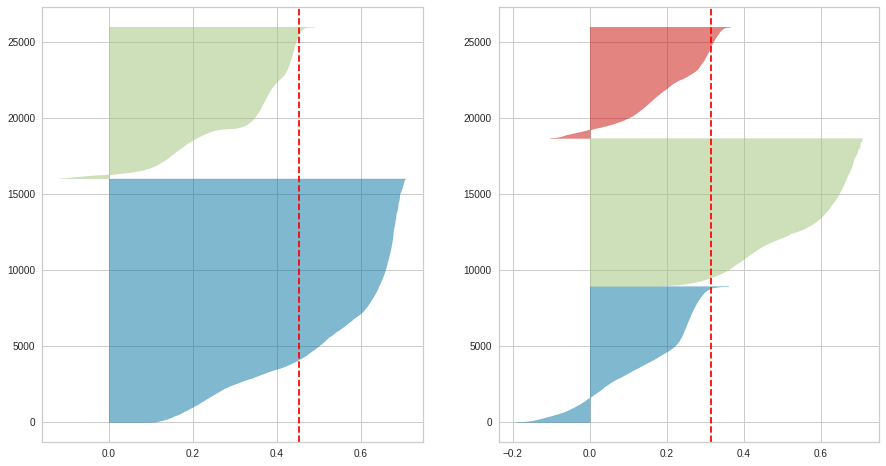

In [ ]:
# Plotando as análises de silhueta para k= 2 e 3
fig, ax = plt.subplots(1, 2, figsize=(15,8))
for i in [2, 3]:
    
    # Instanciando novamente o modelo K-Means para cada número de K
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q = i

    # Instanciando a análise de silhueta
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-2])
    visualizer.fit(df_teste_4)

Para o dataset apenas com as outliers removidas e os dados ausentes ou nulos tratados, tivemos o número ótimo de agrupamentos em k = 2.

O porquê de realizarmos esse teste por último é para mostrar que apenas com a primeira etapa de tratamento de dados, a qualidade dos agrupamentos foi bem melhor que nos outros testes realizados, inclusive maior que o agrupamento realizado nos dados reduzidos.

Vamos obter a pontuação mais detalhada para esse teste:

In [ ]:
# Instanciando e treianando o K-Means para obter a pontuação de k = 2
km = KMeans(n_clusters=2, random_state=42)
y_kmeans_5 = km.fit_predict(df_teste_4)

# Obtendo a pontuação específica de k = 2
score_5 = silhouette_score(df_teste_4, y_kmeans_5, metric='euclidean')
print('Pontuação da Análise de Silhueta: {:.2f}'.format(score_5))

Pontuação da Análise de Silhueta: 0.45


Para não precisarmos voltar em cada teste para olharmos os resultados, vamos criar um DataFrame com os resultados dos testes dos agrupamentos.

## Resultados dos testes dos agrupamentos

In [ ]:
# Criando um DataFrame para os resultados
df_resultados_testes_1 = pd.DataFrame([[score_1, 3], 
                                       [score_2, 2],
                                       [score_3, 2],
                                       [score_4, 2],
                                       [score_5, 2]],
                                       index=['Dataset das Etapas','Dataset Cru','Dataset Preparado',
                                              'Dataset sem PCA','Dataset Tratado'], 
                                       columns=['Pontuação da Análise de Silhueta','Agrupamentos'])
# Chamando o DataFrame com os resultados
df_resultados_testes_1

<IPython.core.display.Javascript object>

,Pontuação da Análise de Silhueta,Agrupamentos
Dataset das Etapas,0.321415,3
Dataset Cru,0.118403,2
Dataset Preparado,0.242409,2
Dataset sem PCA,0.246946,2
Dataset Tratado,0.452984,2


Como podemos ver, é interessante notar que para as etapas: Dataset original (com os valores nulos todos removidos), Preparação de Dados e Redução da Dimensionalide houve uma melhora na pontuação do K-Means, porém o agrupamento realizado no dataset apenas com a primeira etapa que realizamos no projeto, a de tratamento dos dados, conseguiu obter uma pontuação ainda superior.

Isso quer dizer que para fazermos um agrupamento de dados, **nem sempre que aplicarmos a redução de dimensionalidade ou criarmos novas features (características), estamos melhorando a capacidade de agrupamento do algoritmo utilizado.**

Porém para descobrirmos se esse dataset apenas tratado é realmente melhor que o que passou por todas as etapas do projeto, vamos utilizar todas as informações geradas até agora nos modelos que comentamos anteriormente para classificar se em uma partida, houve ganhador ou se houve empate.

## Utilizando modelos de classificação para prever se o time jogando em casa venceu ou não a partida

Durante a etapa de Feature Engineering, criamos três variáveis que vão ser nossas variáveis alvos para o modelo classificar, que são as: `Home Win`, `Draw` e `Away Win`.

Para os testes com os modelo, iremos realizar cinco fases:

1. Alimentando o modelo com o dataset `clean`, apenas com a etapa de tratamento de dados, que foi superior na pontuação de formação de agrupamentos;

2. Alimentando o modelo com o dataset original;

3. Alimentando o modelo com o dataset da etapa de preparação dos dados;

4. Alimentando o modelo com o dataset sem aplicação da técnica de PCA para redução de dimensionalidade.

5. Alimentando o modelo com o dataset reduzido e agrupado.

Vamos iniciar os testes e no fim comparar os resultados dos modelos, que serão:

* Logistic Regression (Regressão Logística);
* Decision Tree (Árvores de Decisões);
* Random Forest (Floresta Aleatória);
* Support Vector Machine (Máquina de Vetor de Suporte);
* GaussianNB (Naive Bayes);
* XGBoost;

### Teste 1 - Modelo alimentado com o dataset clean

Primeiro vamos copiar o dataset que será utilizado nesse teste:

In [ ]:
# Copiando o dataset para o teste
dataset_teste_1 = df_match_clean.select_dtypes(exclude='object').copy()

Como utilizamos esse dataset para o teste com o K-Means, vamos acrescentar o agrupamento ao dataset original, assim como também uma das variáveis alvos para o modelo que criamos.

Como foi criado 3 variáveis alvos, iremos utilizar o método de validação separada, nesse caso vamos utilizar nessa análise apenas a variável `Home Win`, que informa se o time da casa venceu ou não, nesse caso levaremos em conta que empates significam derrotas.

Ao fim do projeto iremos realizar um teste extra mostrando que é possível utilizar mais de uma variável alvo em um problema de classificação, além do mais, vale ressaltar que utilizar as três variáveis juntas não faz muito sentido, uma vez na partida só há um vencedor ou empate, ou seja, se fôssemos utilizar realmente mais de uma variável alvo, seria conveniente usar uma das variáveis relacionadas à vitória e a variável empate como dependentes. Dessa forma caso o time em questão perca, o modelo prevê se foi empate ou não.

Por motivos didáticos iremos realizar o teste extra com as três ao mesmo tempo.

Agora dando seguimento no projeto vamos utilizar apenas a variável alvo `Home Win` no momento:

In [ ]:
# Adicionando a variável dos agrupamentos
dataset_teste_1['Agrupamentos'] = y_kmeans_5

# Adicionando as variáveis alvo
dataset_teste_1['Home Win'] = df_match_prp['Home Win']

# Checando o DataFrame
dataset_teste_1.head()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,...,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Agrupamentos,Home Win
0,1.0,1.0,1.0,1.0,492473.0,9987.0,9993.0,1.0,1.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,8.0,...,41083.0,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,1.73,3.40,5.00,1.750,3.35,4.20,1.850,3.2,3.5,1.800,3.3,3.75,2.2,3.64,3.61,1.700,3.30,4.33,1.900,3.3,4.00,1.650,3.40,4.50,1.9,3.25,4.000,1.825,3.40,3.95,0,0
1,2.0,1.0,1.0,1.0,492474.0,10000.0,9994.0,0.0,0.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,8.0,...,41083.0,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,1.95,3.20,3.60,1.800,3.30,3.95,1.900,3.2,3.5,1.900,3.2,3.50,2.2,3.64,3.61,1.830,3.30,3.60,1.950,3.3,3.80,2.000,3.25,3.25,1.9,3.25,3.750,1.910,3.25,3.60,0,0
2,3.0,1.0,1.0,1.0,492475.0,9984.0,8635.0,0.0,3.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,8.0,...,41083.0,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,2.38,3.30,2.75,2.400,3.30,2.55,2.600,3.1,2.3,2.500,3.2,2.50,2.2,3.64,3.61,2.500,3.25,2.40,2.630,3.3,2.50,2.350,3.25,2.65,2.3,3.20,2.725,2.300,3.20,2.75,0,0
3,4.0,1.0,1.0,1.0,492476.0,9991.0,9998.0,3.5,0.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,8.0,...,41083.0,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,1.44,3.75,7.50,1.400,4.00,6.80,1.400,3.9,6.0,1.440,3.6,6.50,2.2,3.64,3.61,1.440,3.75,6.00,1.440,3.8,5.50,1.450,3.75,6.50,1.9,3.55,4.125,1.825,3.55,3.95,0,1
4,5.0,1.0,1.0,1.0,492477.0,7947.0,9985.0,1.0,3.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,8.0,...,41083.0,46212.0,41634.5,41433.0,45816.0,45860.0,45358.0,42652.0,3.95,3.50,1.65,3.875,3.50,1.60,3.625,3.3,1.7,3.655,3.4,1.72,2.2,3.64,3.61,3.925,3.40,1.70,3.085,3.5,1.73,3.925,3.40,1.65,2.3,3.50,2.725,2.425,3.30,2.75,0,0


Agora que temos o dataset pronto, devemos separar os dados das variáveis alvos:

In [ ]:
# Separando os dados da variável alvo
X_clean = dataset_teste_1.drop(columns=['Home Win'])
y_clean = dataset_teste_1['Home Win']

Vamos criar duas funções para realizarmos as validações dos modelos de classificação, uma para os dados de alimentação padronizados e outra para os dados normalizados.

In [ ]:
# Validação Cruzada com base na métrica Acurácia - Padronizado
def val_model_padronizado(X, y, clf):
  X = np.array(X) # contém as variáveis independentes
  y = np.array(y) # contem a variável alvo

  pipeline_pd = make_pipeline(StandardScaler(), clf)
  scores_pd = cross_val_score(pipeline_pd, X, y, scoring='accuracy', cv= 10)
  return scores_pd.mean()

# Validação Cruzada com base na métrica Acurácia - Normalizado
def val_model_normalizado(X, y, clf):
  X = np.array(X) # contém as variáveis independentes
  y = np.array(y) # contem a variável alvo

  pipeline_nm = make_pipeline(MinMaxScaler(), clf)
  scores_nm = cross_val_score(pipeline_nm, X, y, scoring='accuracy', cv= 10)
  return scores_nm.mean()

# Instanciar os modelos de Machine Learning para Classificação
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
gnb = GaussianNB() 
xgb = XGBClassifier()

Agora que criamos as funções de validação cruzada, com as técnicas de padronização e normalização dos dados e também instanciamos os modelos de classificação, está na hora de separarmos os dados entre treino e teste:

In [ ]:
# Dividindo entre treino e teste
X_clean_train, X_clean_test, y_clean_train, y_clean_test = train_test_split(X_clean, y_clean, test_size=0.20)

<IPython.core.display.Javascript object>

Antes de executarmos o código, vamos checar o balanceamento das variáveis alvos:

In [ ]:
# Observando o balanceamento da classe na variável alvo 'Home Win'
y_clean.value_counts()

0    14186
1    11793
Name: Home Win, dtype: int64

Apesar de termos um desbalanceamento da classe nessa variável, esse desbalanceamento é leve e portanto pode ser considerado um problema de classificação normal, uma vez que leves desbalanceamentos geralmente não prejudicarem de forma expressiva o desempenho do modelo.

**OBSERVAÇÕES DO AUTOR:** *Embora não utilizei nenhuma técnica de balanceamento nos dados, deixo um incentivo para que você realize essa etapa utilizando as técninas SMOTE Tomek, Under Sampling ou Oversampling, entre outras.*

In [ ]:
# DataFrame com avaliação dos dados Padronizados
model_pd = []
accuracy_pd = []

# Avaliando o desempenho com dados Padronizados
for clf in (lr, dt, rf, svc, gnb, xgb):
  model_pd.append(clf.__class__.__name__)
  accuracy_pd.append(val_model_padronizado(X_clean_train, y_clean_train, clf))

# DataFrame da avaliação dos modelos com dados padronizados 
df_val_pd_clean = pd.DataFrame(data=accuracy_pd, index=model_pd, columns=['Acurácia Padronizado'])

################################################################################

# DataFrame com avaliação dos dados Normalizados
model_nm = []
accuracy_nm = []

# Avaliando o desempenho com dados Normalizados
for clf in (lr, dt, rf, svc, gnb, xgb):
  model_nm.append(clf.__class__.__name__)
  accuracy_nm.append(val_model_normalizado(X_clean_train, y_clean_train, clf))

# DataFrame da avaliação dos modelos com dados normalizados 
df_val_nm_clean = pd.DataFrame(data=accuracy_nm, index=model_nm, columns=['Acurácia Normalizado'])

################################################################################

# Unindo os DataFrames do teste
df_val_clean = df_val_pd_clean.join(df_val_nm_clean['Acurácia Normalizado'])

# Checando o DataFrame
df_val_clean

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Acurácia Padronizado,Acurácia Normalizado
LogisticRegression,1.000000,0.999759
DecisionTreeClassifier,1.000000,1.000000
RandomForestClassifier,0.989077,0.989847
SVC,0.999519,0.999808
GaussianNB,0.709042,0.709042
XGBClassifier,1.000000,1.000000


Para modelos básicos, sem nenhuma mudança de parâmetros impactantes, tivemos resultados muito bons em alguns modelos, onde teve 100% de acurácia, mas será que esses modelos realmente conseguiram representar os dados corretamente e está pronto para sua aplicação no mundo exterior?

Vamos pegar o modelo XGBoost que obteve 100% de acurácia para ambas os testes como exeplo e aplicá-lo aos dados de teste:

#### Utilizando os dados de teste

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2758
           1       1.00      1.00      1.00      2438

    accuracy                           1.00      5196
   macro avg       1.00      1.00      1.00      5196
weighted avg       1.00      1.00      1.00      5196

AUC: 1.0000



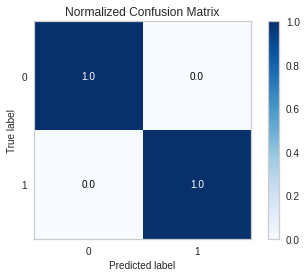

In [ ]:
# Copiando o dataset para o teste
dataset_test_1 = df_match_clean.select_dtypes(exclude='object').copy()

# Adicionando a variável dos agrupamentos
dataset_test_1['Agrupamentos'] = y_kmeans_5

# Adicionando as variáveis alvo
dataset_test_1['Home Win'] = df_match_prp['Home Win']

# Separando os dados entre treino e teste
X_test_1 = dataset_test_1.drop('Home Win', axis=1)
y_test_1 = dataset_test_1['Home Win'] #variável alvo

X_train_test_1, X_test_test_1, y_train_test_1, y_test_test_1 = train_test_split(X_test_1, y_test_1, test_size=0.20)

# Instanciando novamente o modelo para os dados de teste
xgb_clean_test = XGBClassifier()

# Aplicando a regularização de padronização nos dados de treino
pad = StandardScaler().fit(X_train_test_1)
X_train_test_1 = pad.transform(X_train_test_1)

# Treinando o modelo
xgb_clean_test.fit(X_train_test_1, y_train_test_1)

# Realizar a Padronização nos dados de teste
X_test_test_1 = pad.transform(X_test_test_1)

# Fazendo a previsão com os dados de teste
y_pred_final_test_1 = xgb_clean_test.predict(X_test_test_1)

# Relatório de Classificação
print(classification_report(y_test_test_1, y_pred_final_test_1))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test_test_1, y_pred_final_test_1)))

# plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test_test_1, y_pred_final_test_1, normalize=True);

Agora que temos os resultados dos modelos base para esse teste, vamos seguir para o próximo.

### Teste 2 - Dataset original

Como esse dataset é o original, precisamos aplicar alguns tratamento para que o modelo possa lê-lo:

In [ ]:
# Copiando o dataset para essa etapa
dataset_teste_2 = df_match.select_dtypes(exclude='object').copy()

# Acrescentando a variável alvo Home Win
dataset_teste_2['Home Win'] = df_match_prp['Home Win']

# Removendo os valores NaN
dataset_teste_2.dropna(inplace=True)

Agora vamos separar os dados da variável alvo e depois entre treino e teste:

In [ ]:
# Separando os dados da variável alvo
X_raw = dataset_teste_2.drop(columns=['Home Win'])
y_raw = dataset_teste_2['Home Win']

# Dividindo entre treino e teste
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, test_size=0.20)

<IPython.core.display.Javascript object>

Agora vamos executar os treinamentos e obter os resultados:

In [ ]:
# DataFrame com avaliação dos dados Padronizados
model_pd = []
accuracy_pd = []

# Avaliando o desempenho com dados Padronizados
for clf in (lr, dt, rf, svc, gnb, xgb):
  model_pd.append(clf.__class__.__name__)
  accuracy_pd.append(val_model_padronizado(X_raw_train, y_raw_train, clf))

# DataFrame da avaliação dos modelos com dados padronizados 
df_val_pd_raw = pd.DataFrame(data=accuracy_pd, index=model_pd, columns=['Acurácia Padronizado'])

################################################################################

# DataFrame com avaliação dos dados Normalizados
model_nm = []
accuracy_nm = []

# Avaliando o desempenho com dados Normalizados
for clf in (lr, dt, rf, svc, gnb, xgb):
  model_nm.append(clf.__class__.__name__)
  accuracy_nm.append(val_model_normalizado(X_raw_train, y_raw_train, clf))

# DataFrame da avaliação dos modelos com dados normalizados 
df_val_nm_raw = pd.DataFrame(data=accuracy_nm, index=model_nm, columns=['Acurácia Normalizado'])

################################################################################

# Unindo os DataFrames do teste
df_val_raw = df_val_pd_raw.join(df_val_nm_raw['Acurácia Normalizado'])

# Checando o DataFrame
df_val_raw

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Acurácia Padronizado,Acurácia Normalizado
LogisticRegression,0.993810,0.984286
DecisionTreeClassifier,1.000000,1.000000
RandomForestClassifier,0.928571,0.933333
SVC,0.925714,0.921905
GaussianNB,0.677619,0.677619
XGBClassifier,1.000000,1.000000


Assim como no teste anterior, também temos modelos com ótimos resultados no ambiente de treino, então vamos realizar a aplicação de um deles nos dados de teste.

#### Utilizando os dados de teste

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       225

    accuracy                           1.00       526
   macro avg       1.00      1.00      1.00       526
weighted avg       1.00      1.00      1.00       526

AUC: 0.9961



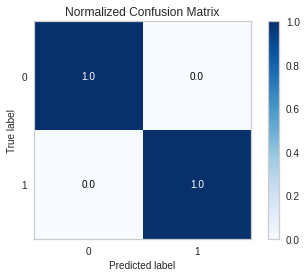

In [ ]:
# Copiando o dataset para essa etapa
dataset_test_2 = df_match.select_dtypes(exclude='object').copy()

# Acrescentando a variável alvo Home Win
dataset_test_2['Home Win'] = df_match_prp['Home Win']

# Removendo os valores NaN
dataset_test_2.dropna(inplace=True)

# Separando os dados da variável alvo
X_test_2 = dataset_test_2.drop(columns=['Home Win'])
y_test_2 = dataset_test_2['Home Win']

# Dividindo entre treino e teste
X_train_test_2, X_test_test_2, y_train_test_2, y_test_test_2 = train_test_split(X_test_2, y_test_2, test_size=0.20)

# Instanciando novamente o modelo para os dados de teste
lr_test_2 = LogisticRegression(max_iter=1000)

# Aplicando a regularização de padronização nos dados de treino
pad = StandardScaler().fit(X_train_test_2)
X_train_test_2 = pad.transform(X_train_test_2)

# Treinando o modelo
lr_test_2.fit(X_train_test_2, y_train_test_2)

# Realizar a Padronização nos dados de teste
X_test_test_2 = pad.transform(X_test_test_2)

# Fazendo a previsão com os dados de teste
y_pred_final_test_2 = lr_test_2.predict(X_test_test_2)

# Relatório de Classificação
print(classification_report(y_test_test_2, y_pred_final_test_2))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test_test_2, y_pred_final_test_2)))

# plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test_test_2, y_pred_final_test_2, normalize=True);

Agora que também temos os desempenhos base dos modelos instanciados, vamos avançar para o próximo teste.

### Teste 3 - Dataset Preparado

Vamos copiar esse dataset para este teste:

In [ ]:
# Copiando o dataset para essa etapa
dataset_teste_3 = df_match_prp.select_dtypes(exclude='object').copy()

# Acrescentando a variável alvo Home Win
dataset_teste_3['Home Win'] = df_match_prp['Home Win']

Realizando a separação dos dados:

In [ ]:
# Separando os dados da variável alvo
X_prep = dataset_teste_3.drop(columns=['Home Win'])
y_prep = dataset_teste_3['Home Win']

# Dividindo entre treino e teste
X_prep_train, X_prep_test, y_prep_train, y_prep_test = train_test_split(X_prep, y_prep, test_size=0.20)

<IPython.core.display.Javascript object>

Com os dados separados, vamos então executar as funções:

In [ ]:
# DataFrame com avaliação dos dados Padronizados
model_pd = []
accuracy_pd = []

# Avaliando o desempenho com dados Padronizados
for clf in (lr, dt, rf, svc, gnb, xgb):
  model_pd.append(clf.__class__.__name__)
  accuracy_pd.append(val_model_padronizado(X_prep_train, y_prep_train, clf))

# DataFrame da avaliação dos modelos com dados padronizados 
df_val_pd_prep = pd.DataFrame(data=accuracy_pd, index=model_pd, columns=['Acurácia Padronizado'])

################################################################################

# DataFrame com avaliação dos dados Normalizados
model_nm = []
accuracy_nm = []

# Avaliando o desempenho com dados Normalizados
for clf in (lr, dt, rf, svc, gnb, xgb):
  model_nm.append(clf.__class__.__name__)
  accuracy_nm.append(val_model_normalizado(X_prep_train, y_prep_train, clf))

# DataFrame da avaliação dos modelos com dados normalizados 
df_val_nm_prep = pd.DataFrame(data=accuracy_nm, index=model_nm, columns=['Acurácia Normalizado'])

################################################################################

# Unindo os DataFrames do teste
df_val_prep = df_val_pd_prep.join(df_val_nm_prep['Acurácia Normalizado'])

# Checando o DataFrame
df_val_prep

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Acurácia Padronizado,Acurácia Normalizado
LogisticRegression,1.000000,1.000000
DecisionTreeClassifier,1.000000,1.000000
RandomForestClassifier,1.000000,1.000000
SVC,1.000000,1.000000
GaussianNB,0.985373,0.985276
XGBClassifier,1.000000,1.000000


Vamos ver o desempenho de um desses modelos nos dados de teste.

#### Utilizando os dados de teste

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2846
           1       1.00      0.97      0.98      2350

    accuracy                           0.98      5196
   macro avg       0.99      0.98      0.98      5196
weighted avg       0.98      0.98      0.98      5196

AUC: 0.9826



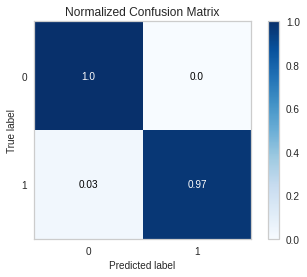

In [ ]:
# Copiando o dataset para essa etapa
dataset_test_3 = df_match_prp.select_dtypes(exclude='object').copy()

# Acrescentando a variável alvo Home Win
dataset_test_3['Home Win'] = df_match_prp['Home Win']

# Separando os dados da variável alvo
X_test_3 = dataset_test_3.drop(columns=['Home Win'])
y_test_3 = dataset_test_3['Home Win']

# Dividindo entre treino e teste
X_train_test_3, X_test_test_3, y_train_test_3, y_test_test_3 = train_test_split(X_test_3, y_test_3, test_size=0.20)

# Instanciando novamente o modelo para os dados de teste
gnb_test_3 = GaussianNB()

# Aplicando a regularização de padronização nos dados de treino
pad = StandardScaler().fit(X_train_test_3)
X_train_test_3 = pad.transform(X_train_test_3)

# Treinando o modelo
gnb_test_3.fit(X_train_test_3, y_train_test_3)

# Realizar a Padronização nos dados de teste
X_test_test_3 = pad.transform(X_test_test_3)

# Fazendo a previsão com os dados de teste
y_pred_final_test_3 = gnb_test_3.predict(X_test_test_3)

# Relatório de Classificação
print(classification_report(y_test_test_3, y_pred_final_test_3))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test_test_3, y_pred_final_test_3)))

# plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test_test_3, y_pred_final_test_3, normalize=True);

Mais um teste concluído, vamos avançar para o próximo.

### Teste 4 - Dataset sem PCA

Vamos importar o dataset apenas com a redução de dimensionalidade feito com a remoção das variáveis com alta correlação:

In [ ]:
# Copiando o dataset para o teste
dataset_teste_4 = df_match_red.select_dtypes(exclude='object').copy()

# Adicionando a variável dos agrupamentos
dataset_teste_4['Agrupamentos'] = y_kmeans_4

# Adicionando as variáveis alvo
dataset_teste_4['Home Win'] = df_match_prp['Home Win']

# Checando o DataFrame
dataset_teste_4.head()

,stage,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,...,B365H,B365D,B365A,IWD,LBD,PSH,PSD,PSA,WHD,SJH,SJD,GBH,GBD,BSD,Home Win,Draw,Away Win,home_player_1_rating,home_player_2_rating,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating,away_player_1_rating,away_player_2_rating,away_player_3_rating,away_player_4_rating,away_player_5_rating,away_player_6_rating,away_player_7_rating,away_player_8_rating,away_player_9_rating,away_player_10_rating,away_player_11_rating,Agrupamentos
0,1.0,1.0,1.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,8.0,10.0,10.0,1.0,3.0,3.0,3.0,...,1.73,3.40,5.00,3.2,3.3,2.2,3.64,3.61,3.30,1.900,3.3,1.9,3.25,3.40,0,1,0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5,1
1,1.0,0.0,0.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,8.0,10.0,10.0,1.0,3.0,3.0,3.0,...,1.95,3.20,3.60,3.2,3.2,2.2,3.64,3.61,3.30,1.950,3.3,1.9,3.25,3.25,0,1,0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5,1
2,1.0,0.0,3.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,8.0,10.0,10.0,1.0,3.0,3.0,3.0,...,2.38,3.30,2.75,3.1,3.2,2.2,3.64,3.61,3.25,2.630,3.3,2.3,3.20,3.20,0,0,1,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5,1
3,1.0,3.5,0.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,8.0,10.0,10.0,1.0,3.0,3.0,3.0,...,1.44,3.75,7.50,3.9,3.6,2.2,3.64,3.61,3.75,1.440,3.8,1.9,3.55,3.55,1,0,0,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5,1
4,1.0,1.0,3.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,6.0,5.0,5.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,8.0,10.0,10.0,1.0,3.0,3.0,3.0,...,3.95,3.50,1.65,3.3,3.4,2.2,3.64,3.61,3.40,3.085,3.5,2.3,3.50,3.30,0,0,1,64.0,77.5,73.5,67.0,62.0,79.0,73.0,79.5,71.0,69.0,72.0,63.0,77.5,70.5,76.0,68.0,71.5,80.0,64.0,72.0,72.0,67.5,1


Realizando a separação dos dados:

In [ ]:
# Separando os dados da variável alvo
X_red = dataset_teste_4.drop(columns=['Home Win'])
y_red = dataset_teste_4['Home Win']

# Dividindo entre treino e teste
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.20)

<IPython.core.display.Javascript object>

Agora executando o código das funções:

In [ ]:
# DataFrame com avaliação dos dados Padronizados
model_pd = []
accuracy_pd = []

# Avaliando o desempenho com dados Padronizados
for clf in (lr, dt, rf, svc, gnb, xgb):
  model_pd.append(clf.__class__.__name__)
  accuracy_pd.append(val_model_padronizado(X_red_train, y_red_train, clf))

# DataFrame da avaliação dos modelos com dados padronizados 
df_val_pd_red = pd.DataFrame(data=accuracy_pd, index=model_pd, columns=['Acurácia Padronizado'])

################################################################################

# DataFrame com avaliação dos dados Normalizados
model_nm = []
accuracy_nm = []

# Avaliando o desempenho com dados Normalizados
for clf in (lr, dt, rf, svc, gnb, xgb):
  model_nm.append(clf.__class__.__name__)
  accuracy_nm.append(val_model_normalizado(X_red_train, y_red_train, clf))

# DataFrame da avaliação dos modelos com dados normalizados 
df_val_nm_red = pd.DataFrame(data=accuracy_nm, index=model_nm, columns=['Acurácia Normalizado'])

################################################################################

# Unindo os DataFrames do teste
df_val_red = df_val_pd_red.join(df_val_nm_red['Acurácia Normalizado'])

# Checando o DataFrame
df_val_red

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Acurácia Padronizado,Acurácia Normalizado
LogisticRegression,1.0,1.0
DecisionTreeClassifier,1.0,1.0
RandomForestClassifier,1.0,1.0
SVC,1.0,1.0
GaussianNB,1.0,1.0
XGBClassifier,1.0,1.0


Mais uma vez vemos excelentes desempenhos, nesse caso todos os modelos tiveram 100% de acurácia.

Vamos ver como um deles se sai com os dados de teste.

#### Utilizando os dados de teste

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2814
           1       1.00      1.00      1.00      2382

    accuracy                           1.00      5196
   macro avg       1.00      1.00      1.00      5196
weighted avg       1.00      1.00      1.00      5196

AUC: 1.0000



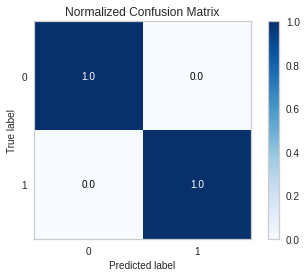

In [ ]:
# Copiando o dataset para o teste
dataset_test_4 = df_match_red.select_dtypes(exclude='object').copy()

# Adicionando a variável dos agrupamentos
dataset_test_4['Agrupamentos'] = y_kmeans_4

# Adicionando as variáveis alvo
dataset_test_4['Home Win'] = df_match_prp['Home Win']

# Separando os dados da variável alvo
X_test_4 = dataset_test_4.drop(columns=['Home Win'])
y_test_4 = dataset_test_4['Home Win']

# Dividindo entre treino e teste
X_train_test_4, X_test_test_4, y_train_test_4, y_test_test_4 = train_test_split(X_test_4, y_test_4, test_size=0.20)

# Instanciando novamente o modelo para os dados de teste
gnb_test_4 = GaussianNB()

# Aplicando a regularização de padronização nos dados de treino
pad = StandardScaler().fit(X_train_test_4)
X_train_test_4 = pad.transform(X_train_test_4)

# Treinando o modelo
gnb_test_4.fit(X_train_test_4, y_train_test_4)

# Realizar a Padronização nos dados de teste
X_test_test_4 = pad.transform(X_test_test_4)

# Fazendo a previsão com os dados de teste
y_pred_final_test_4 = gnb_test_4.predict(X_test_test_4)

# Relatório de Classificação
print(classification_report(y_test_test_4, y_pred_final_test_4))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test_test_4, y_pred_final_test_4)))

# plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test_test_4, y_pred_final_test_4, normalize=True);

Agora que temos os resultados, vamos para o último teste com os datasets.

### Teste 5 - Dataset com PCA

Como a técnica PCA precisa de dados padronizados, não iremos realizar os testes com os dados normalizados.

Copiando o dataset para esse teste:

In [ ]:
# Copiando o dataset para o teste
dataset_teste_5 = PCA_components.iloc[:,:3].copy()

# Adicionando a variável dos agrupamentos
dataset_teste_5['Agrupamentos'] = y_kmeans

# Adicionando as variáveis alvo
dataset_teste_5['Home Win'] = df_match_prp['Home Win']

# Checando o DataFrame
dataset_teste_5.head()

,0,1,2,Agrupamentos,Home Win
0,-0.967475,0.765860,-1.578402,1,0
1,-1.207679,-0.044079,-1.738315,1,0
2,-1.506975,-1.791021,-2.383660,1,0
3,0.274123,4.261570,-1.063640,2,1
4,-1.012930,-1.196483,-2.659410,1,0


Separando os dados:

In [ ]:
# Separando os dados da variável alvo
X_pca = dataset_teste_5.drop(columns=['Home Win'])
y_pca = dataset_teste_5['Home Win']

# Dividindo entre treino e teste
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size=0.20)

<IPython.core.display.Javascript object>

Como os dados já estão padronizados, vamos ter que instanciar as funções novamente para evitar realizar outra padronização em cima dos dados:

In [ ]:
# Validação Cruzada com base na métrica Acurácia - Padronizado
def val_model_padronizado_pca(X, y, clf):
  X = np.array(X) # contém as variáveis independentes
  y = np.array(y) # contem a variável alvo

  scores_pd = cross_val_score(X, y, scoring='accuracy')
  return scores_pd.mean()

Executando o código das novas funções:

In [ ]:
# DataFrame com avaliação dos dados Padronizados
model_pd = []
accuracy_pd = []

# Avaliando o desempenho com dados Padronizados
for clf in (lr, dt, rf, svc, gnb, xgb):
  model_pd.append(clf.__class__.__name__)
  accuracy_pd.append(val_model_padronizado(X_pca_train, y_pca_train, clf))

# DataFrame da avaliação dos modelos com dados padronizados 
df_val_pd_pca = pd.DataFrame(data=accuracy_pd, index=model_pd, columns=['Acurácia Padronizado'])

# Checando o DataFrame
df_val_pd_pca

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Acurácia Padronizado
LogisticRegression,0.654092
DecisionTreeClassifier,0.574797
RandomForestClassifier,0.631960
SVC,0.652264
GaussianNB,0.648944
XGBClassifier,0.661503


Como podemos ver, os resultados foram bem abaixo dos outros testes diferentes datasets, porém devemos ter em mente que para esse utilizamos um dataset bastante reduzido, com apenas quatro variáveis, e que ainda sim foi capaz de ter um desempenho aceitável.

Aproveitando que tivemos resultados mais baixos nesse teste, vamos aplicar a etapa de Otimização de Hiperparâmetros para o modelo XGBoost.

#### Otimização de Hiperparâmetros do modelo XGBoost

Com a ferramenta `GridSearch` podemos identificar quais os melhores parâmetros para o XGBoost ter um aumento de desempenho:

In [ ]:
# Criando uma lista com os parâmetros que serão usados pelo GridSearch
grid_gxgb = dict()
#grid_gxgb['learning_rate'] = [0.001, 0.01, 0.1, 1] #0.1 foi o melhor
#grid_gxgb['n_estimators']= [0,1000,50] #50
#grid_gxgb['max_depth'] = [1,4,8]  #4
grid_gxgb['min_child_weight'] = [1,3,5,7] #7

# Instanciando novamente o modelo para os dados de teste
gxgb_tunning = XGBClassifier()

# Definindo a validação cruzada
cv_grid = RepeatedStratifiedKFold(n_splits=5, random_state=23)

# Definindo a busca do GridSearch
busca_gxgb = GridSearchCV(gxgb_tunning, grid_gxgb, scoring='accuracy', n_jobs=-1, cv=cv_grid)

# Executando a busca
resultado_gxgb = busca_gxgb.fit(X_pca_train, y_pca_train)

# Exibindo os resultados
print("Melhor Acurácia:", resultado_gxgb.best_score_)
print("Melhores Hiperparâmetros:", resultado_gxgb.best_params_)

Melhor Acurácia: 0.6608670382853186
Melhores Hiperparâmetros: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 50}


Embora tenhamos realizado a otimização dos hiperparâmetros do modelo, não conseguimos obter uma melhora no desempenho com base na métrica acurácia

#### Utilizando os dados de teste

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      2813
           1       0.66      0.52      0.58      2383

    accuracy                           0.66      5196
   macro avg       0.66      0.65      0.65      5196
weighted avg       0.66      0.66      0.65      5196

AUC: 0.6468



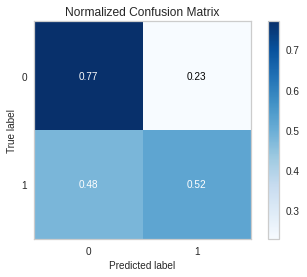

In [ ]:
# Copiando o dataset para o teste
dataset_test_5 = PCA_components.iloc[:,:3].copy()

# Adicionando a variável dos agrupamentos
dataset_test_5['Agrupamentos'] = y_kmeans

# Adicionando as variáveis alvo
dataset_test_5['Home Win'] = df_match_prp['Home Win']

# Separando os dados da variável alvo
X_test_5 = dataset_test_5.drop(columns=['Home Win'])
y_test_5 = dataset_test_5['Home Win']

# Dividindo entre treino e teste
X_train_test_5, X_test_test_5, y_train_test_5, y_test_test_5 = train_test_split(X_test_5, y_test_5, test_size=0.20)

# Instanciando novamente o modelo para os dados de teste
gxgb_test_5 = XGBClassifier(learning_rate= 0.1, max_depth= 4, min_child_weight= 7, n_estimators= 50)

# Treinando o modelo
gxgb_test_5.fit(X_train_test_5, y_train_test_5)

# Fazendo a previsão com os dados de teste
y_pred_final_test_5 = gxgb_test_5.predict(X_test_test_5)

# Relatório de Classificação
print(classification_report(y_test_test_5, y_pred_final_test_5))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test_test_5, y_pred_final_test_5)))

# plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test_test_5, y_pred_final_test_5, normalize=True);

Utilizando os parâmetros que conseguimos com a otimização, tivemos um leve aumento no desempenho do modelo na previsão da classe 1, também tivemos uma leve melhora no valor da área sob a curva ROC.

Resultados com os dados de teste com o modelo base para a classe 1:
* Precisão subiu de 65% para 66%;
* Recall subiu de 50% para 52%;
* Balanceamento entre Precisão e Recall (F1-Score) subiu de 57% para 58%.

## Resultados dos desempenhos dos modelos

Vamos ver os resultados dos treinos do dataset mais simples para o mais trabalhado:

1. Dataset `match` cru:

In [ ]:
df_val_raw

,Acurácia Padronizado,Acurácia Normalizado
LogisticRegression,0.993810,0.984286
DecisionTreeClassifier,1.000000,1.000000
RandomForestClassifier,0.928571,0.933333
SVC,0.925714,0.921905
GaussianNB,0.677619,0.677619
XGBClassifier,1.000000,1.000000


2. Dataset Limpo (Clean):

In [ ]:
df_val_clean

,Acurácia Padronizado,Acurácia Normalizado
LogisticRegression,1.000000,0.999759
DecisionTreeClassifier,1.000000,1.000000
RandomForestClassifier,0.989077,0.989847
SVC,0.999519,0.999808
GaussianNB,0.709042,0.709042
XGBClassifier,1.000000,1.000000


3. Dataset Preparado (Passou pelas etapas de Feature Engineering):

In [ ]:
df_val_prep

,Acurácia Padronizado,Acurácia Normalizado
LogisticRegression,1.000000,1.000000
DecisionTreeClassifier,1.000000,1.000000
RandomForestClassifier,1.000000,1.000000
SVC,1.000000,1.000000
GaussianNB,0.985373,0.985276
XGBClassifier,1.000000,1.000000


4. Dataset Reduzido, porém sem passar pela técnica PCA:

In [ ]:
df_val_red

,Acurácia Padronizado,Acurácia Normalizado
LogisticRegression,1.0,1.0
DecisionTreeClassifier,1.0,1.0
RandomForestClassifier,1.0,1.0
SVC,1.0,1.0
GaussianNB,1.0,1.0
XGBClassifier,1.0,1.0


5. Dataset Reduzido pelo PCA:

In [ ]:
df_val_pd_pca

,Acurácia Padronizado
LogisticRegression,0.654092
DecisionTreeClassifier,0.574797
RandomForestClassifier,0.631960
SVC,0.652264
GaussianNB,0.648944
XGBClassifier,0.661503


Com exceção do dataset que passou pela redução de dimensionalidade do PCA, todos os outros datasets conseguiram ser bem representados, o que foi confirmado com as validações em seus dados de teste.

Embora os datasets menos trabalhados tenham conseguido bons resultados, é visível a melhora a cada processo que realizamos nos dados, onde chegamos a ter todos os modelos com 100% de acurácia tanto no ambiente de treino como no de teste para o dataset que precede a técnica PCA.

A razão de termos modelos bem abaixo dos outros para o dataset que passou pela técnica PCA se deve à própria redução, onde reduzimos dezenas de características para apenas 4, sendo 3 do PCA e 1 do agrupamento realizado pelo K-Means. Essa perda de informação pode ser a causa dos resultados baixos.

Vale ressaltar que para os resultados obtidos com esse dataset, mesmo com 4 características, o modelo conseguiu se sair bem, tendo sua área sob a curva ROC (AUC) de 0.63, o que torna esse modelo "aceitável".

## Resolvendo a questão das múltiplas variáveis alvos

Nos testes de desempenhos dos modelos realizados na etapa anterior, utilizamos apenas a varíavel alvo `Home Win`.

Os modelos de Machine Learning, em sua maioria, não foram desenvolvidos para tarefas que envolvam mais de uma variável alvo, porém existem bibliotecas que tornam essa tarefa possível, como é o caso do **Scikit-learn**.

Esse problema de classificação não ocorre somente quando precisamos lidar com mais de uma variável alvo, elas ocorrem também quando a variável alvo não é binária e também quando são váriáveis alvos dependentes.

Para cada um desses casos, temos um nome específico que nos ajuda a identificar de forma mais rápido o problema de classificação das variáveis alvos. Na própria documentação da biblioteca, temos um diagrama com os nomes de cada abordagem e com as soluções que podem ser aplicadas em cada uma delas:

<center><img alt='Multiclass Scikit'  src='https://scikit-learn.org/stable/_images/multi_org_chart.png'></center>

Mas como podemos identificar nosso caso dentro desse diagrama? A resposta é simples, na mesma documentação da biblioteca, temos uma tabela que nos ajuda a identificar a situação da nossa variável alvo.



In [ ]:
# Tabela obtida através da documentação Scikit-learn
df_scikit = pd.DataFrame([['1', '> 2'], 
                        ['> 1', '2 (0 or 1)'],
                        ['> 1', '> 2'],
                        ['> 1', 'Continuous']],
                        index=['Multiclass Classification','Multilabel Classification',
                               'Multiclass-Multioutput-Classification','Multioutput-Regression'], 
                        columns=['Number of Targets','Target Cardinality'])
# Chamando o DataFrame com os resultados
df_scikit

<IPython.core.display.Javascript object>

,Number of Targets,Target Cardinality
Multiclass Classification,1,> 2
Multilabel Classification,> 1,2 (0 or 1)
Multiclass-Multioutput-Classification,> 1,> 2
Multioutput-Regression,> 1,Continuous


As colunas significam:
* `Number of Targets`: número de variáveis alvos que queremos trabalhar;

* `Target Cardinality`: número de valores únicos dentro da variável alvo, sendo que mais de dois valores únicos significa que a variável não é binária.

Antes de apontarmos qual abordagem iremos escolher para o nosso conjunto de dados, vamos falar um pouco sobre cada uma das soluções dessas abordagens:

* Multi-Class Classification: quando temos uma única variável alvo, porém ela possui mais de duas classes, ou seja, não é binária.

 * One-vs-Rest Classifier: também conhecido como *One-vs-All*, é um método heurístico que envolve o treinamento separado para cada classe da variável alvo, que então retorna a previsão em cima do modelo que melhor se adaptou.
Nessa abordagem, se temos três classes na variável alvo, teremos também três modelos treinados;

 * One-vs-One Classifier: utiliza a mesma abordagem que o *One-vs-Rest Classifier*, com a diferença de que para essa, é gerado um dataset de cada classe da variável alvo contra todas as outras classes, assim aumentando a quantidade de treinamentos;

 * Output Code Classifier: essa abordagem converte cada classe da variável alvo em códigos binários, que então tem cada um de seus bits treinado por um classificador.

* Multi-Label Classification: quando temos mais de uma variável alvo binária.

 * Multi-Output-Classifier: essa abordagem treina um modelo de classificação para cada variável alvo que temos;

 * Chain Classifier: já essa abordagem é utilizada quando as variáveis alvos que temos são dependentes umas das outras, que nesse caso é usado uma corrente (*Chain* em inglês) de estimadores, onde se utiliza a previsão obtida pelo último estimador no próximo.

* Multi-Output Regression: quando também temos mais de uma variável alvo, porém com a exceção de ser uma solução apenas para as tarefas de regressão.

 * Multi-Output-Regressor: nessa abordagem é treinado um modelo de regressão para cada variável alvo;

 * Regressor Chain: já essa abordagem é para quando as variáveis alvos são dependentes umas das outras, onde é utilizado o resultado da previsão do último estimador para o próximo.


 **OBSERVAÇÕES DO AUTOR:** *Recomendo bastante que acessem os links referentes a esse assunto disponibilizados na seção de Referências, para que possam ter um melhor entendimento através de exemplos com cada uma das abordagens.*


Agora que descobrimos como identificar qual problema nos representa e conhecermos um pouco de cada uma de suas abordagens, vamos ver na prática um desses métodos para nossos dados.

Em nossos dados temos mais de uma variável alvo (`Home Win`, `Draw` e `Away Win`), onde ambas são binárias, só possuem valores 1 ou 0 para cada uma delas, e que nosso objetivo é realizar uma classificação e não uma regressão. Portanto nesse caso podemos concluir que nosso problema se encaixa na *Multi-Label Classification*, e como são variáveis não dependentes umas das outras, temos a solução na abordagem *Multi-Output-Classifier*.

Para esse exemplo prático, usaremos o dataset que passou pela técnica PCA e pegaremos o estimador XGBoost para classificação:

In [ ]:
# Copiando o dataset clean para o teste
dataset_multi = PCA_components.iloc[:,:3].copy()

# Adicionando a variável dos agrupamentos
dataset_multi['Agrupamentos'] = y_kmeans

# Adicionando as variáveis alvos
dataset_multi['Home Win'] = df_match_prp['Home Win']
dataset_multi['Draw'] = df_match_prp['Draw']
dataset_multi['Away Win'] = df_match_prp['Away Win']

# Separando os dados da variável alvo
X_multi = dataset_multi.drop(columns=['Home Win', 'Draw', 'Away Win'])
y_multi = dataset_multi[['Home Win', 'Draw', 'Away Win']]

# Dividindo entre treino e teste
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.20)

# Escolhendo o XGBoost para a classificação
gxgb_multi = XGBClassifier()

# Instanciando o modelo para lidar com as múltiplas variáveis alvos
multi_target_gxgb = MultiOutputClassifier(gxgb_multi, n_jobs=-1)

# Treinando o modelo instanciado
multi_target_gxgb.fit(X_train_multi, y_train_multi)

# Fazendo a previsão com os dados de teste
y_pred_multi = multi_target_gxgb.predict(X_test_multi)

# Relatório de Classificação
print(classification_report(y_test_multi, y_pred_multi))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test_multi, y_pred_multi)))

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.66      0.50      0.57      2332
           1       0.00      0.00      0.00      1359
           2       0.56      0.12      0.20      1505

   micro avg       0.64      0.26      0.37      5196
   macro avg       0.41      0.21      0.26      5196
weighted avg       0.46      0.26      0.31      5196
 samples avg       0.26      0.26      0.26      5196

AUC: 0.5626



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acima podemos ver que o modelo foi capaz de lidar com três variáveis alvos, mas vale lembrar que usar as três juntas dessa forma não é interessante, o que podemos ver que o modelo não conseguiu identificar corretamente a variável `Draw`, onde temos o Recall igual a 0 e F1-Score também igual a 0.

Como foi dito no início dos testes com os modelos, utilizar apenas duas variáveis de forma que sejam dependentes, como uma das variáveis referentes à vitória e outro ao empate, seja melhor.

Embora exista esse caminho como uma solução, podemos ir mais além e ter um desempenho ainda melhor utilizando a variável `Match Result` que é a origem das nossas variáveis alvos, ao invés de utilizarmos os resultados de forma separada, assim poderíamos dentro do problema *Multi-Class Classification*, aplicarmos alguma de suas abordagens e então ter um modelo que irá prever se o resultado foi: Vitória do time de Casa, Empate ou Vitória do time de fora.

**OBSERVAÇÕES DO AUTOR:** *A abordagem acima é a melhor no quesito previsão de resultados de uma partida, assim não sendo somente uma previsão da vitória do time que joga em casa. Caso tiver interesse de realizar um projeto com a mesma base de dados e com as mesmas variáveis alvos, sugiro fortemente utilize a variável `Match Results` original, assim podendo realizar o teste com a abordagem descrita acima.*

# Conclusão

Nesse projeto aprendemos a como nos livrar da **Maldição da Dimensionalidade** utilizando vários processos além da redução de dimensionalidade, como por exemplo a etapa de Feature Selection (Seleção de Características) para a alimentação dos modelos testados. Além, da redução da dimensionalidade para evitarmos cair na "maldição", também existe a abordagem de redução das observações dos dados, mas que não foi aplicado nesse projeto.

Aprendemos também a aplicar o modelo de agrupamento (clustering em inglês) para identificar grupos dentro dos dados, como também como escolher o número ideial de grupos e avaliar a qualidade do agrupamento realizado.

Embora os objetivos do projeto fossem relacionados à dimensionalidade dos dados e à implementação de um algoritmo de agrupamento, busquei acrescentar alguns desafios como a criação de variáveis alvos para os modelos de Machine Learning e os problemas com as múltiplas variáveis ou classes alvos para esses modelos classificarem.

# Referências

1. https://towardsdatascience.com/dimensionality-reduction-for-machine-learning-80a46c2ebb7e

2. https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

3. https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

4. https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

5. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

6. https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6

8. https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

9. https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

10. https://medium.com/analytics-vidhya/k-means-clustering-43d0136bf005

11. https://medium.com/more-python-less-problems/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

12. https://365datascience.com/tutorials/python-tutorials/pca-k-means/

13. https://towardsdatascience.com/how-to-evaluate-unsupervised-learning-models-3aa85bd98aa2

14. https://medium.com/@cmukesh8688/silhouette-analysis-in-k-means-clustering-cefa9a7ad111

15. https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

16. https://machinelearningmastery.com/what-is-imbalanced-classification/

17. https://towardsdatascience.com/essential-guide-to-multi-class-and-multi-output-algorithms-in-python-3041fea55214

18. https://scikit-learn.org/stable/modules/multiclass.html

19. https://towardsdatascience.com/multi-class-classification-one-vs-all-one-vs-one-94daed32a87b

20. https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/

21. https://www.section.io/engineering-education/multi-label-classification-with-scikit-multilearn/